# Interferometer simulations

Using the radiometer equation to calculate the thermal noise:

$\sigma_T = \frac{\lambda_{21}(z)^2 T_{\text{sys}}(z)}{A_{\text{eff}}\sqrt{\Delta\nu t_{\text{int}} \times n(u) \times 2 \pi u du}} \times \frac{1}{\sqrt{N_{\text{beam}}N_{\text{pol}}}}$

where $\lambda_{21}$ is the wavelength of the HI line at the redshift of observation, $T_{sys}$ is the system temperature of the survey, $A_{eff}$ is the effective area of the telescope array, $\Delta\nu$ is the channel width of the survey, $t_{int}$ is the integration time of each pointing, $n(u)$ is the baseline number density as a function of the baseline separation $u$, $N_{beam}$ is the number of beams of each station, and $N_{pol}$ is the number of polarisation of each beam.

The system temperature $T_{\text{sys}}$ is calculated using

$T_{\text{sys}} = (T_{\text{rcv}}(z) + T_{\text{spl}} + T_{\text{sky}}(z)) \times \frac{x}{e^x - 1}$

where we have defined $x = \frac{h\nu_{21}}{k_B(T_{\text{rcv}}(z) + T_{\text{spl}} + T_{\text{sky}}(z))}$, $T_{\text{sky}} = T_{\text{CMB}} + T_{\text{gal}}(z) + T_{\text{atm}}$, $T_{\text{gal}}=25 \frac{408} {\nu_{21}}^{2.75}$ is the signal contribution from within our galaxy, $T_{\text{CMB}} = 2.73 K$ is the CMB temperature contribution, $T_{\text{rcv}} = 0.1 T_{\text{gal}}(z) + 40$ is the receiver temperature, and $T_{\text{spl}}$ is the spillover temperature.



Here, we take $N_{\text{beam}} = 1$, $N_{\text{pol}}=2$, $A_{\text{eff, station}}=419000\times \frac{N_{\text{stations}}}{512} m^2$, $\Delta\nu_{21}=781250 Hz$ (all values sourced from SKA specifications, with an approximation used for the effective collecting area of stages below A4), $t_{\text{int}}=10s$ and $t_{\text{surv}}=100h$ (following the values used in Merten, Bobin, and Carucci 2024), and $n(u)$ is calculated using the antenna distribution, which is generated using the official SKA config package. We neglect $T_{\text{spl}}$ (following the 2018 red book).

In [1]:
import postEoR.observations as obs
import numpy as np
import matplotlib.pyplot as plt

AA4 = obs.SKA1LOW_AA4(0)
AAstar = obs.SKA1LOW_AAstar(0)

some_survey = obs.Interferometer(AA4, 6, 3, 100, 20, 0, freq_bin=10e6)

comp_survey = obs.Interferometer(AAstar, 6, 3, 100, 20, 0, freq_bin=10e6)


initialised!
initialised!


Below, we plot the baseline density distribution. This was calculated by calculating the number of baselines that fall in each baseline length bin, dividing by $2\pi u du$, and normalising such that the integral over the half plane of n(u) is equal to $\frac{N_a(N_a-1)}{2}$, where $N_a$ is the total number of antennas.

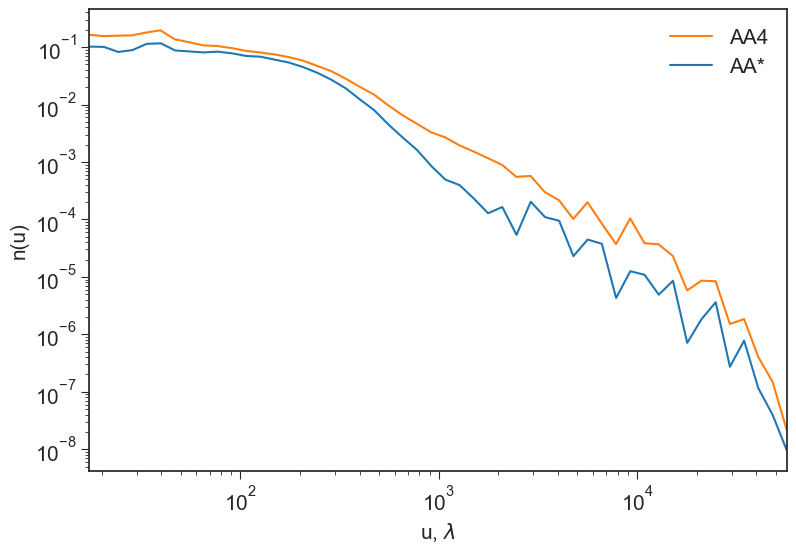

In [2]:
plt.style.use('seaborn-v0_8-ticks')
plt.plot(some_survey.u, some_survey.nvis, label="AA4", color="tab:orange")
plt.plot(comp_survey.u, comp_survey.nvis, label="AA*", color="tab:blue")
plt.rcParams['figure.figsize'] = [9, 6]
plt.yscale("log")
plt.xscale("log")
plt.ylabel("n(u)") 
plt.xlabel("u, $\lambda$")
#plt.title("Baseline density distribution, SKA1-Low deep survey")
plt.xlim(np.min(some_survey.u), np.max(some_survey.u))
plt.legend()
plt.show()

We calculate the noise power spectrum as follows.

First, we must calculate the perpendicular wavenumbers. To do this, we use the formula

$k_{\perp}(z) = \frac{2\pi u}{r}$

where $r$ is the cosmological distance to redshift $z$ in Mpc/h, and $u$ is the baseline separation in wavelengths.

To calculate the power, we use the following formula:

$P_{\text{noise}}(k) = \frac{\sigma_{\text{T}}^2 V_{\text{pix}} 2\pi u du}{\theta_{\text{FoV}}}$

where $V_{\text{pix}}$ is the comoving volume of one element per pointing (volume per FoV and frequency channel), $du$ is the width of the baseline bins, and $\theta_{\text{FoV}}$ is the field of view of the telescope in steradians:

$V_{\text{pix}} = r^2 \frac{10^3c(1+z)^2}{H(z) \nu_{21}} \theta_{\text{FoV}}(z) \Delta\nu$ 

$\theta_{\text{FoV}} = \frac{1.220(1+z)\lambda_{21}}{0.8 D_{\text{station}}}$

where $H(z)$ is the Hubble parameter in km/s/Mpc, $\nu_{21}$ is the frequency of the HI signal at current time in Hz, $\Delta\nu$ is the frequency channel width in Hz, $\lambda_{21}$ is the wavelength of the HI signal at current time in m, and $D_{\text{station}}$ is the diameter of each station in m.

10000000.0
10000000.0


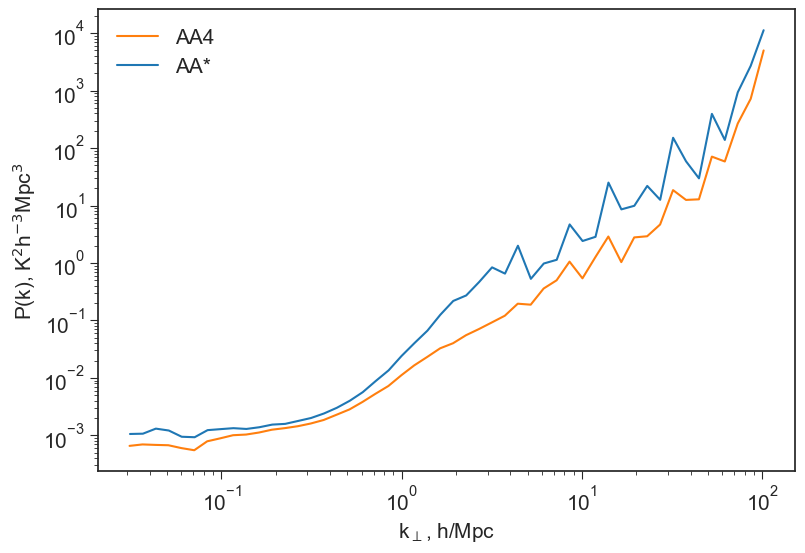

In [3]:
#some_survey.tint = 1000
ps, k = some_survey.noise_power_perp()
ps_comp, k_comp = comp_survey.noise_power_perp()

plt.plot(k, ps, label="AA4", color="tab:orange")
plt.plot(k_comp, ps_comp, label="AA*", color='tab:blue')
plt.yscale("log")
plt.xscale("log")
plt.ylabel("P(k), K$^2$h$^{-3}$Mpc$^3$")
plt.xlabel("k$_{\perp}$, h/Mpc")
#plt.title("Thermal noise power spectrum, SKA1-Low deep survey")
plt.legend()
#plt.xlim(0.05, 0.3)
plt.show()

We can also plot the uv distribution, using the in-built functionality provided by SKA-ost-array-config.

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


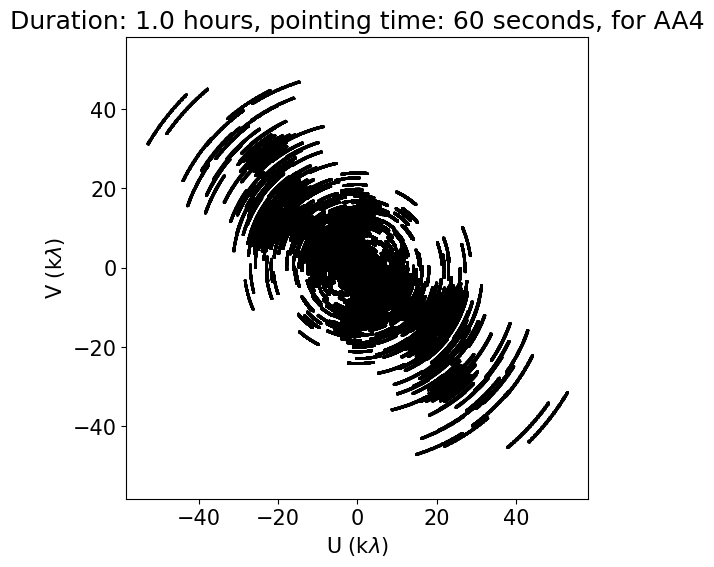

In [4]:
some_survey.plot_uv()

# EoR window

[4, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]
[4969.172440454041, 5191.7042663107995, 5386.161703995742, 5557.948886265328, 5711.128891908997, 5848.819747344694, 5973.457567082931, 6086.975990868847]
[1753. 1575. 1380. 1164.  924.  654.  349.    0.]
initialised!
13527673.826361924
initialised!
13527673.826361924


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


initialised!
15608854.415032953
initialised!
15608854.415032953


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


initialised!
18210330.150871813
initialised!
18210330.150871813


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


initialised!
21521299.269212127
initialised!
21521299.269212127


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


initialised!
25825559.123054534
initialised!
25825559.123054534


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


initialised!
31564572.261511087
initialised!
31564572.261511087


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


initialised!
39455715.32688892
initialised!
39455715.32688892


/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_48997/3795039798.py:121: RuntimeWarning: invalid value encountered in divide
  noisebins /= count**0.5


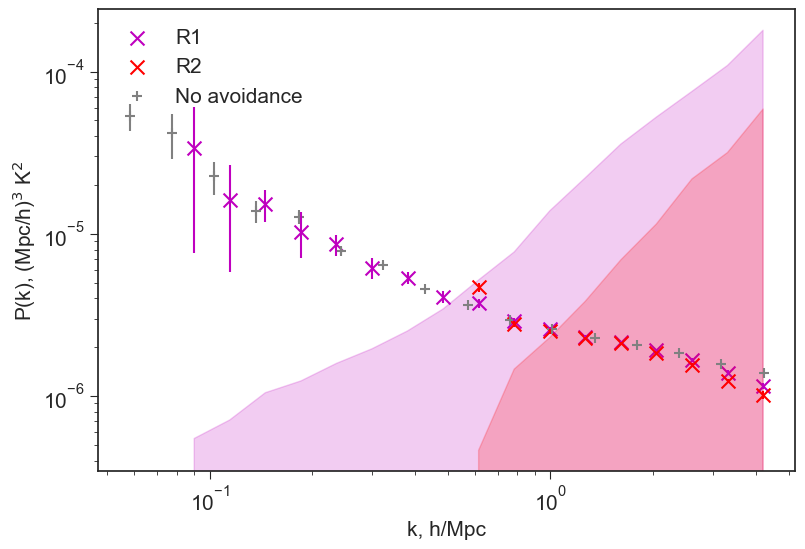

In [20]:
import hickle as hkl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from postEoR.tools import OMm, OMl, hlittle, get_distance, c, nu_21
from postEoR.observations import A_crit, lambda_21
from scipy.interpolate import make_interp_spline
import postEoR.observations as obs

def z_to_index(cone, bin_width):
    bin_edge=cone.z_end
    z_bins=list([])
    while bin_edge <= cone.z_start:
        z_bins.append(bin_edge)
        bin_edge += bin_width
    dist_bins = list([])
    print(z_bins)
    for i in range(len(z_bins)):
        dist_bins.append(get_distance(z_bins[i]))
    print(dist_bins)
    indices = np.round((np.asarray(dist_bins) - dist_bins[0]) / cone.cell_size, 0)

    return indices

redshift_bin = 0.5
asurv=100
tsurv=5000

cone = hkl.load("cone_4_8_inhomo_recom_new.hkl")

indices = np.flip(z_to_index(cone, redshift_bin))
print(indices)


for frame in range(len(indices)-1):
    plt.clf()
    plt.style.use('seaborn-v0_8-ticks')
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['figure.figsize'] = [9, 6]
    BT = cone.BT_field[:, :, int(indices[frame+1]):int(indices[frame])]
    z = cone.z_start - redshift_bin / 2 - redshift_bin*int(frame)

    power_3d = np.abs(np.fft.fftn(BT))**2 / (np.size(BT) * (cone.HII_dim / cone.box_len)**3)

    ks1 = np.abs(np.fft.fftfreq(np.shape(BT)[0], cone.cell_size) * 2 * np.pi)
    ks2 = np.abs(np.fft.fftfreq(np.shape(BT)[2], cone.cell_size) * 2 * np.pi)
    k_x, k_y, k_z = np.meshgrid(ks1, ks1, ks2, indexing="xy")
    k_perp = (k_x**2+k_y**2)**0.5
    k_3d = (k_x**2+k_y**2+k_z**2)**0.5

    perp_k_bins = np.geomspace(np.min(k_perp[np.nonzero(k_perp)]), np.max(k_perp), 21)
    para_k_bins = np.geomspace(np.min(ks2[np.nonzero(ks2)]), np.max(ks2), 21)

    power_2d = np.zeros([np.size(para_k_bins)-1, np.size(perp_k_bins)-1])

    for i in range(len(perp_k_bins) - 1):
        above_min = k_perp >= perp_k_bins[i]
        below_max = k_perp < perp_k_bins[i+1]
        check = (above_min & below_max).astype(int)
        unbinned = np.sum(power_3d * check, axis=(0,1)) / (np.sum(check, axis=(0,1)))
        binned, _, _ = stats.binned_statistic(ks2, unbinned, statistic="mean", bins=para_k_bins)
        power_2d[:, i] += binned

    nan_check = np.sum(power_2d, axis=1)
    power_2d = power_2d[~np.isnan(nan_check), :]
    nan_check = np.append(nan_check, 1)
    para_k_bins = para_k_bins[~np.isnan(nan_check)]

    new_k_1 = (perp_k_bins[1:]+perp_k_bins[:-1])/2
    new_k_2 = (para_k_bins[1:]+para_k_bins[:-1])/2

    k_gridxy, k_gridz = np.meshgrid(new_k_1, new_k_2, indexing="xy")
    k_grid = (k_gridxy**2+k_gridz**2)**0.5

    k_unavg = np.reshape(k_grid, np.size(k_grid))
    pwr_unavg = np.reshape(power_2d, np.size(power_2d))

    k_bins = np.geomspace(np.min(k_unavg[np.nonzero(k_unavg)]), np.max(k_unavg), 20)
    k_vals = (k_bins[1:] + k_bins[:-1])/2
    new_k = np.array([x for x in k_vals if x <= (2*np.pi / (2*cone.box_len / cone.HII_dim))])

    theta = (lambda_21 * (1+z) / A_crit**0.5)
    H_0 = hlittle * 100
    H = H_0 * 1000 * (OMm * (1+z)**3+OMl)**0.5

    R1 = k_gridz > (H * get_distance(z) * theta) / (c * (1+z)) * k_gridxy # horizon limit cut
    #R2 = k_gridz > 0.5 * k_gridxy
    #R3 = k_gridz > 0.3 * k_gridxy + 0.3
    R2 = k_gridz > 0.5 * k_gridxy + 0.5

    cuts = [R1, R2]#, R3, R4]
    colors = ["m", "r", "r", "m"]
    labels = ["R1", "R2", "R3", "R4"]

    for cut in range(len(cuts)):
        pwr = pwr_unavg[np.reshape(cuts[cut], np.size(cuts[cut]))]
        k = k_unavg[np.reshape(cuts[cut], np.size(cuts[cut]))]
        Abins1, _, _ = stats.binned_statistic(k, pwr, statistic = "mean", bins = k_bins)
        bin_count1, _, _ = stats.binned_statistic(k, pwr, statistic="count", bins=k_bins) # obtaining number of data points in each bin
        error1, _, _ = stats.binned_statistic(k, pwr, statistic = "std", bins = k_bins) # obtaining standard deviation in each bin
        error1 /= bin_count1**0.5
        Abins1 = Abins1[0:(np.size(new_k))]
        error1 = error1[0:(np.size(new_k))]
        k_plot = new_k[~np.isnan(Abins1)]
        error1 = error1[~np.isnan(Abins1)]
        Abins2 = Abins1[~np.isnan(Abins1)]
        k_plot = k_plot[error1>1e-11]
        Abins2 = Abins2[error1>1e-11]
        error2 = error1[error1>1e-11]
        plt.scatter(k_plot, Abins2, marker="x", s=100, color=colors[cut], label=labels[cut])
        plt.errorbar(k_plot, Abins2, error2, color=colors[cut], linestyle="none")
        AA4 = obs.SKA1LOW_AA4(0)
        freq_bin = nu_21 / (z-0.5*redshift_bin) - nu_21 / (z+0.5*redshift_bin)
        some_survey = obs.Interferometer(AA4, 7, 4, asurv, tsurv, 0, freq_bin)
        ps, k_perp = some_survey.noise_power_perp(z)
        noise = make_interp_spline(k_perp, ps, k=1)
        noise_grid, _ = np.meshgrid(noise(new_k_1), noise(new_k_2))
        noise = np.reshape(noise_grid[cuts[cut]], np.size(noise_grid[cuts[cut]]))
        noisebins, _, _ = stats.binned_statistic(k, noise, statistic="sum", bins=k_bins)
        count, _, _ = stats.binned_statistic(k, noise, statistic="count", bins=k_bins)
        noisebins /= count**0.5
        noisebins = noisebins[0:(np.size(new_k))]
        noisebins = noisebins[~np.isnan(Abins1)]
        noisebins = noisebins[error1>1e-11]

        plt.fill_between(k_plot, noisebins, color=colors[cut], alpha=0.2)

    no_remove_pwr = np.reshape(power_3d, np.size(power_3d))
    no_remove_k = np.reshape(k_3d, np.size(k_3d))
    no_remove_k_bins = np.geomspace(np.min(no_remove_k[np.nonzero(no_remove_k)]), np.max(no_remove_k), 21)
    no_remove_k_vals = (no_remove_k_bins[1:]+no_remove_k_bins[:-1]) / 2
    new_k_2 = np.array([x for x in no_remove_k_vals if x <= (2*np.pi / (2*cone.box_len / cone.HII_dim))])

    Abins2, _, _ = stats.binned_statistic(no_remove_k, no_remove_pwr, statistic = "mean", bins = no_remove_k_bins)
    bin_count2, _, _ = stats.binned_statistic(no_remove_k, no_remove_pwr, statistic="count", bins=no_remove_k_bins) # obtaining number of data points in each bin
    error2, _, _ = stats.binned_statistic(no_remove_k, no_remove_pwr, statistic = "std", bins = no_remove_k_bins) # obtaining standard deviation in each bin
    error2 /= bin_count2**0.5
    Abins2 = Abins2[0:(np.size(new_k_2))]
    error2 = error2[0:(np.size(new_k_2))]
    new_k_2 = new_k_2[~np.isnan(Abins2)]
    error2 = error2[~np.isnan(Abins2)]
    Abins2 = Abins2[~np.isnan(Abins2)]
    new_k_2 = new_k_2[error2>1e-11]
    Abins2 = Abins2[error2>1e-11]
    error2 = error2[error2>1e-11]
    plt.scatter(new_k_2, Abins2, marker="+", s=50, color="gray", label="No avoidance")
    plt.errorbar(new_k_2, Abins2, error2, color="gray", linestyle="none")

    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("P(k), (Mpc/h)$^3$ K$^2$")
    plt.xlabel("k, h/Mpc")
    plt.legend()
    plt.savefig("cone_analysis/fid_fg_noise_"+str(redshift_bin)+"_"+str(format(z, '.2f'))+".png")


# Overview plots

initialised!
initialised!
2559289.642825216
2559289.642825216
2559289.642825216
Using input bins
initialised!
initialised!
2629407.1672861874
2629407.1672861874
2629407.1672861874
Using input bins
initialised!
initialised!
2702446.2552663386
2702446.2552663386
2702446.2552663386
Using input bins
initialised!
initialised!
2778571.50189358
2778571.50189358
2778571.50189358
Using input bins
initialised!
initialised!
2857959.259090543
2857959.259090543
2857959.259090543
Using input bins
initialised!
initialised!
2940798.657904744
2940798.657904744
2940798.657904744
Using input bins
initialised!
initialised!
3027292.7360784113
3027292.7360784113
3027292.7360784113
Using input bins
initialised!
initialised!
3117659.6834240556
3117659.6834240556
3117659.6834240556
Using input bins
initialised!
initialised!
3212134.219285369
3212134.219285369
3212134.219285369
Using input bins
initialised!
initialised!
3310969.1183403134
3310969.1183403134
3310969.1183403134
Using input bins
initialised!
initi

/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_59757/4018633577.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3)


initialised!
initialised!
4782510.948713779
4782510.948713779
4782510.948713779
Using input bins
initialised!
initialised!
4962983.059986025
4962983.059986025
4962983.059986025
Using input bins
initialised!
initialised!
5153867.023831636
5153867.023831636
5153867.023831636
Using input bins
initialised!
initialised!
5355979.45613873
5355979.45613873
5355979.45613873
Using input bins
initialised!
initialised!
5570218.6343842745
5570218.6343842745
5570218.6343842745
Using input bins
initialised!
initialised!
5797574.497012198
5797574.497012198
5797574.497012198
Using input bins
initialised!
initialised!
6039140.10105443
6039140.10105443
6039140.10105443
Using input bins
initialised!
initialised!
6296124.786205649
6296124.786205649
6296124.786205649
Using input bins
initialised!
initialised!
6569869.342127621
6569869.342127621
6569869.342127621
Using input bins
initialised!
initialised!
6861863.53511107
6861863.53511107
6861863.53511107
Using input bins
initialised!
initialised!
7173766.42

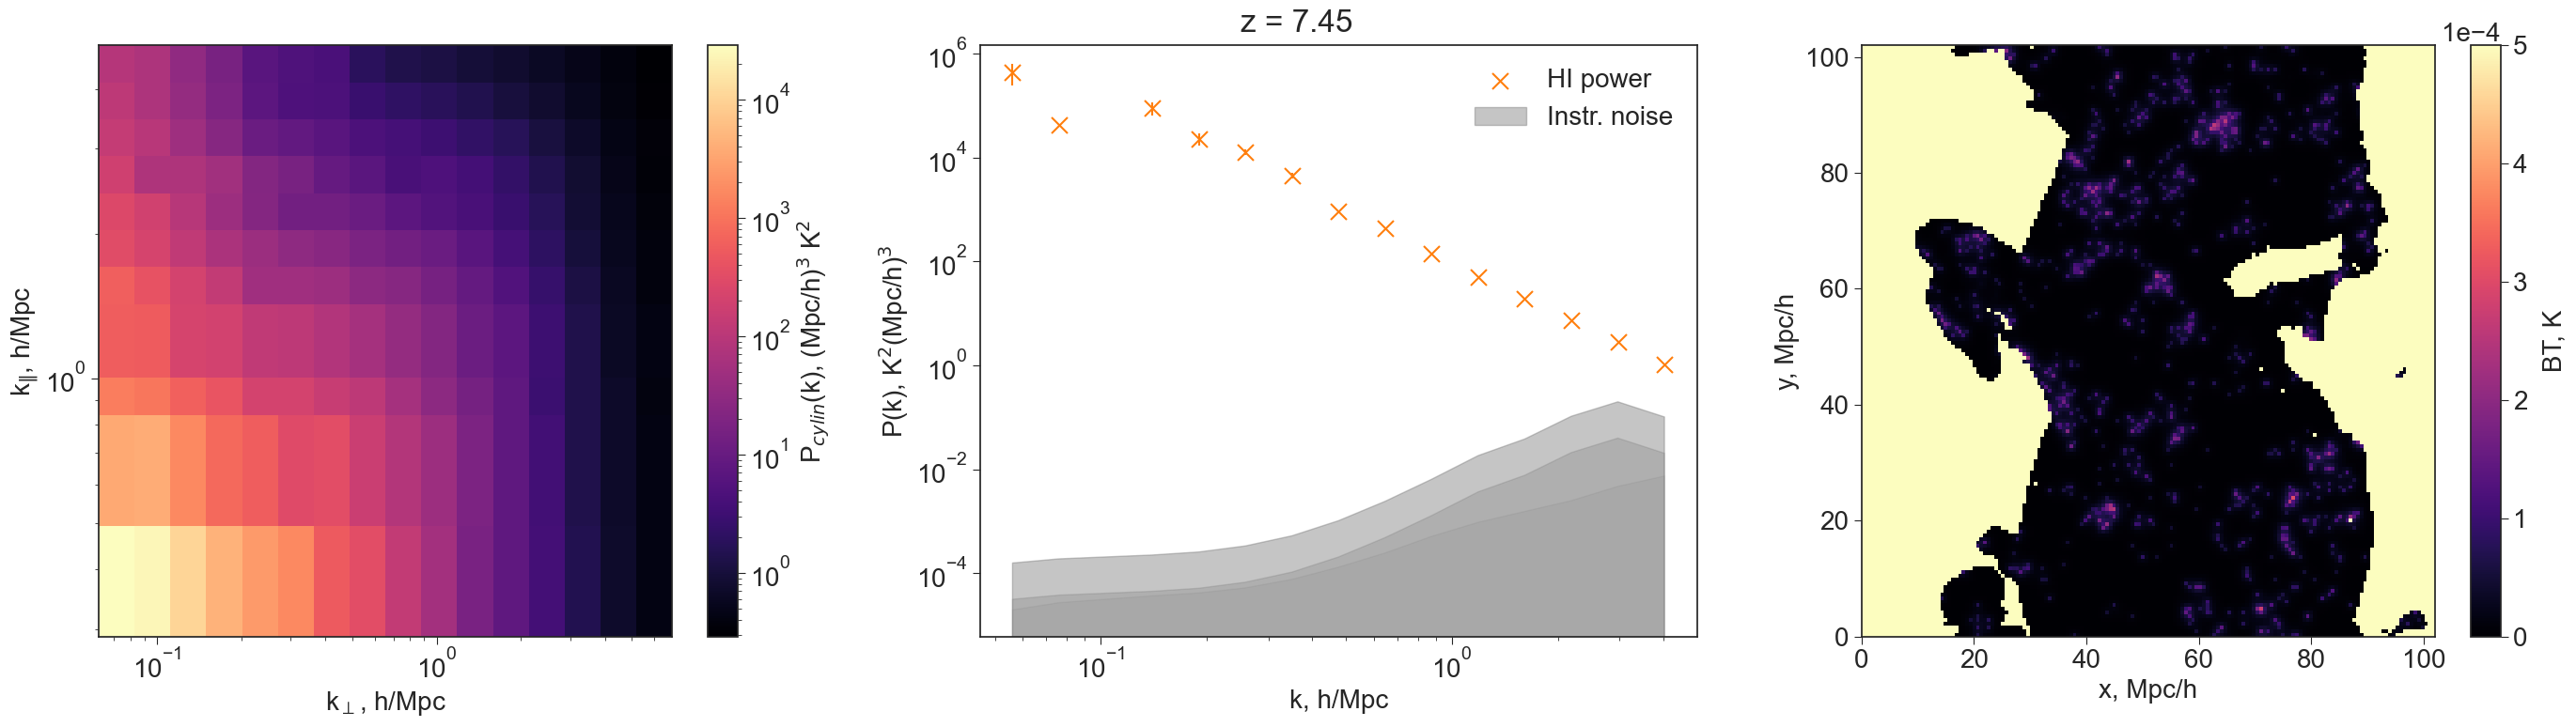

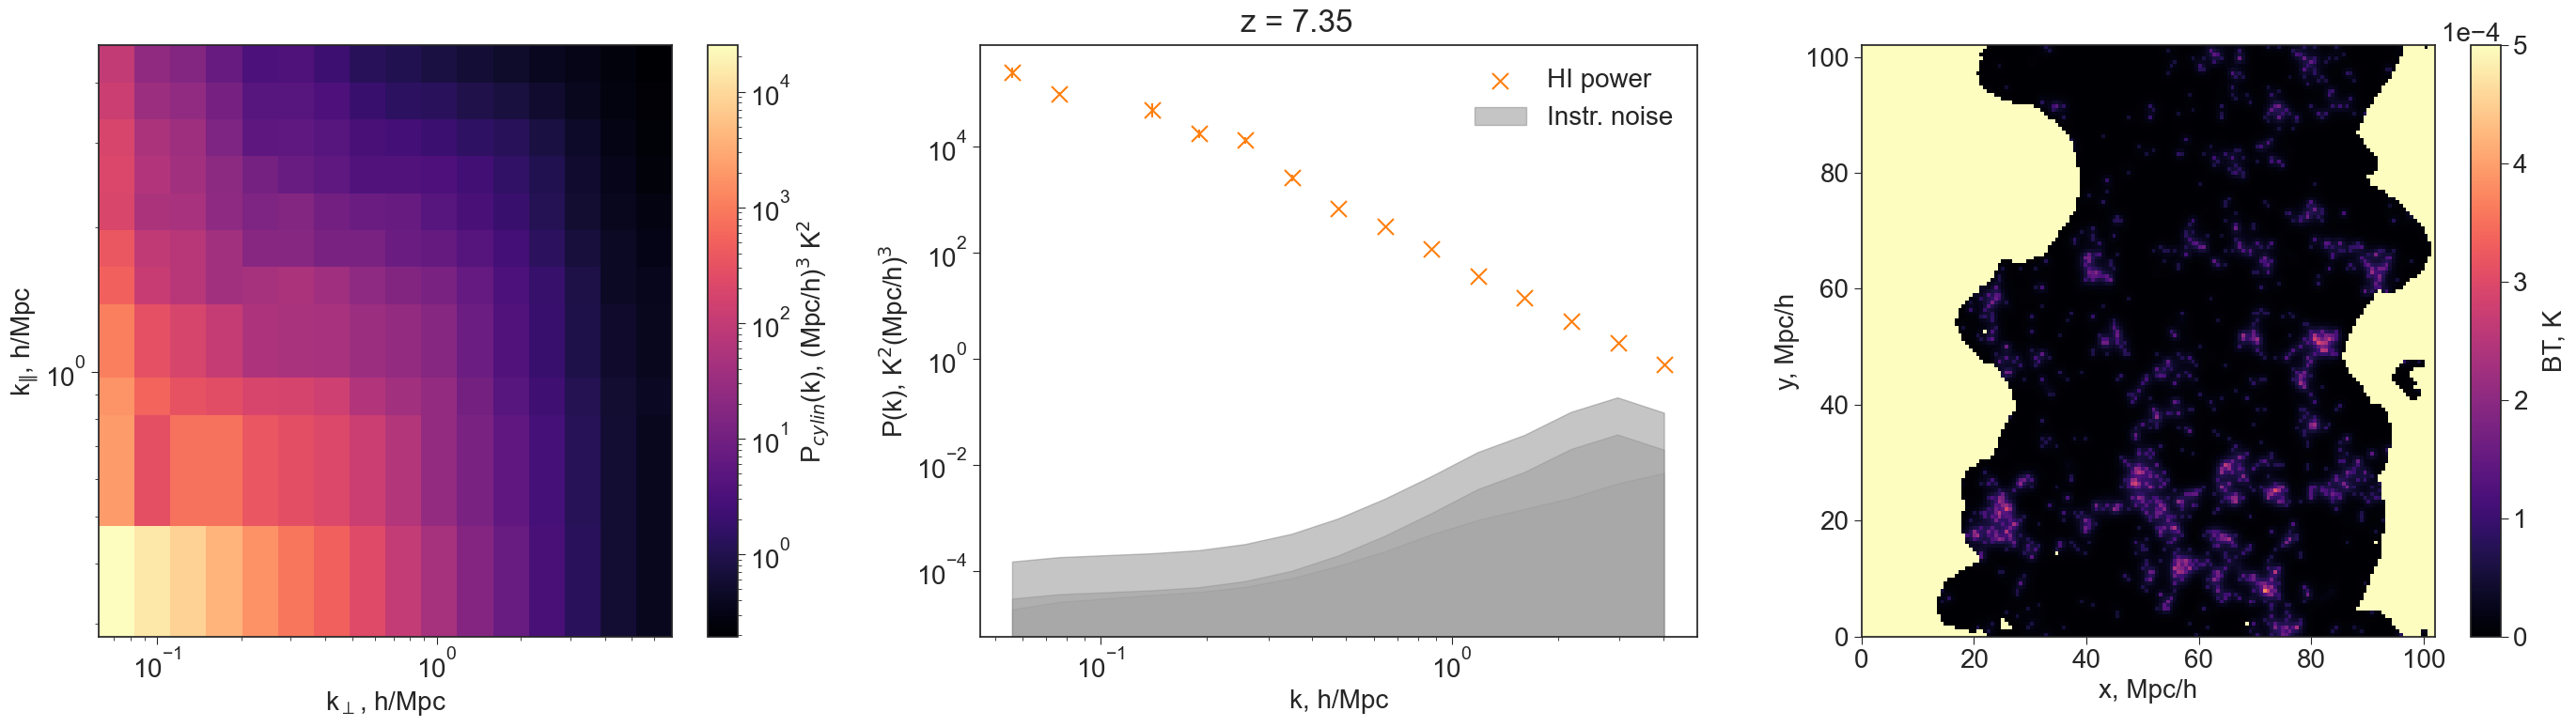

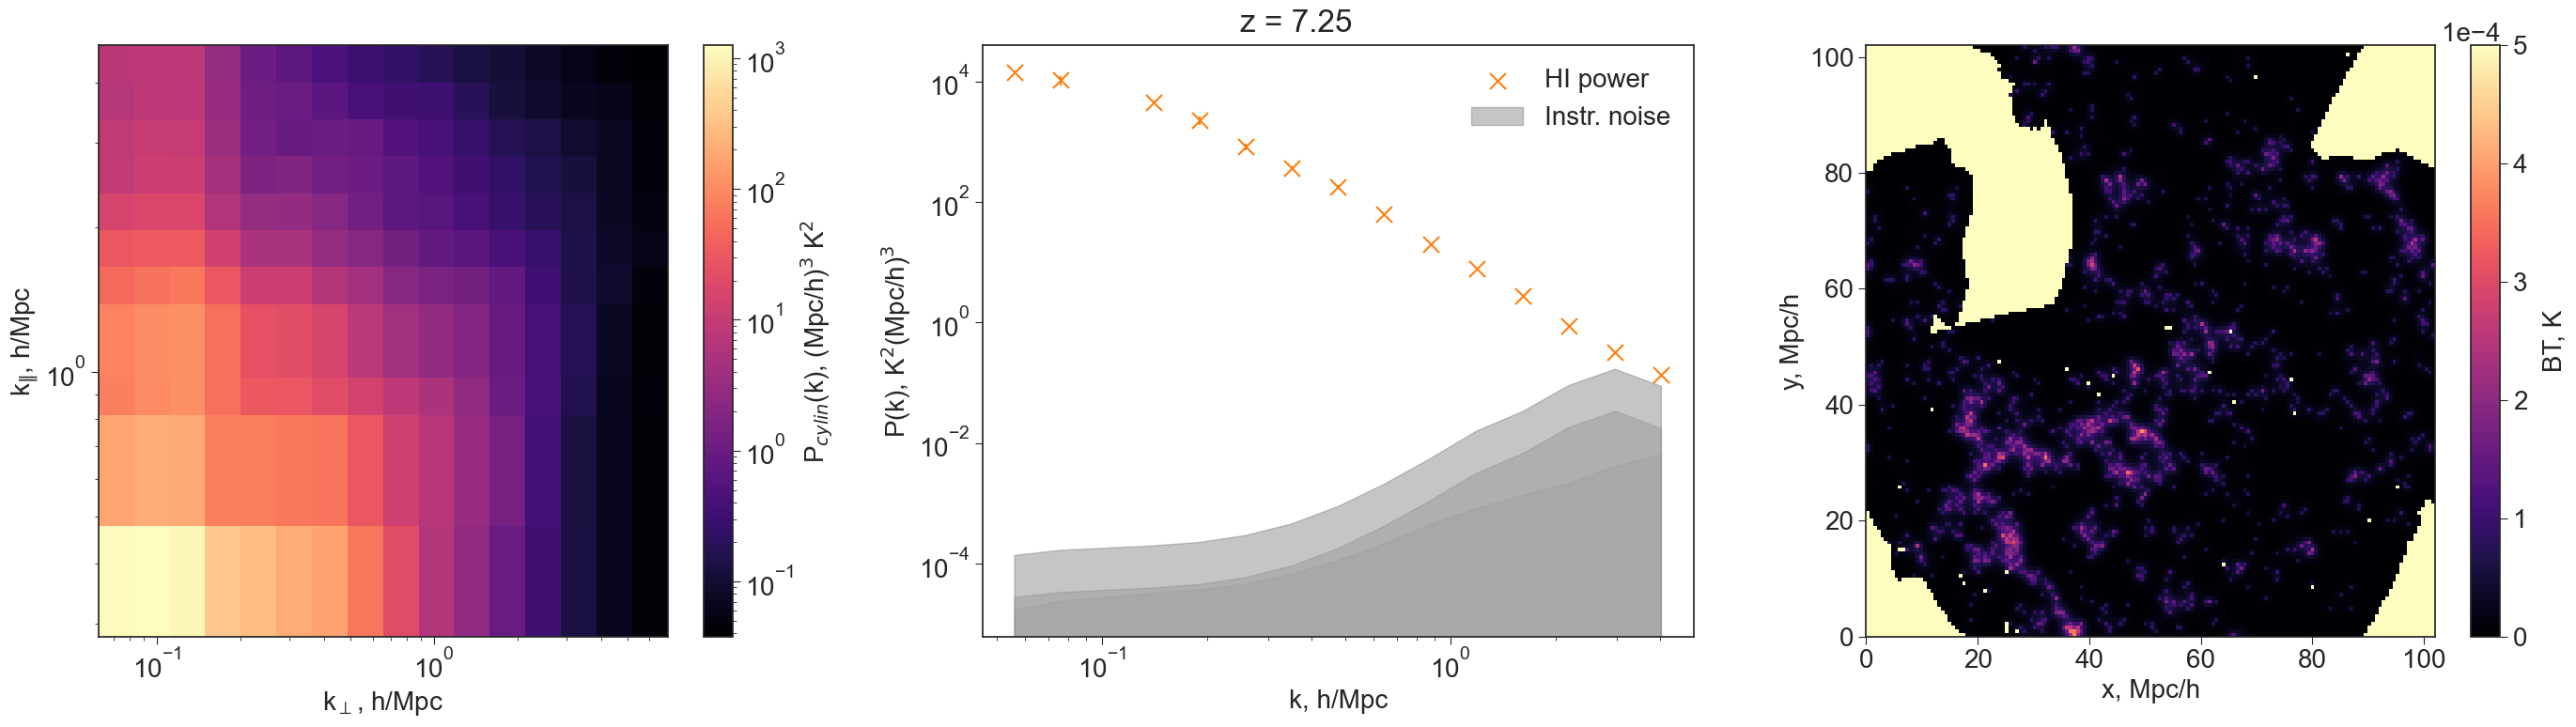

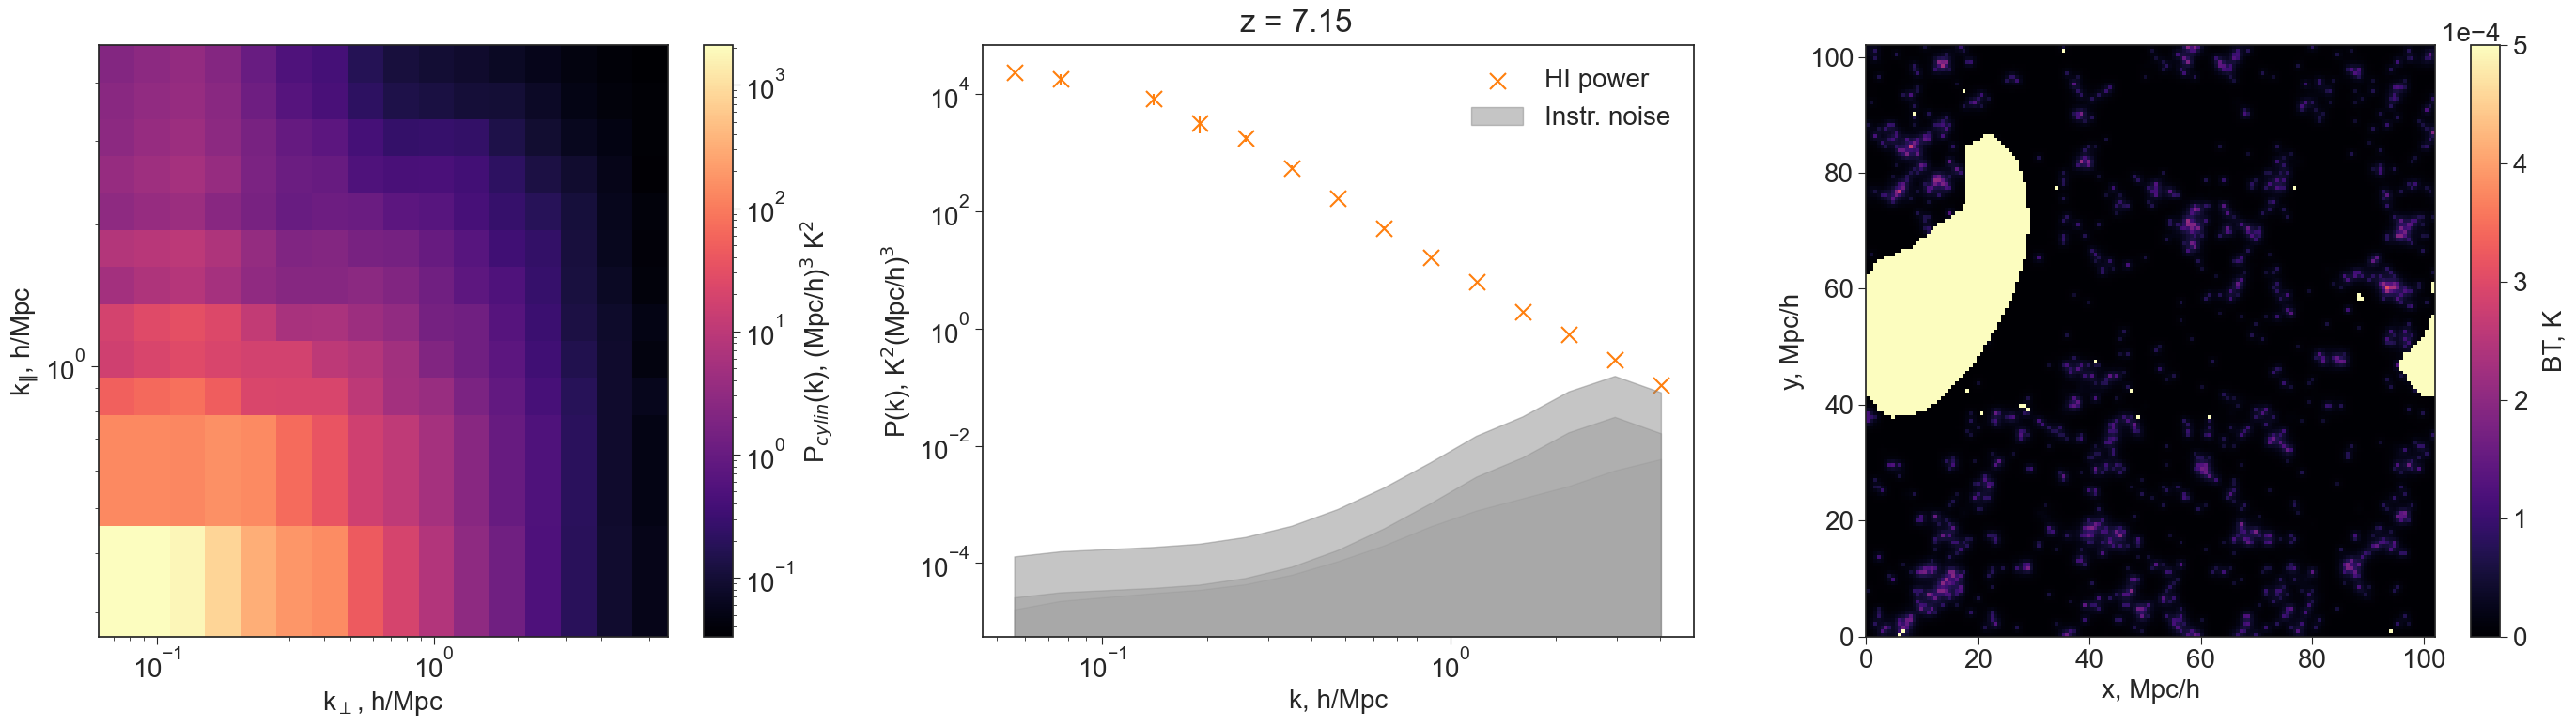

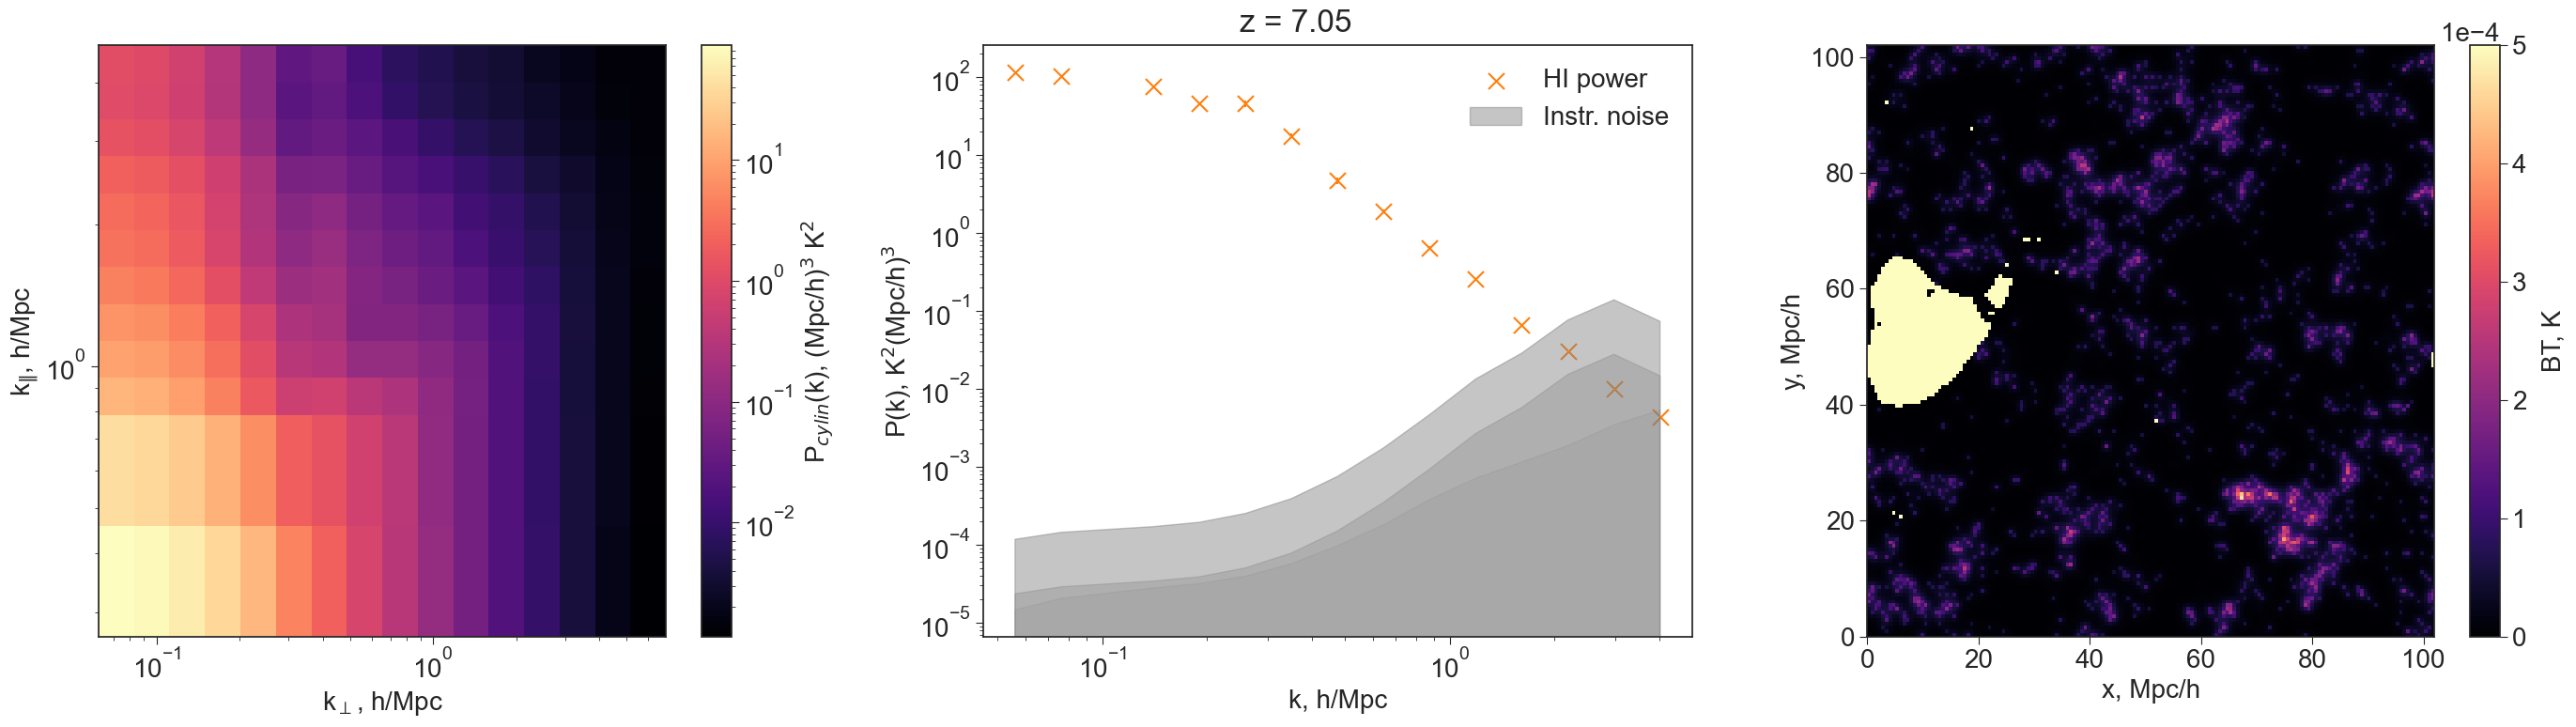

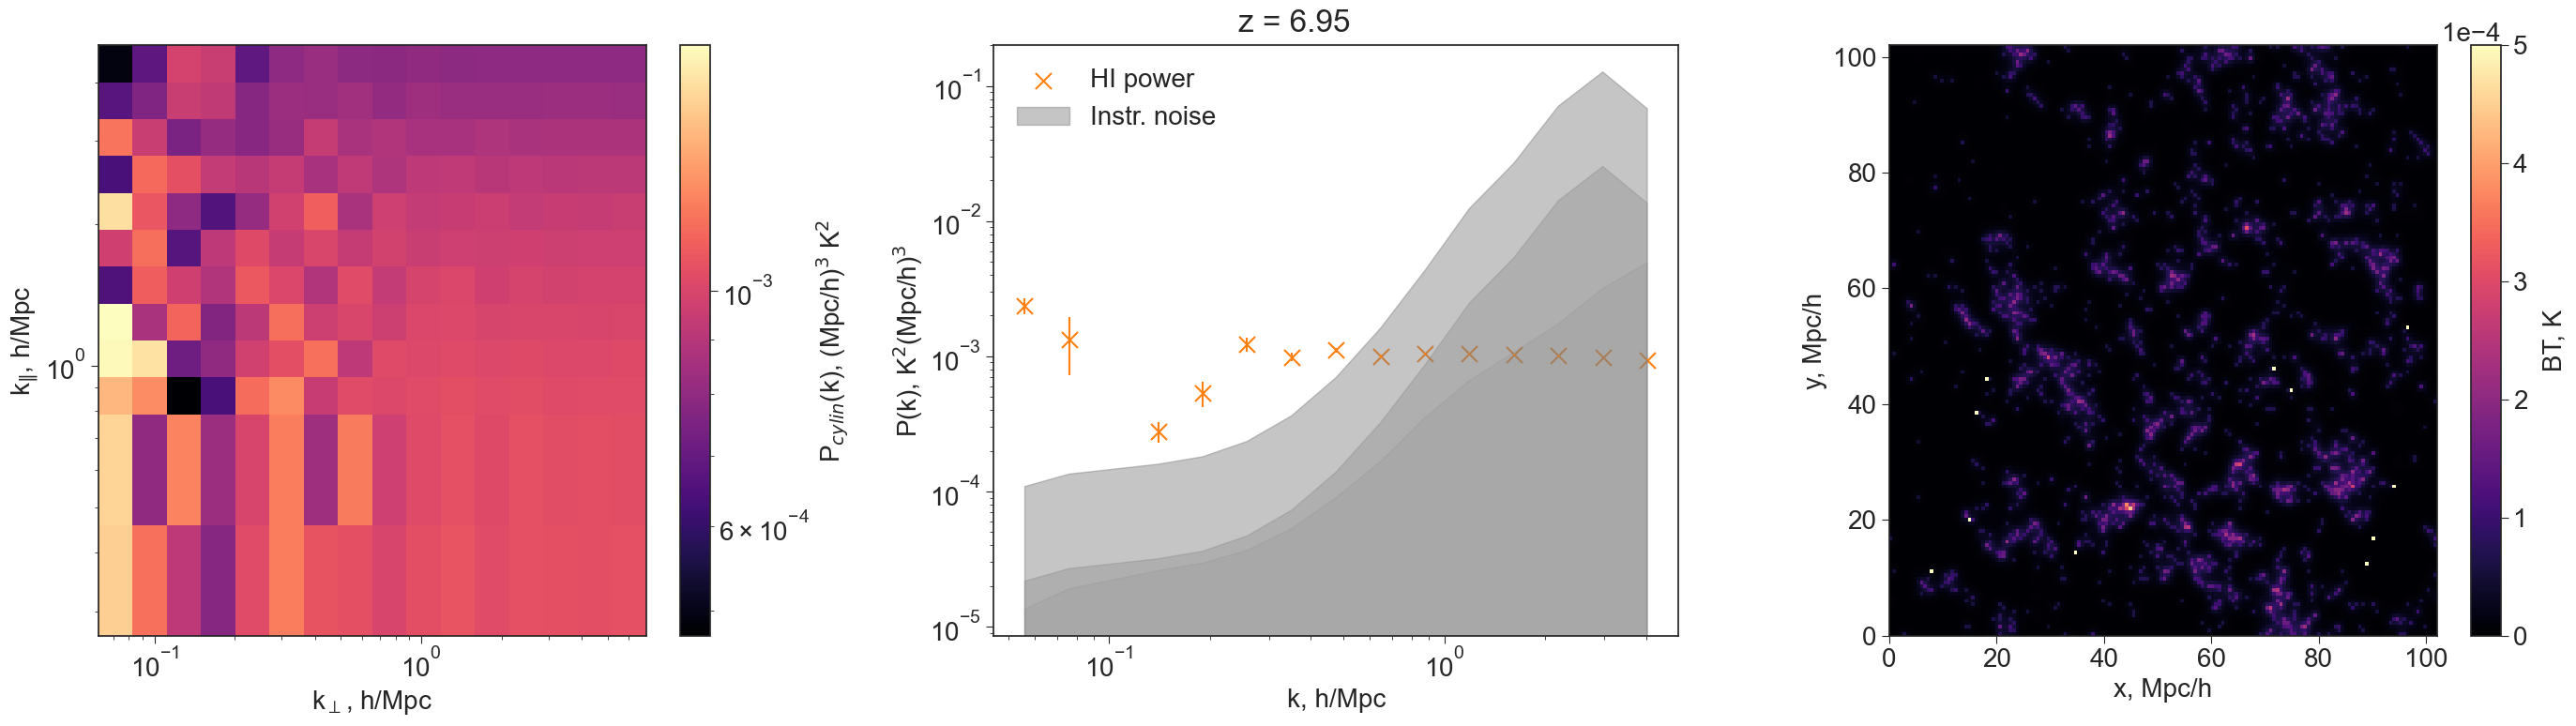

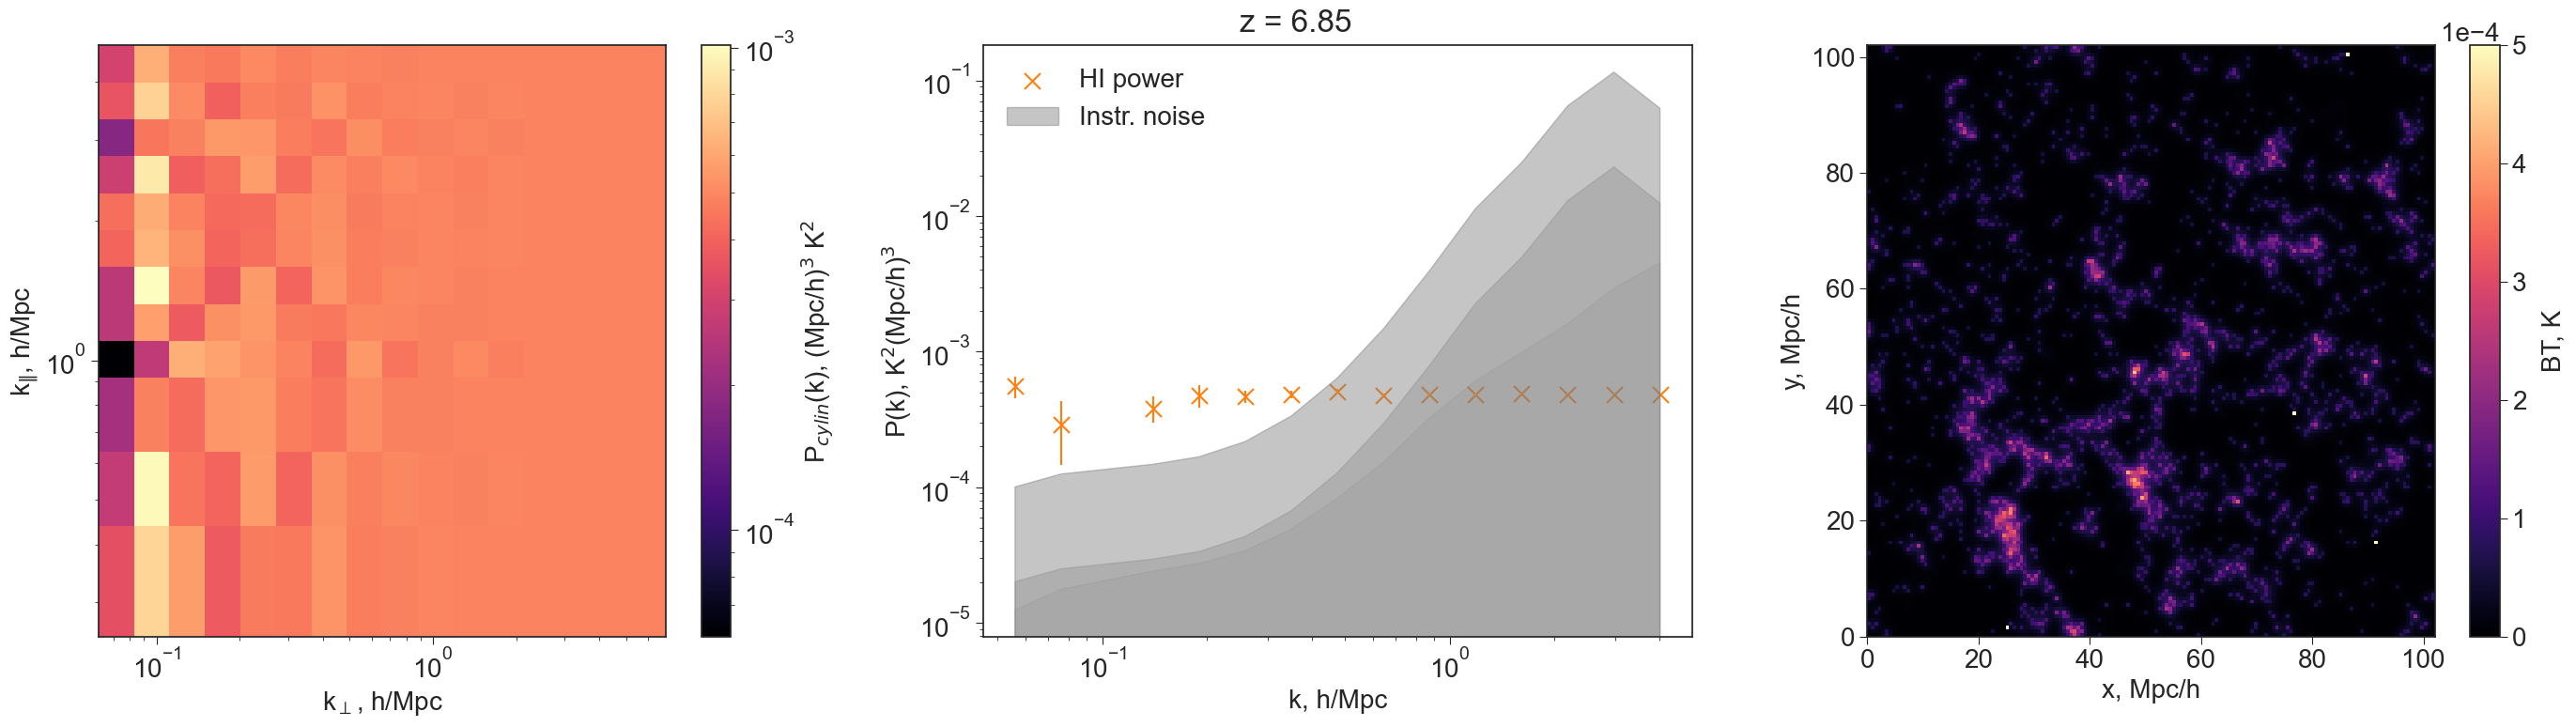

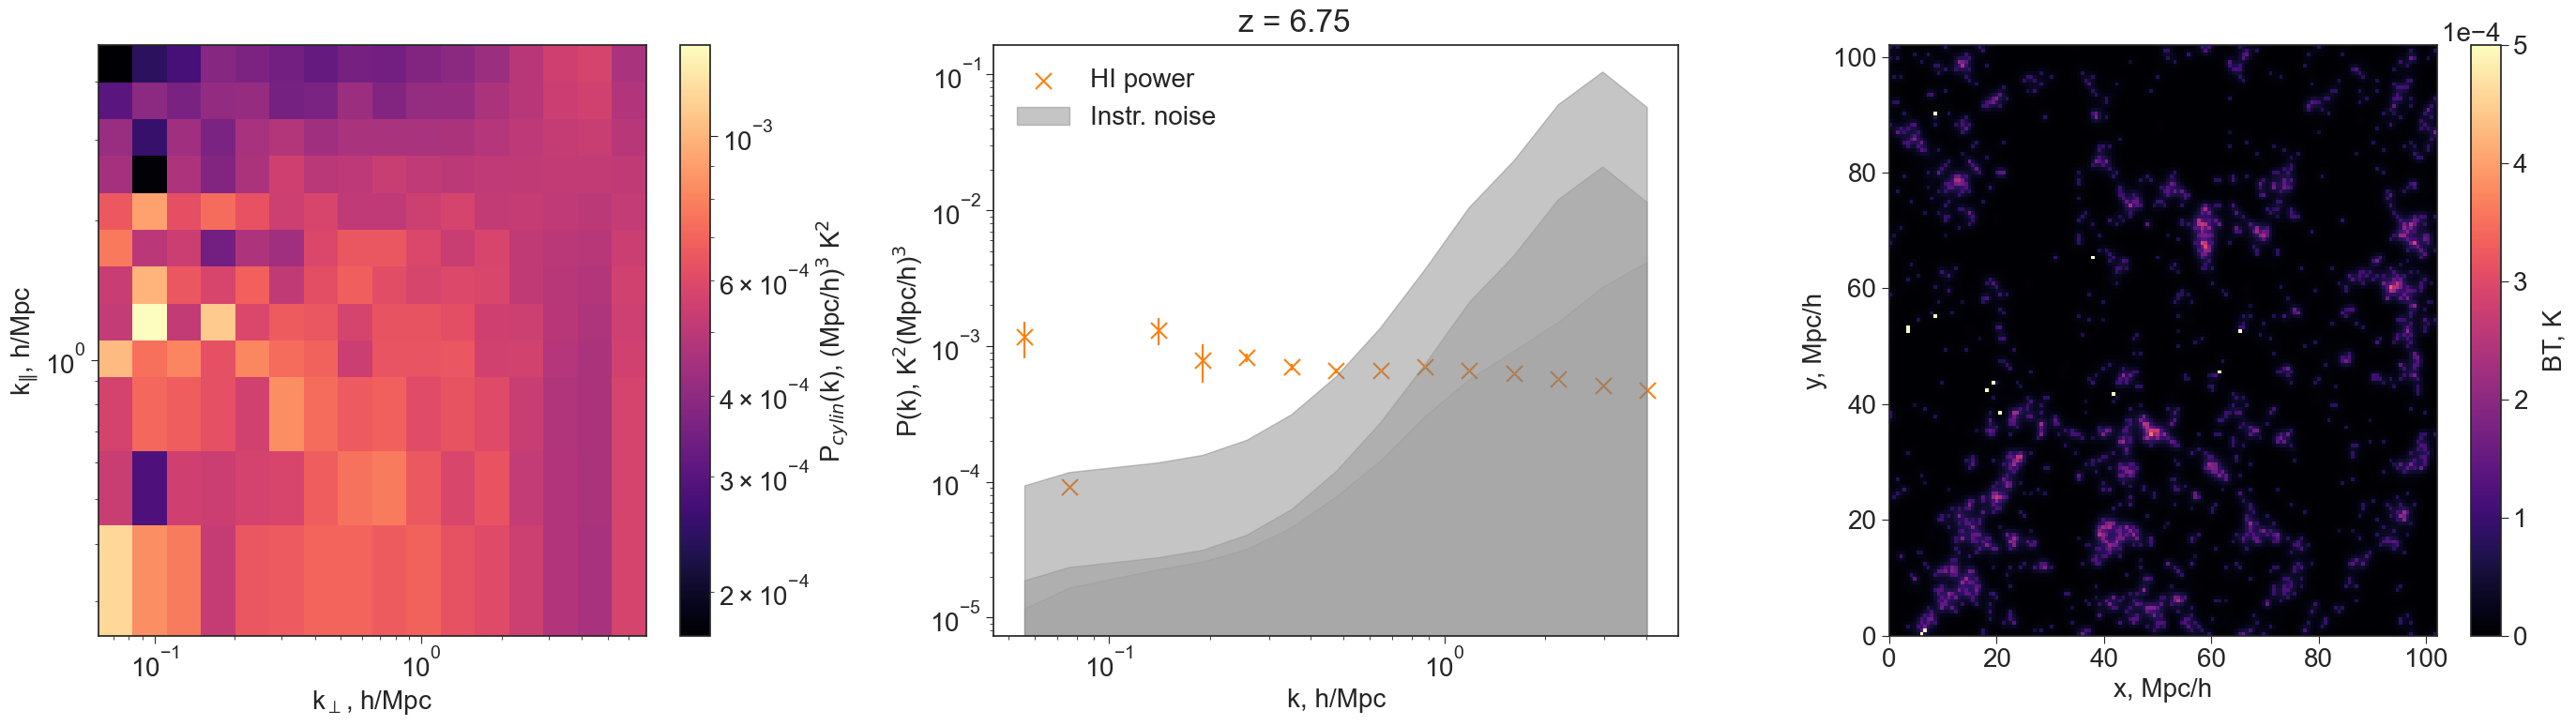

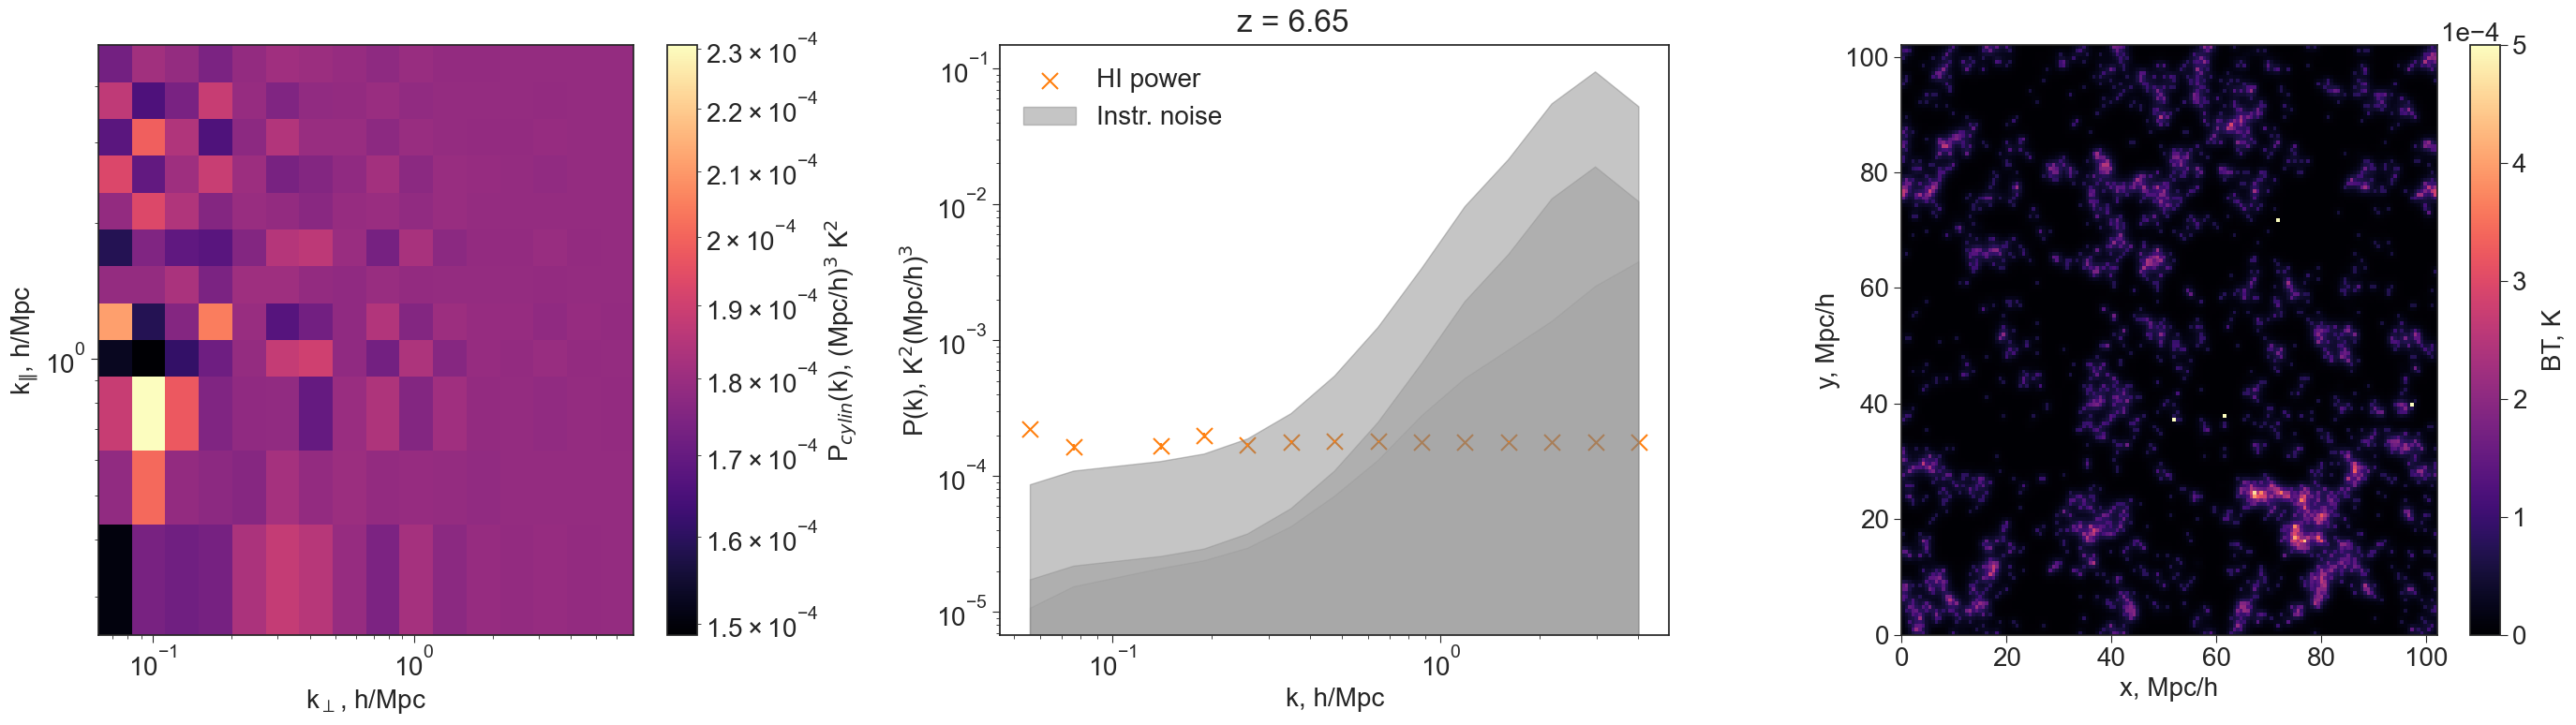

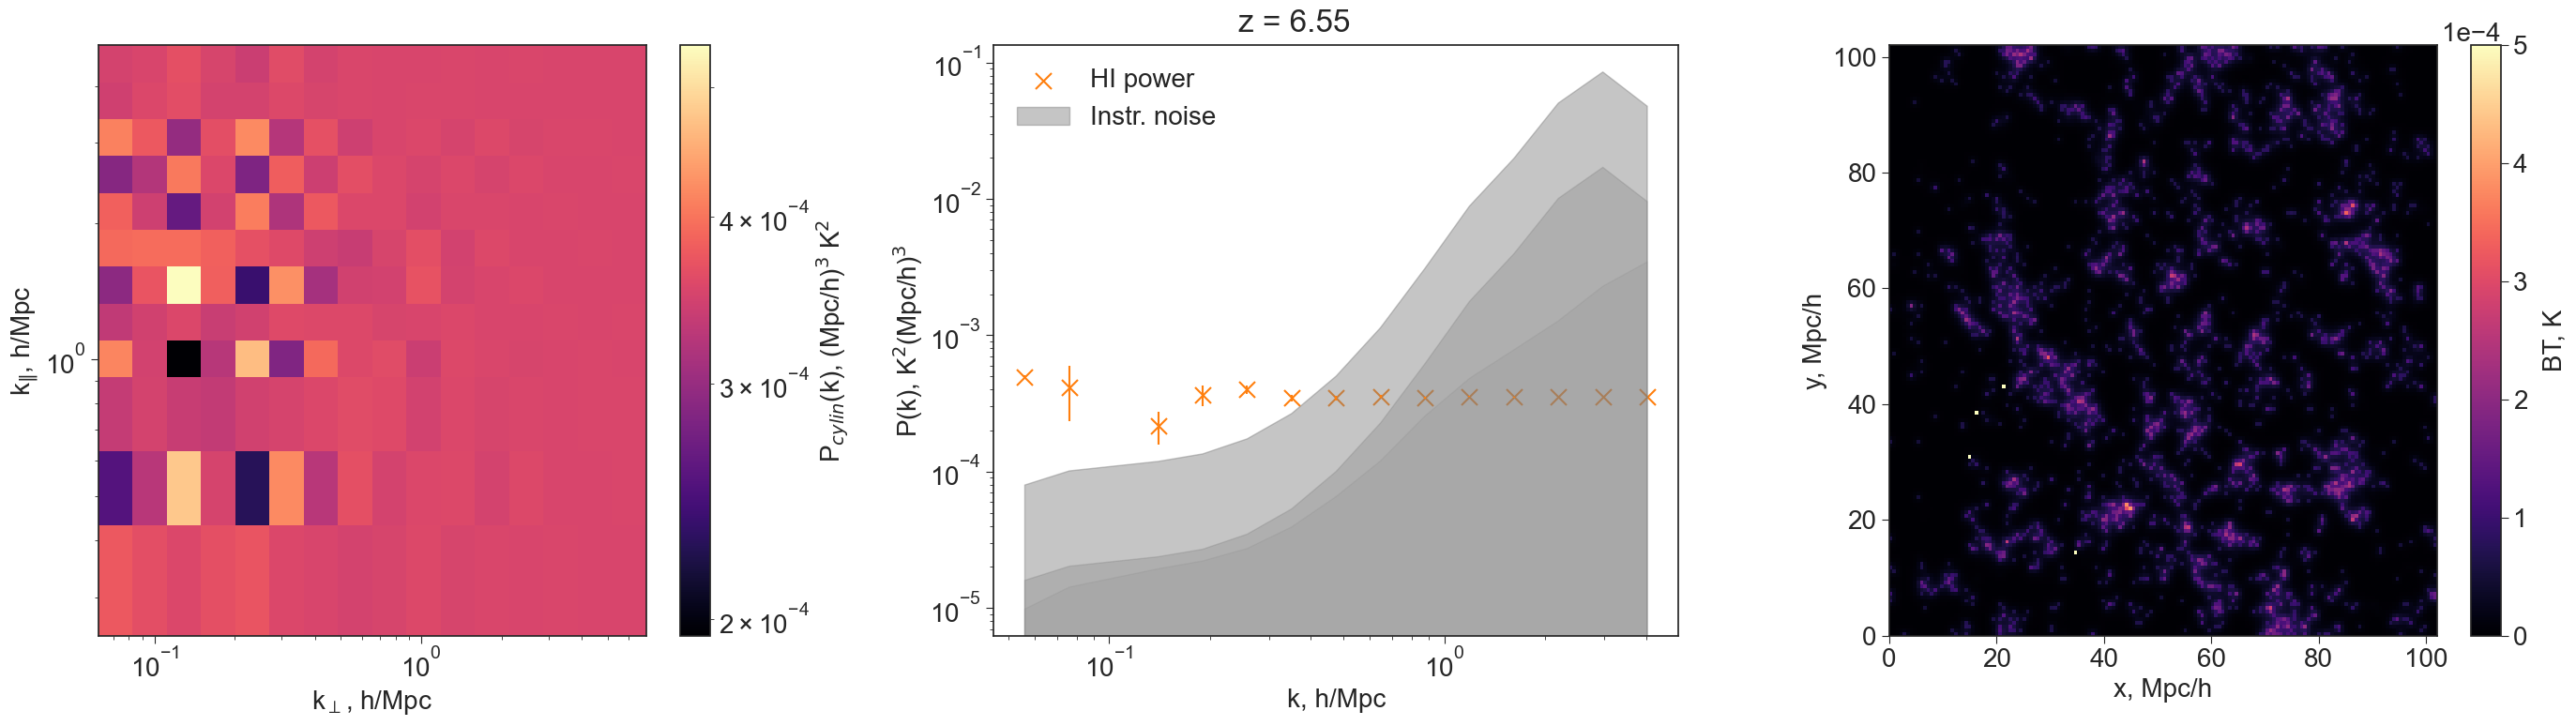

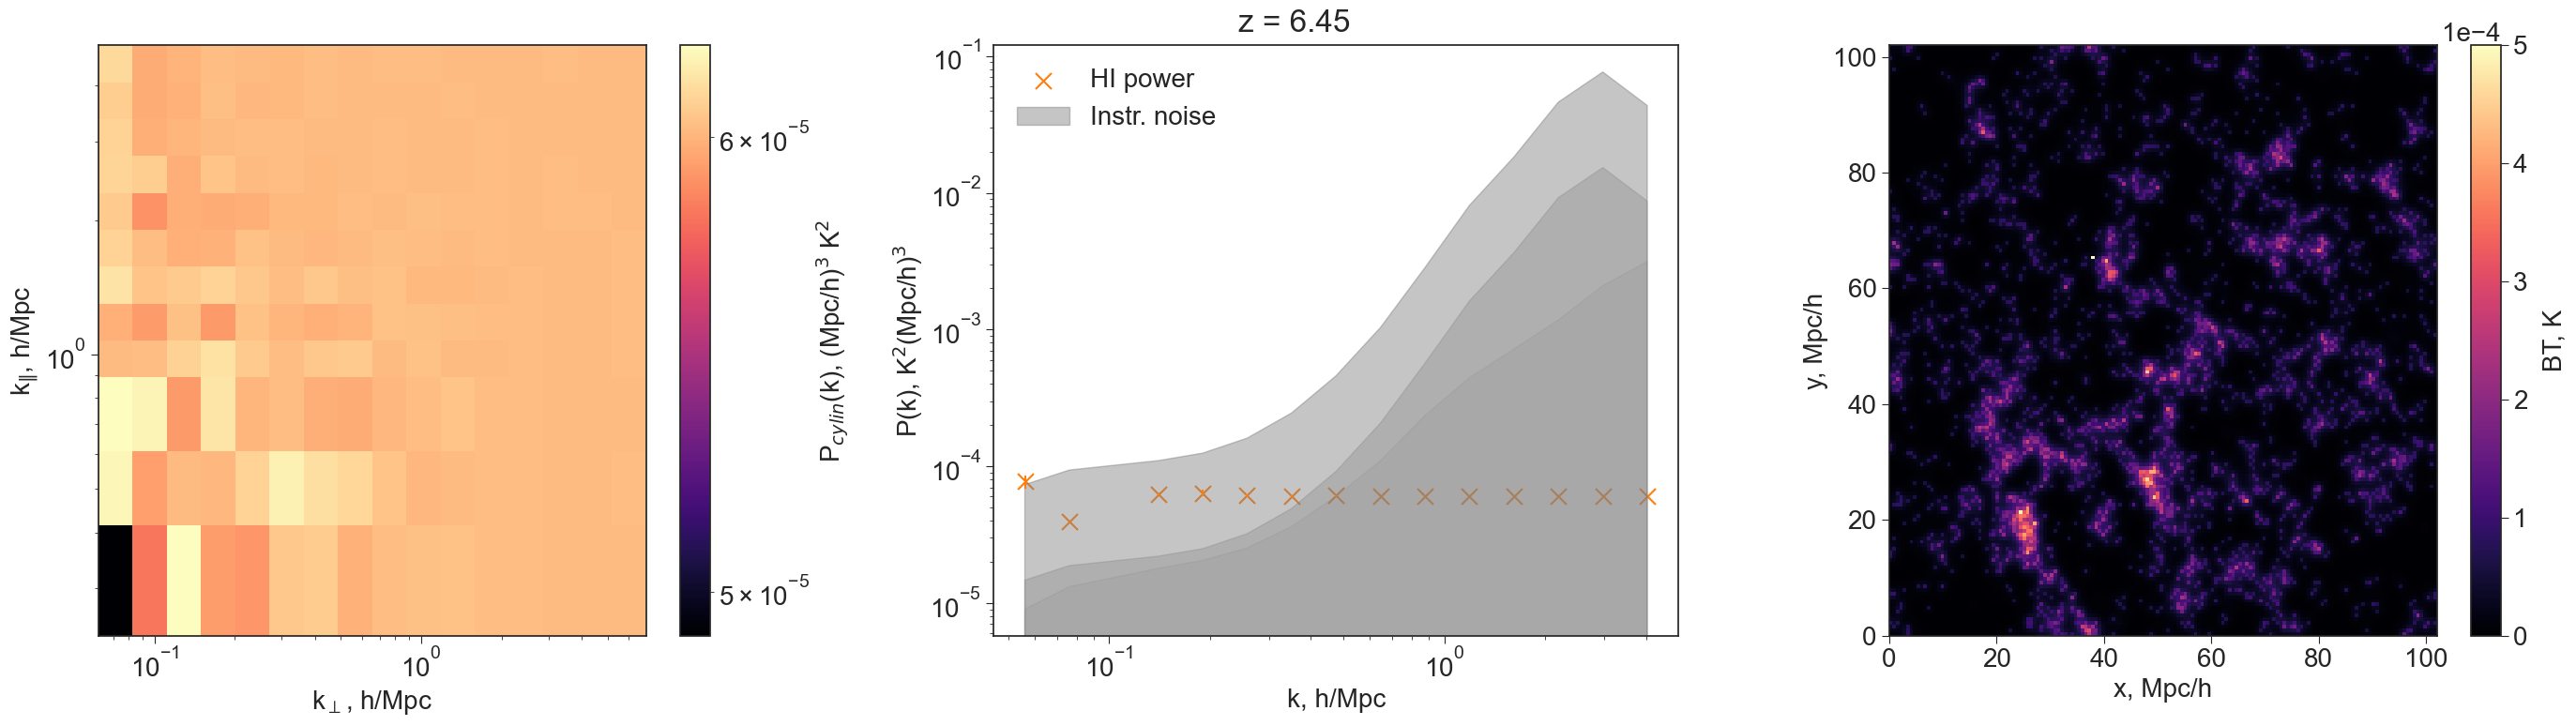

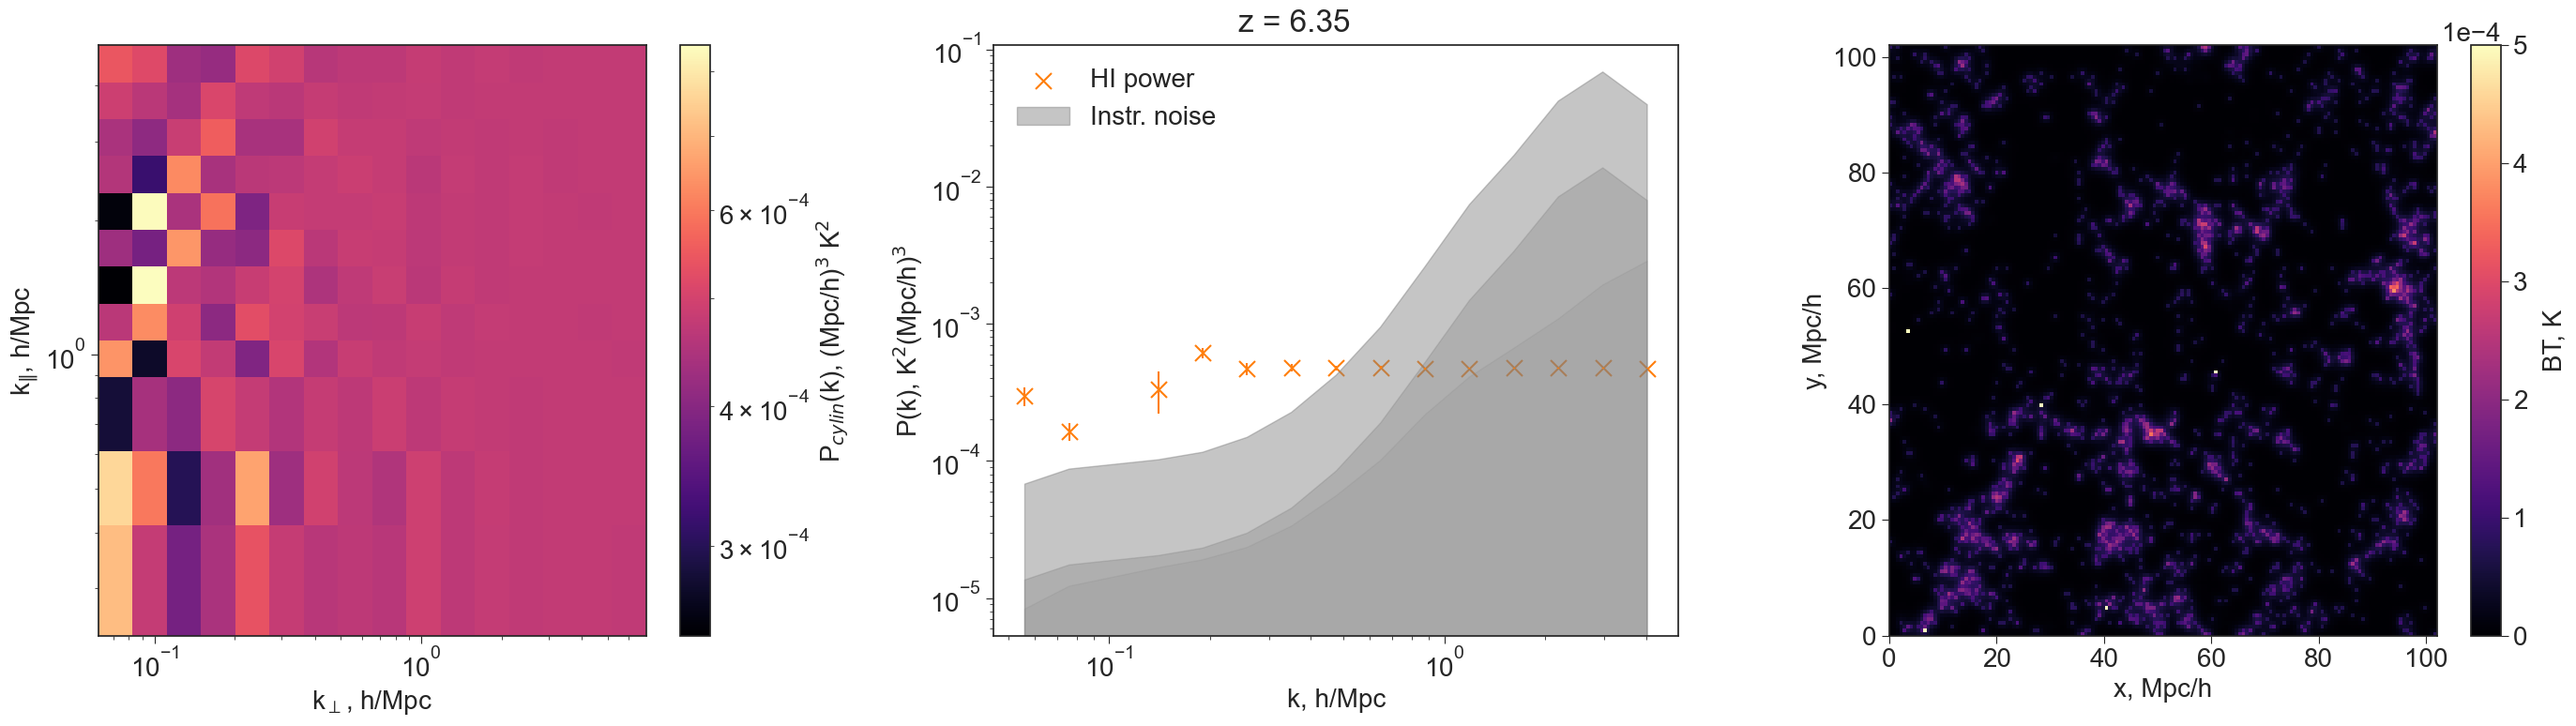

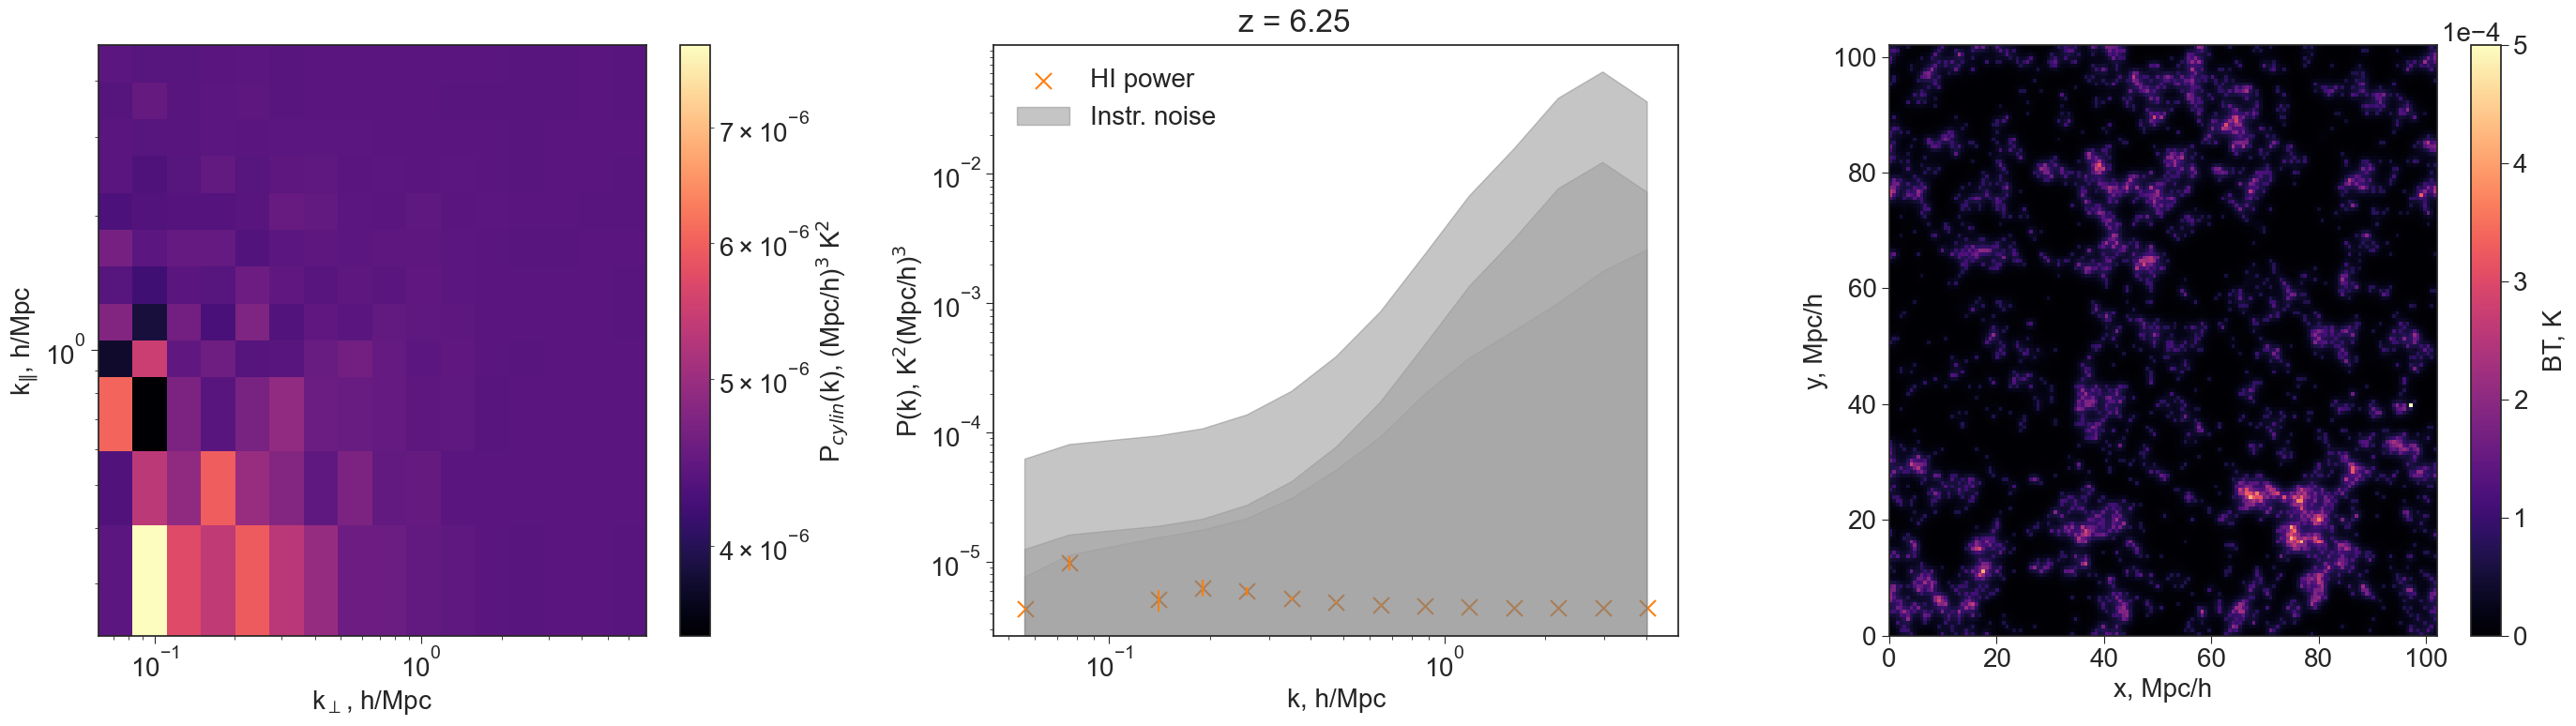

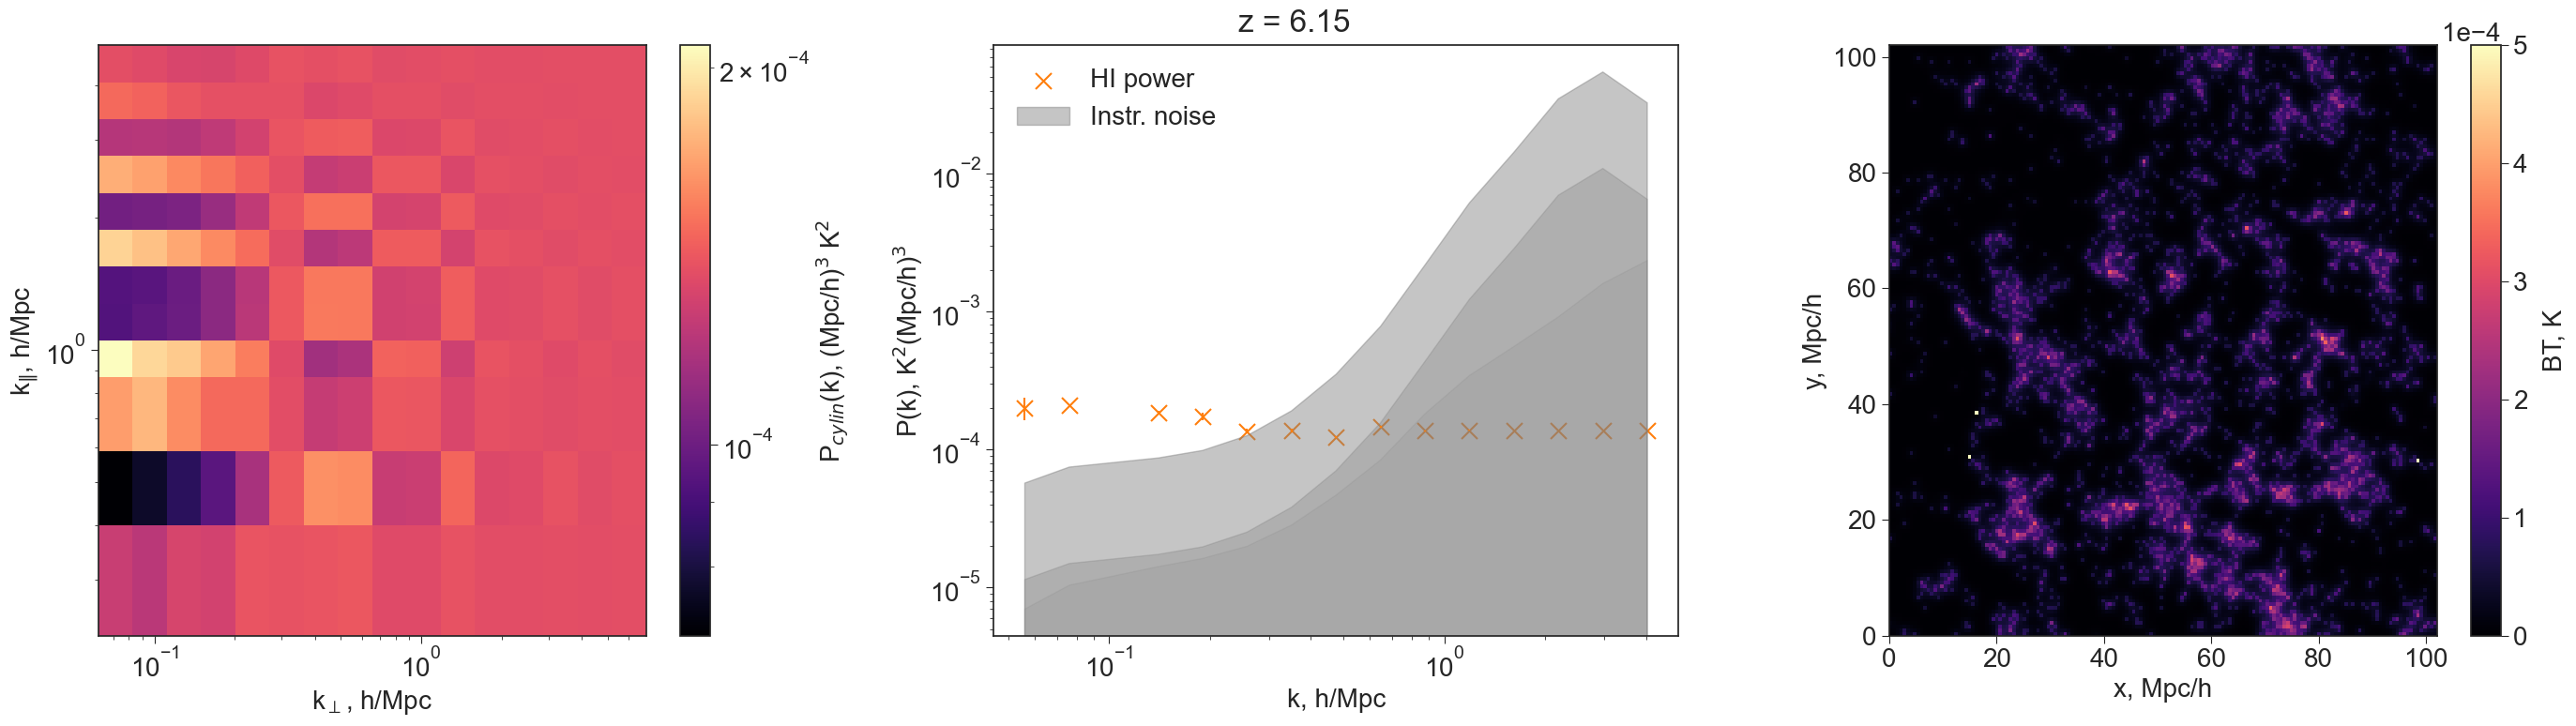

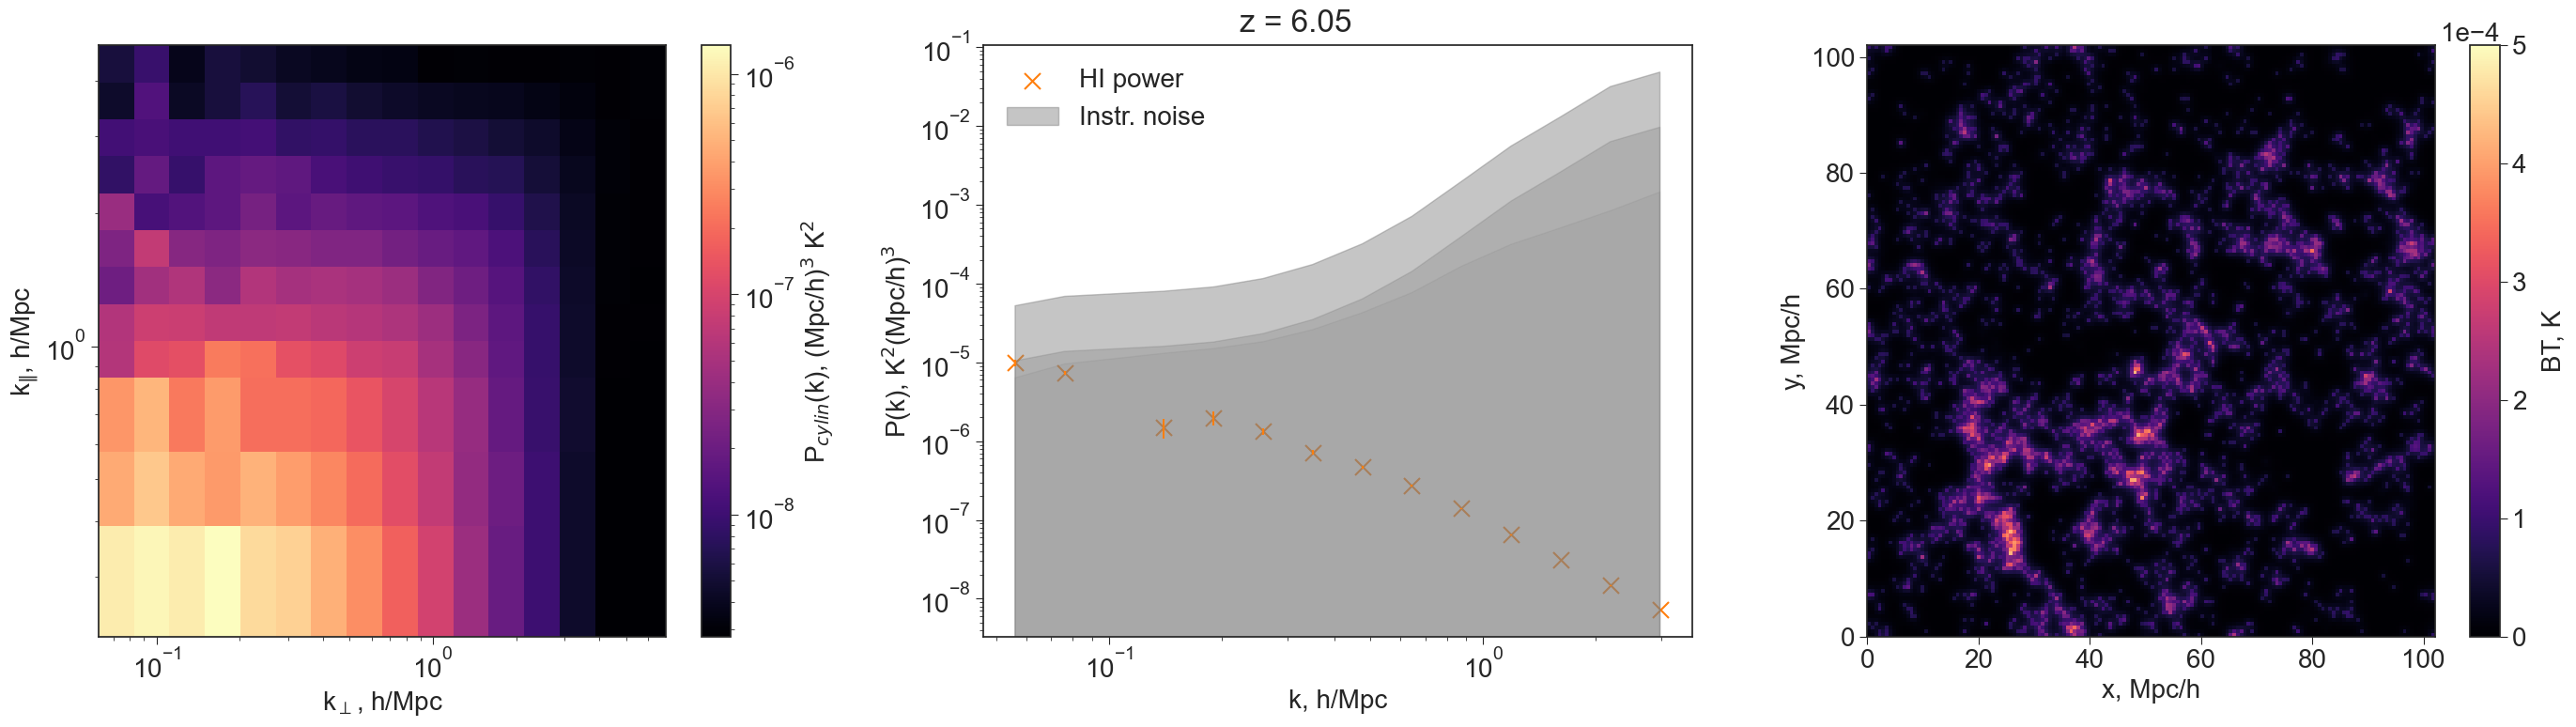

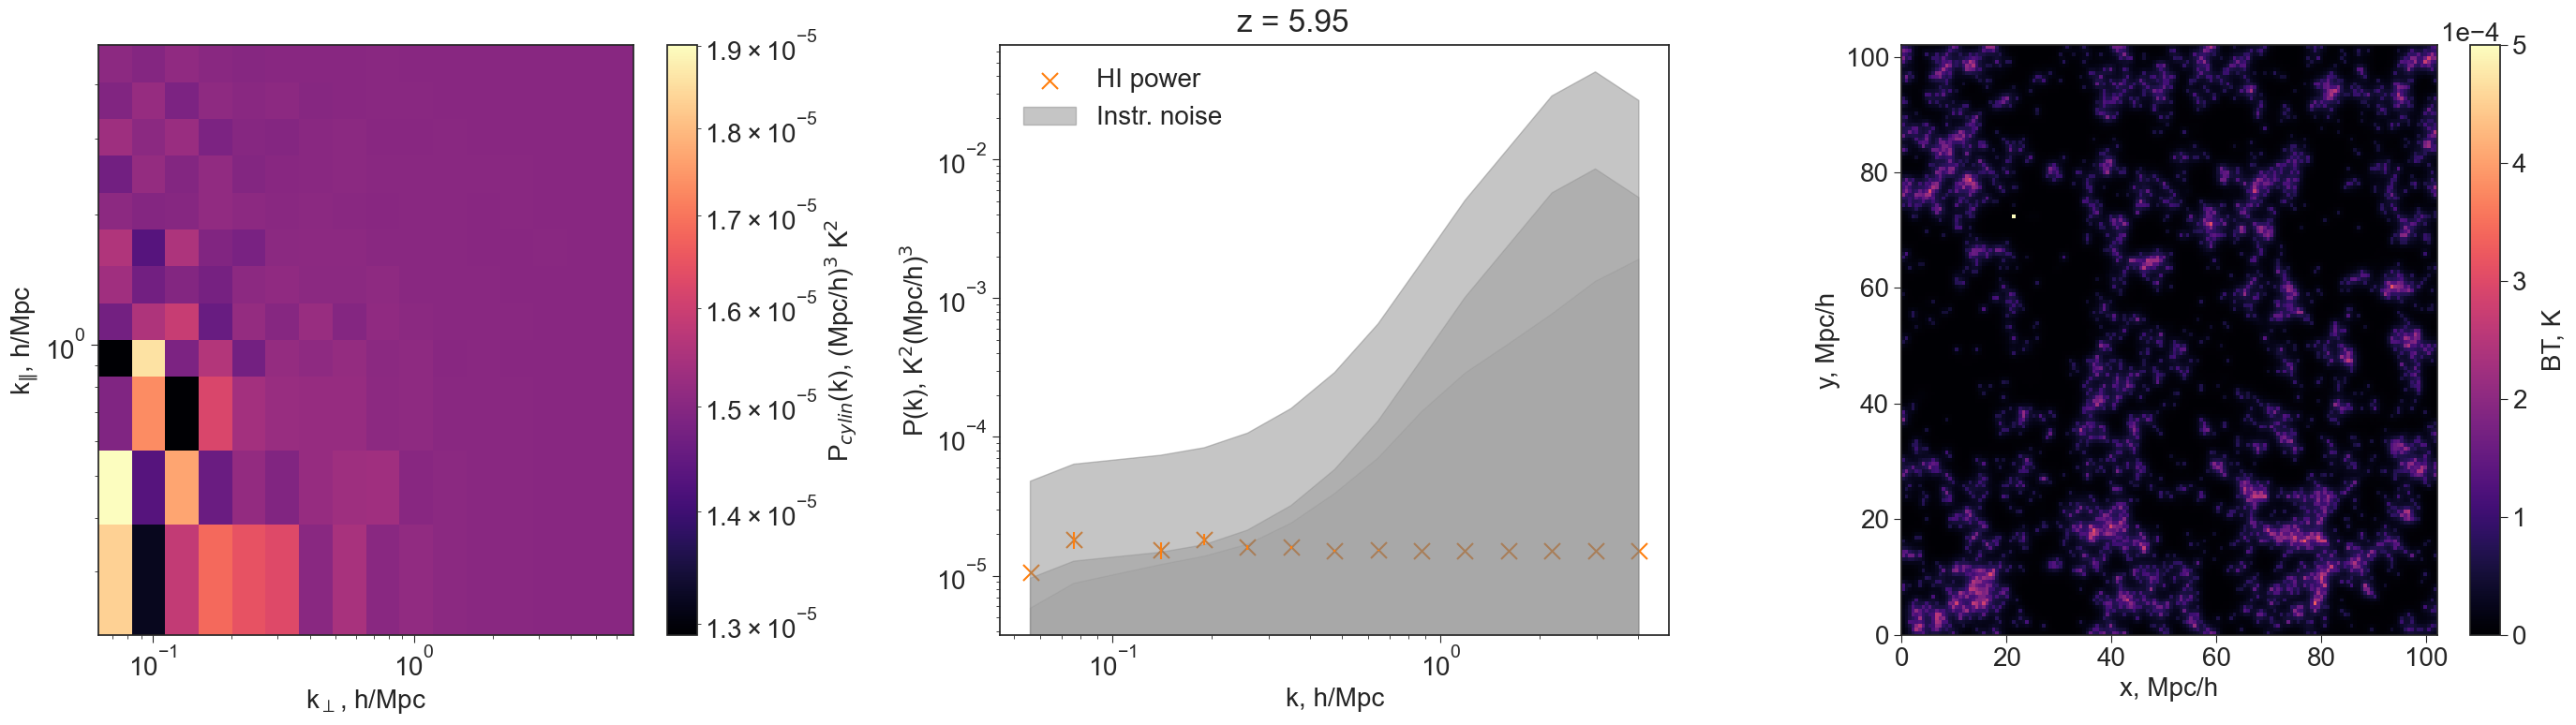

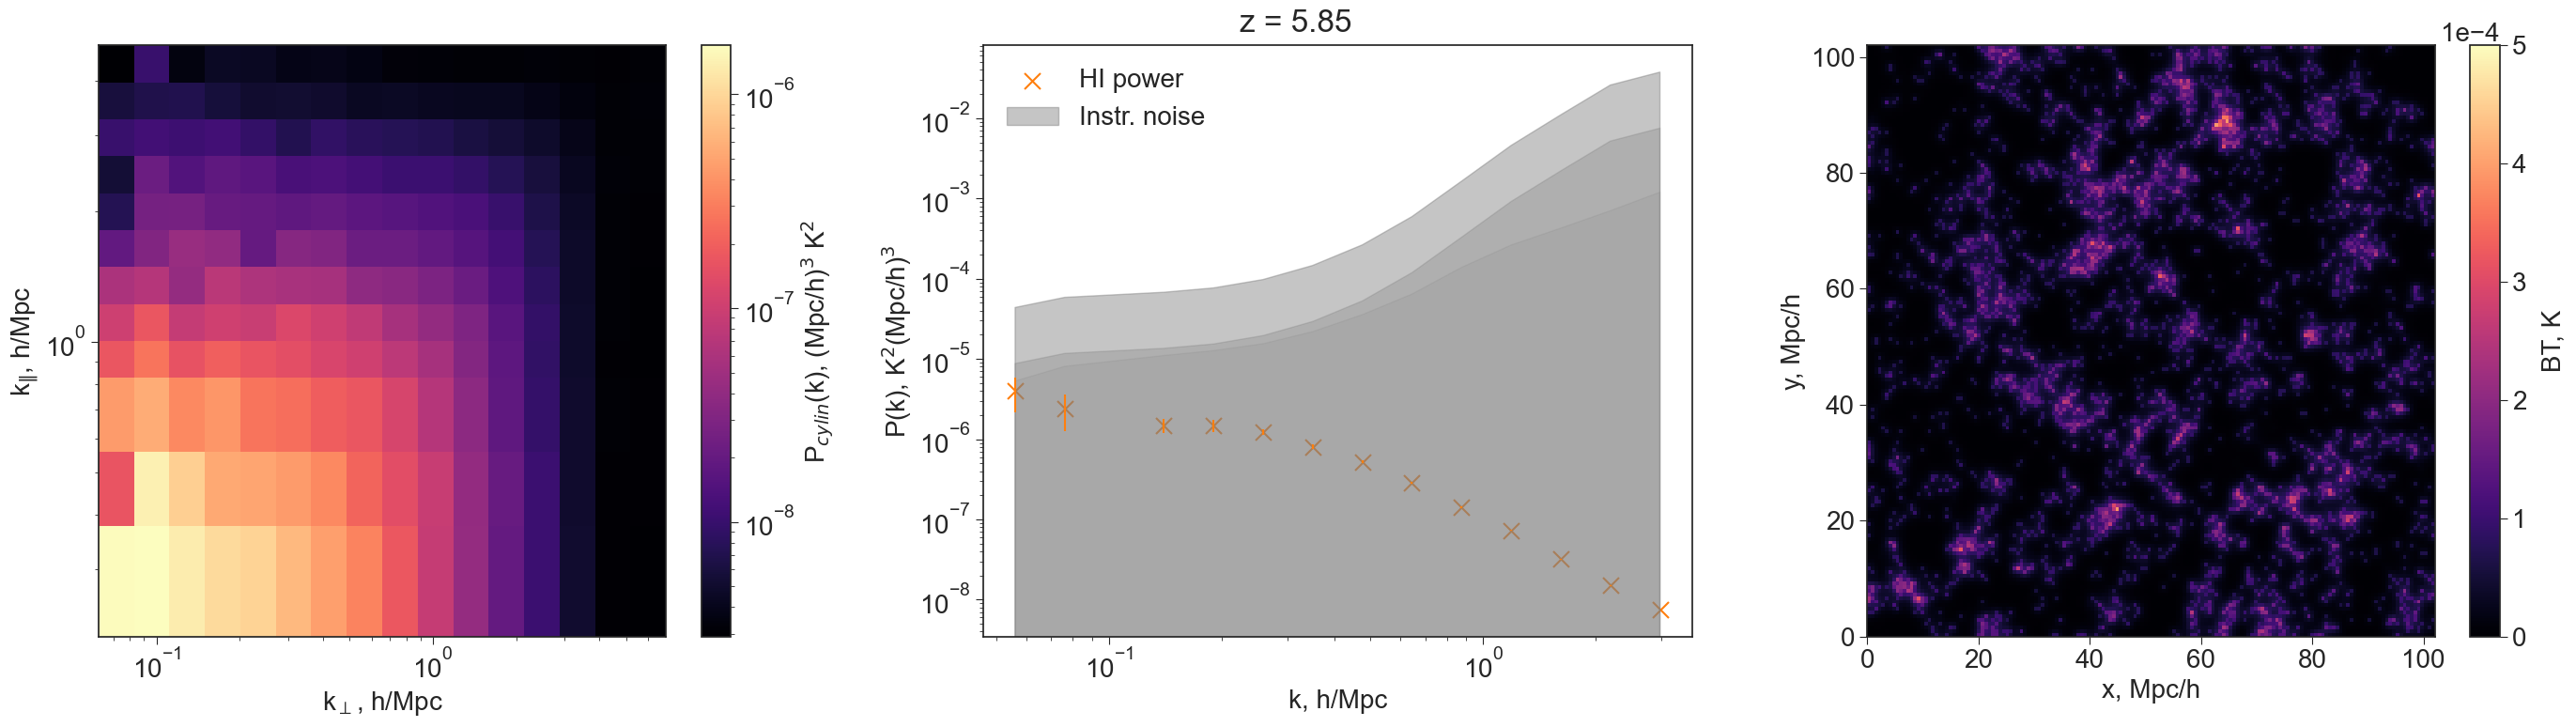

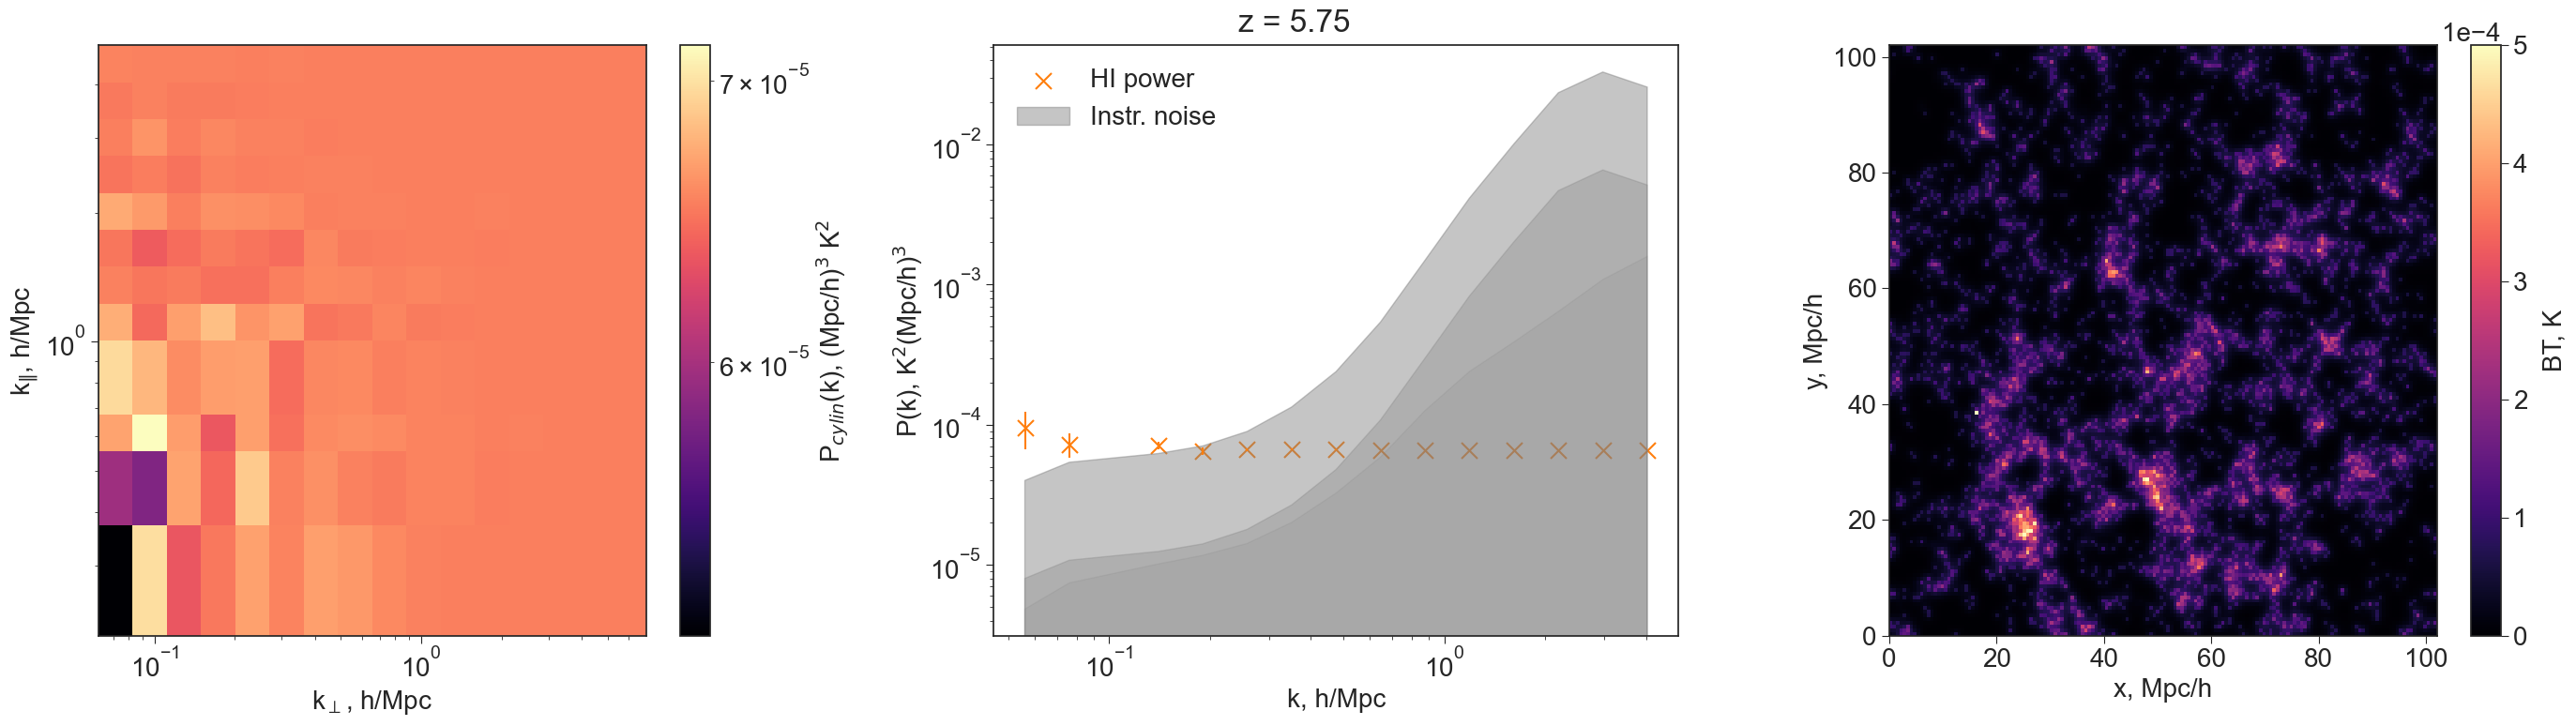

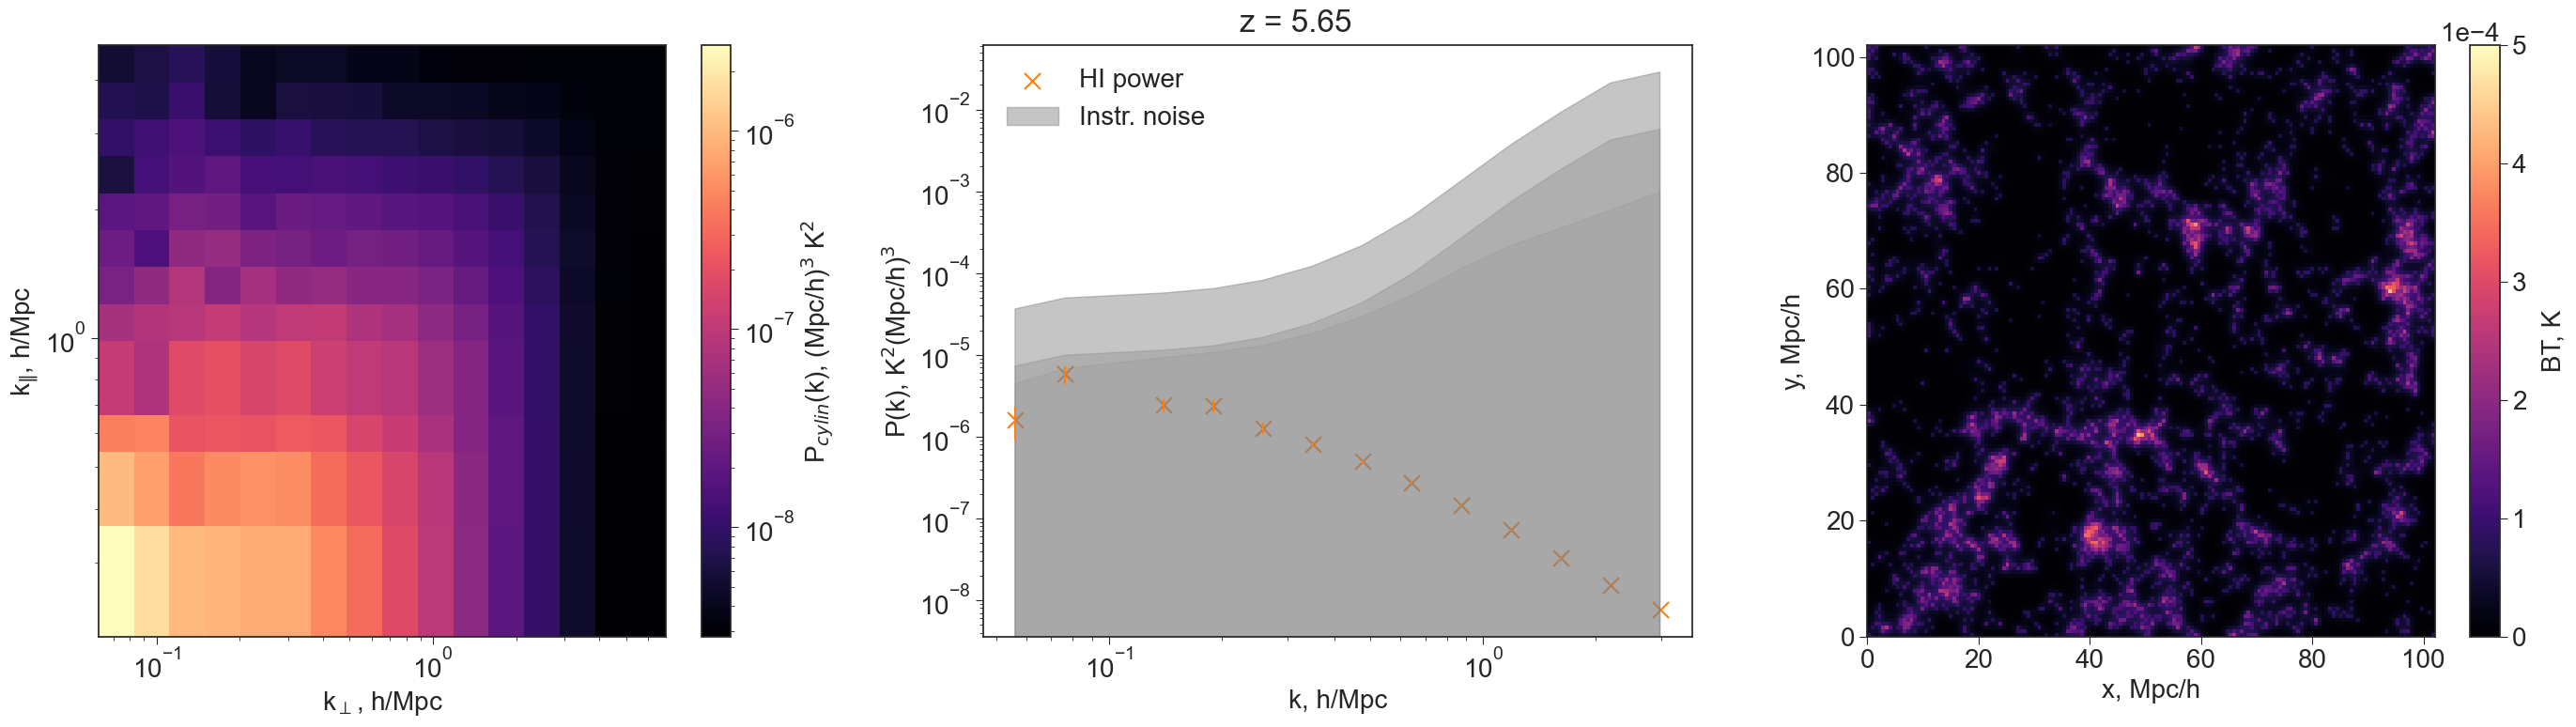

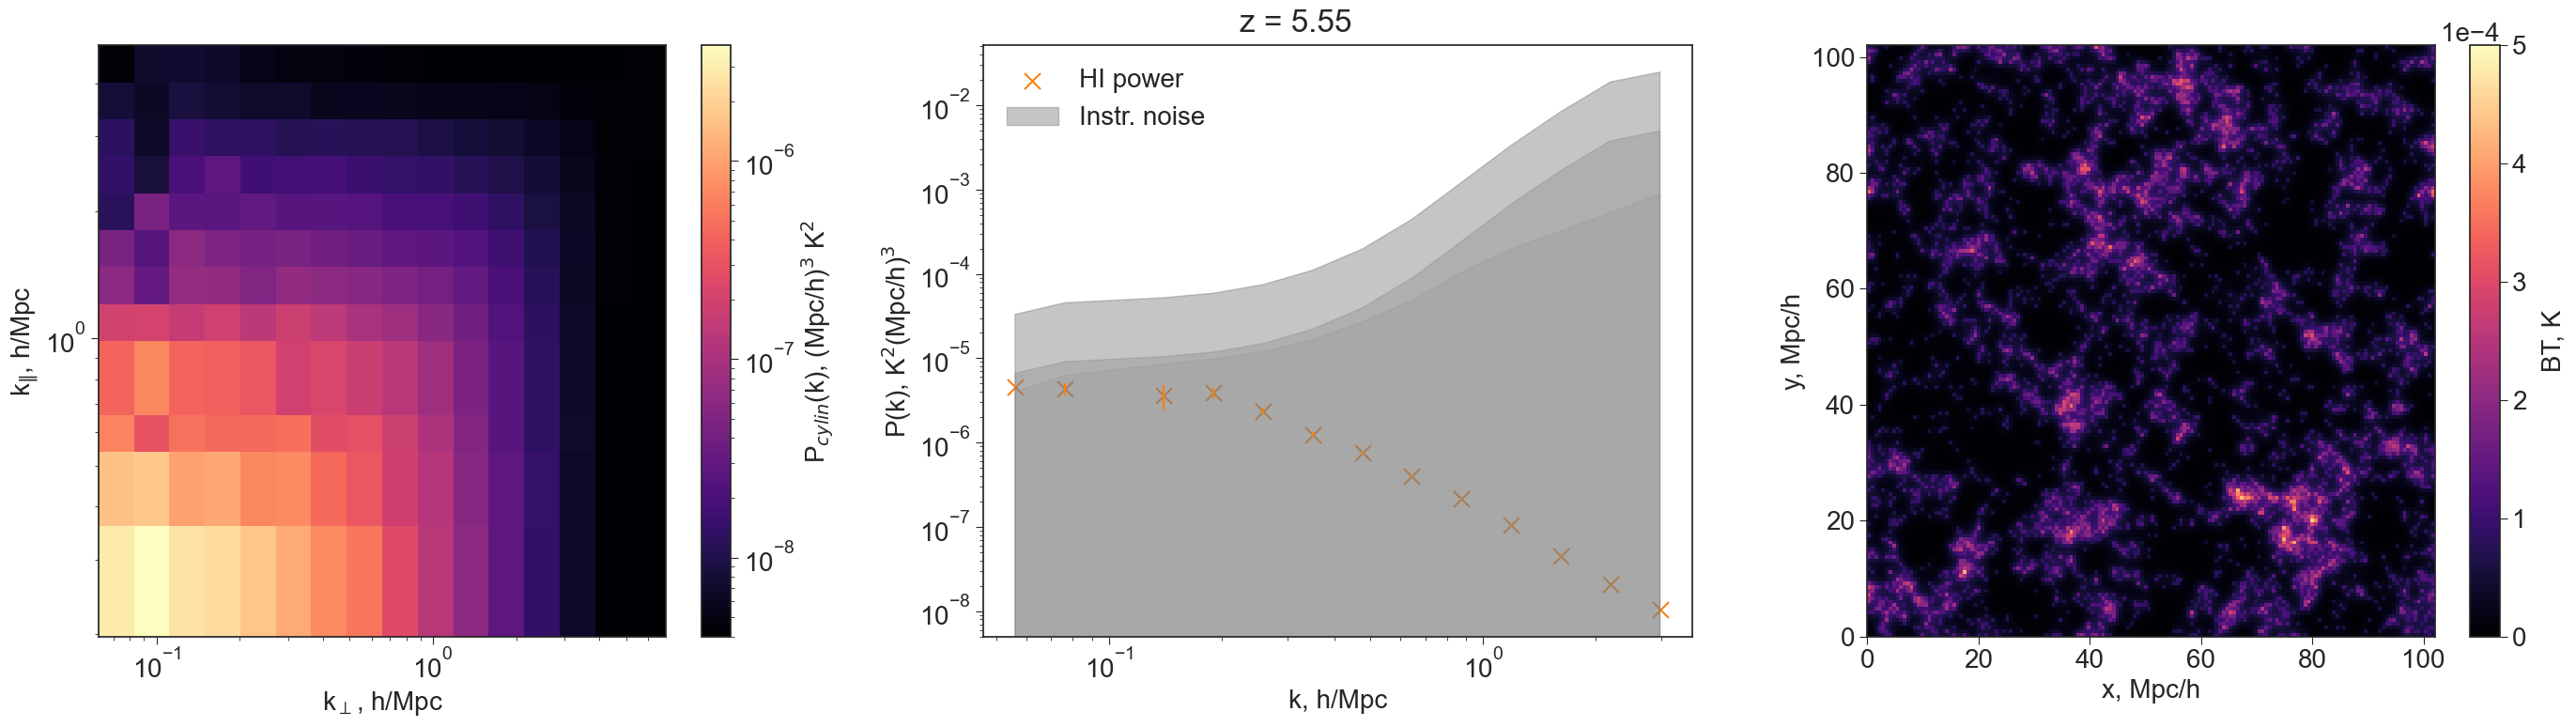

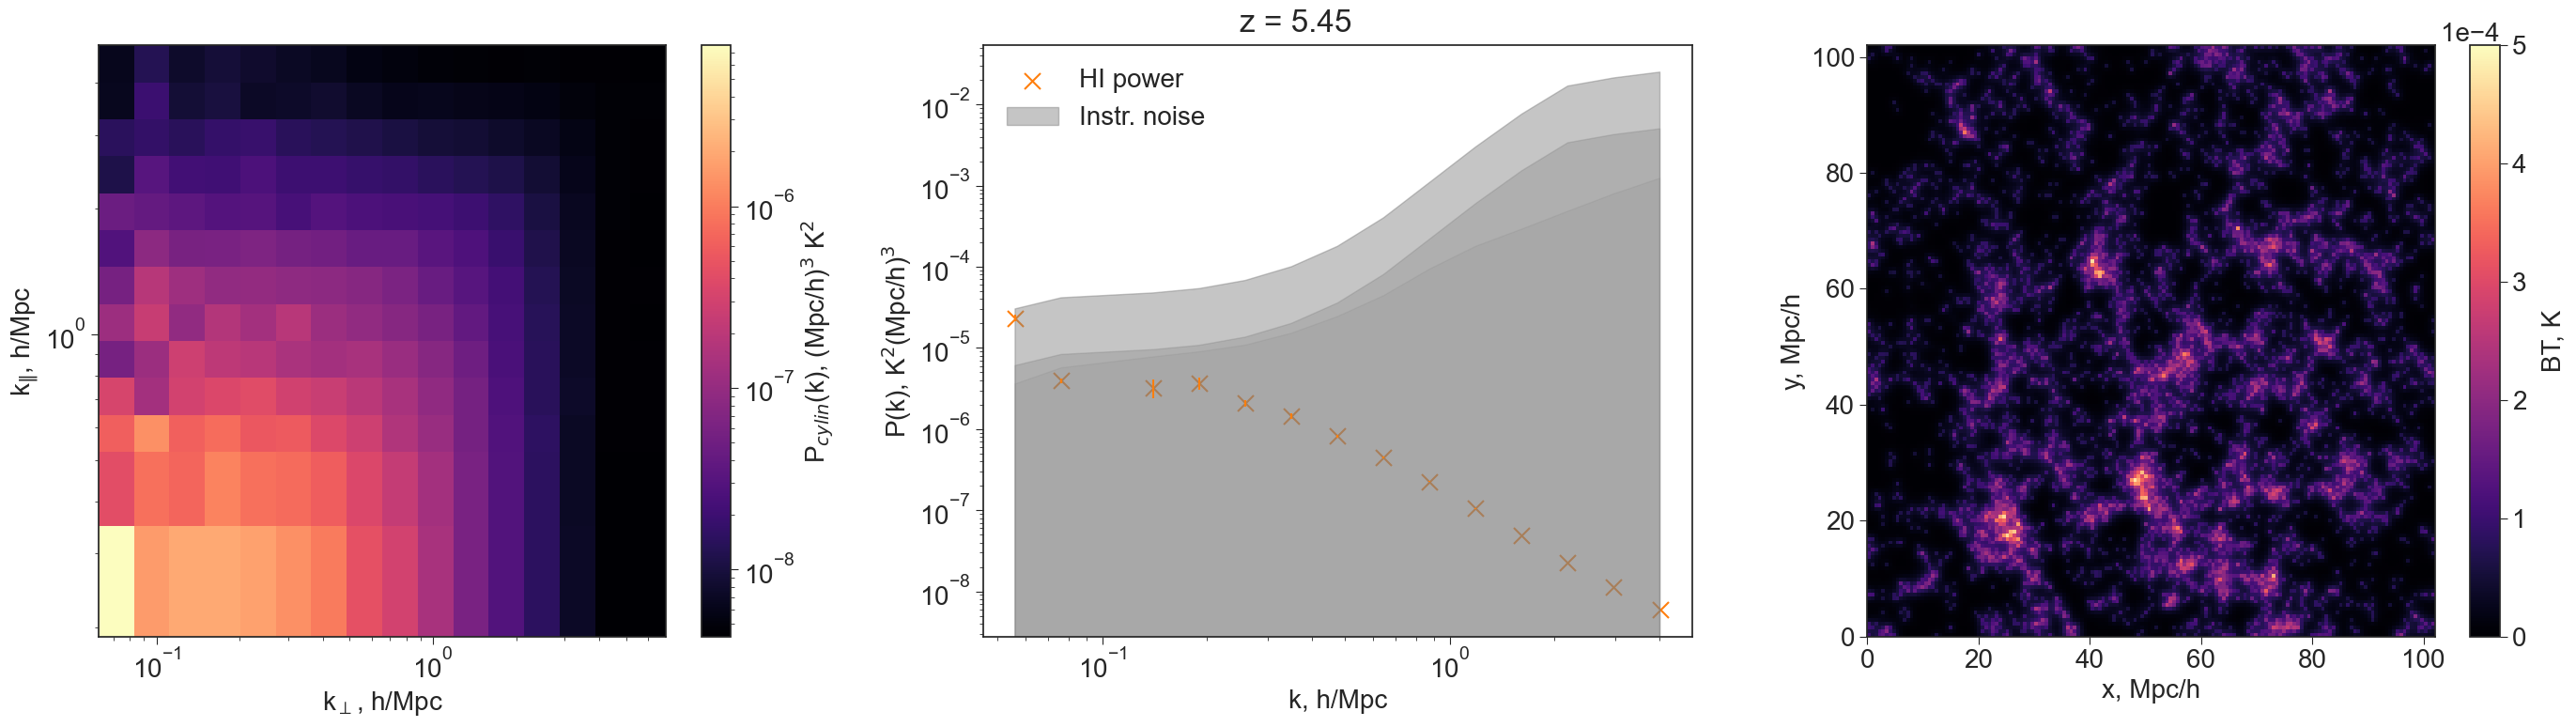

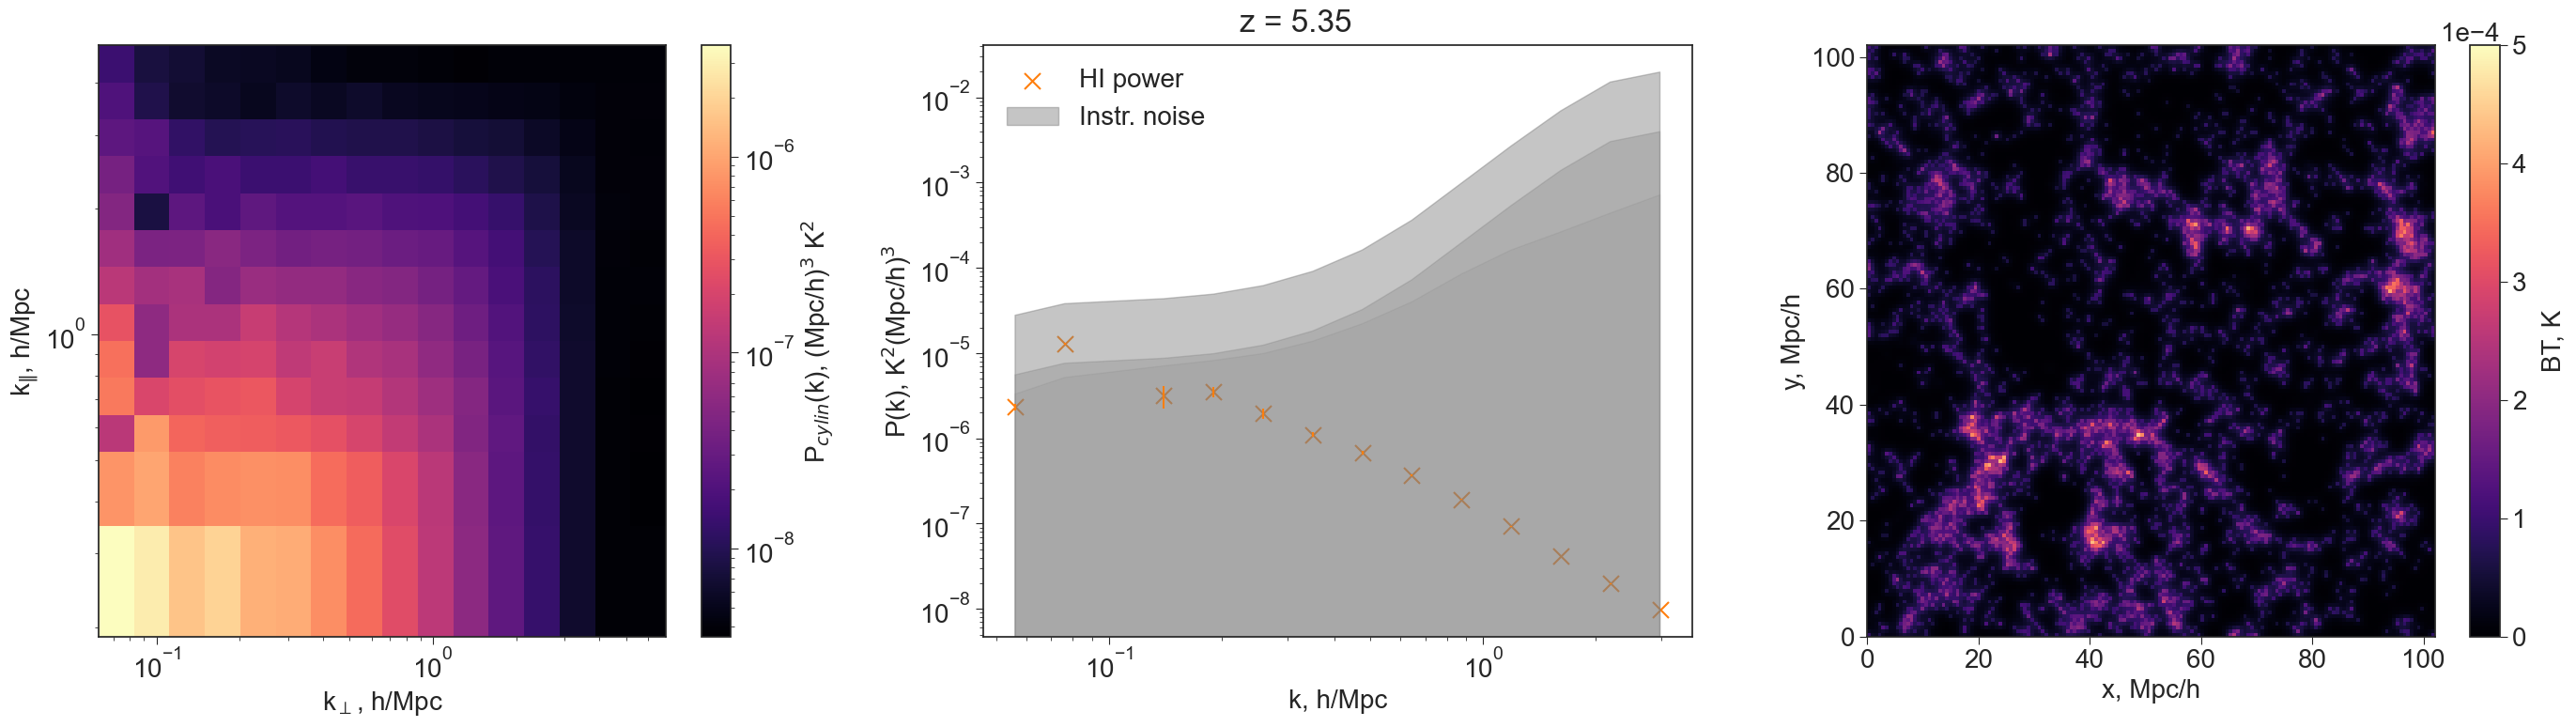

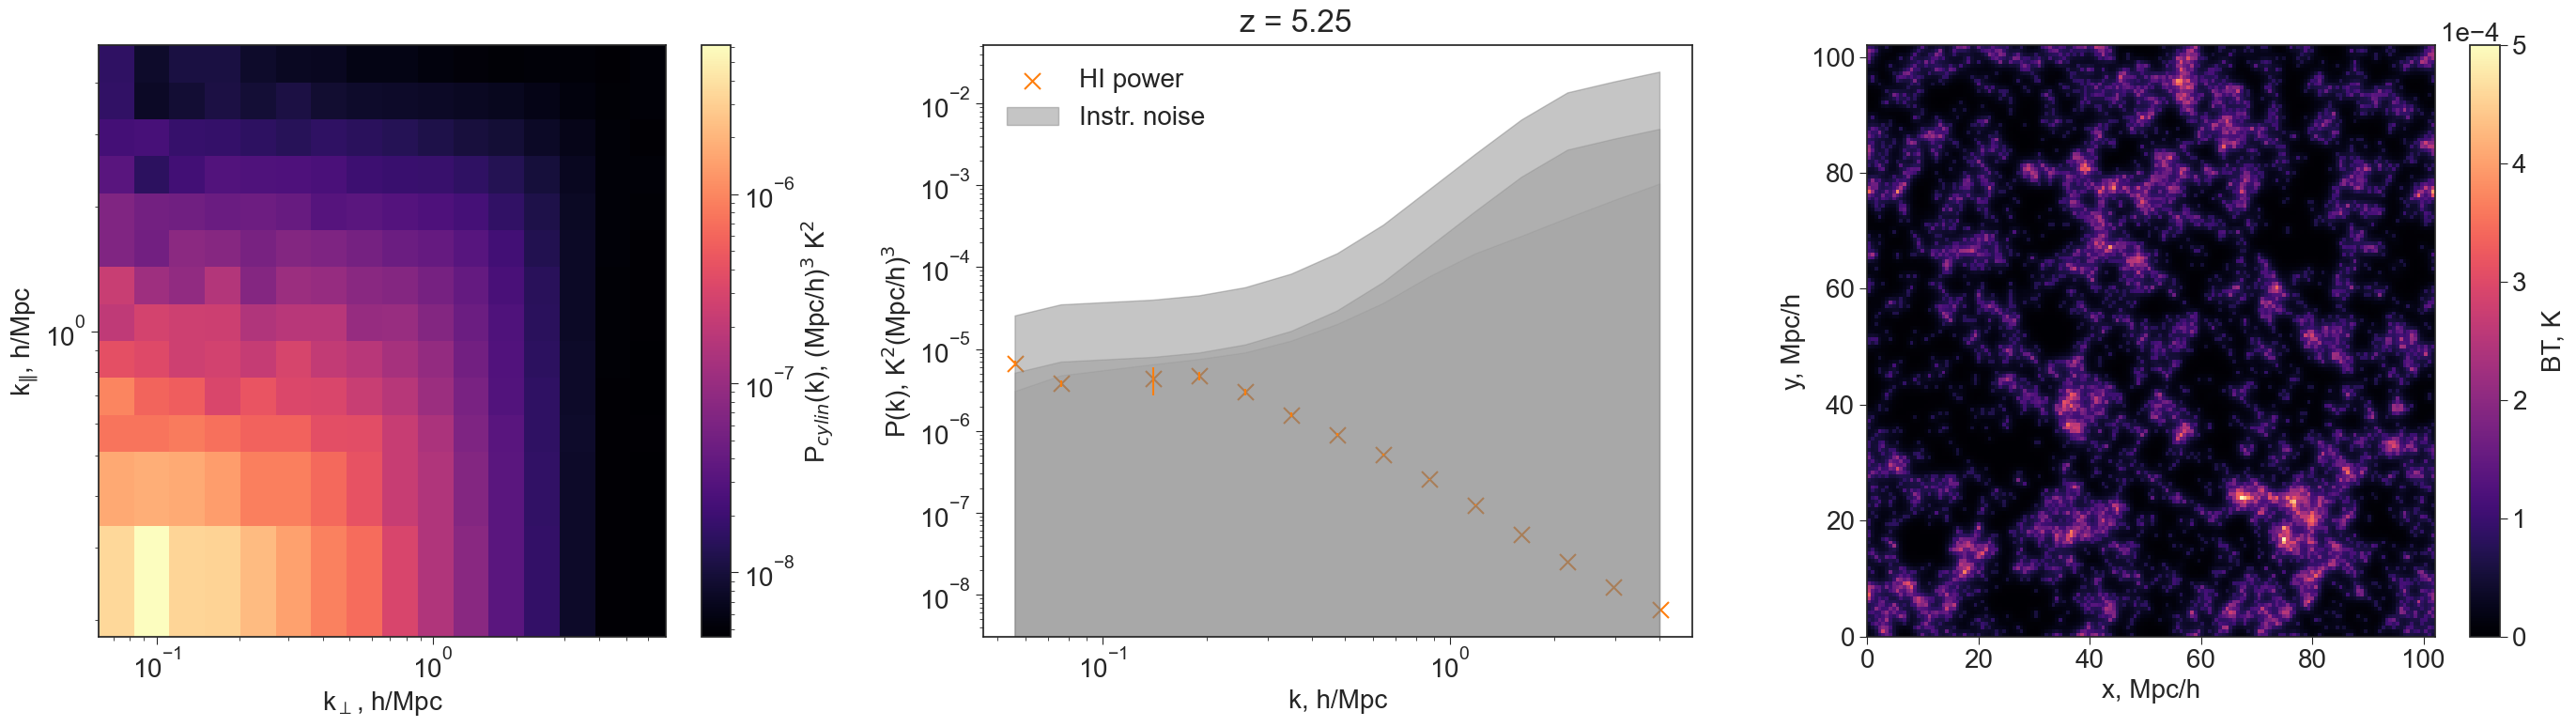

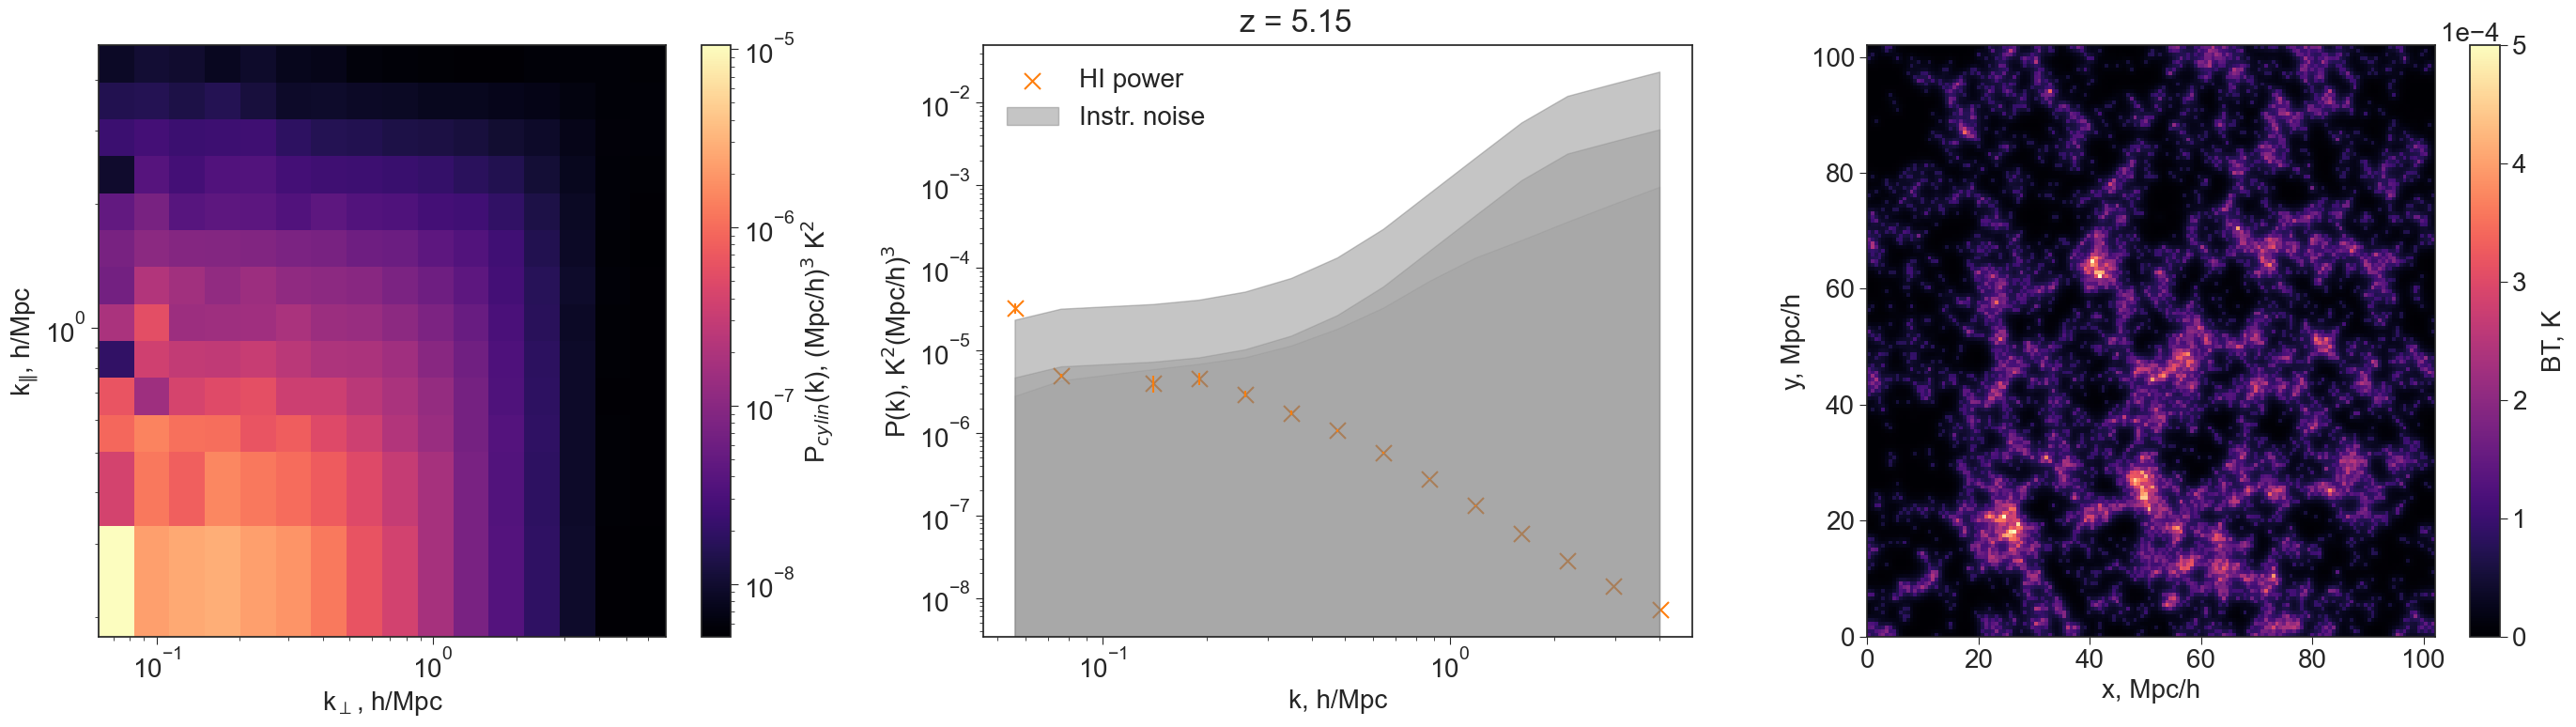

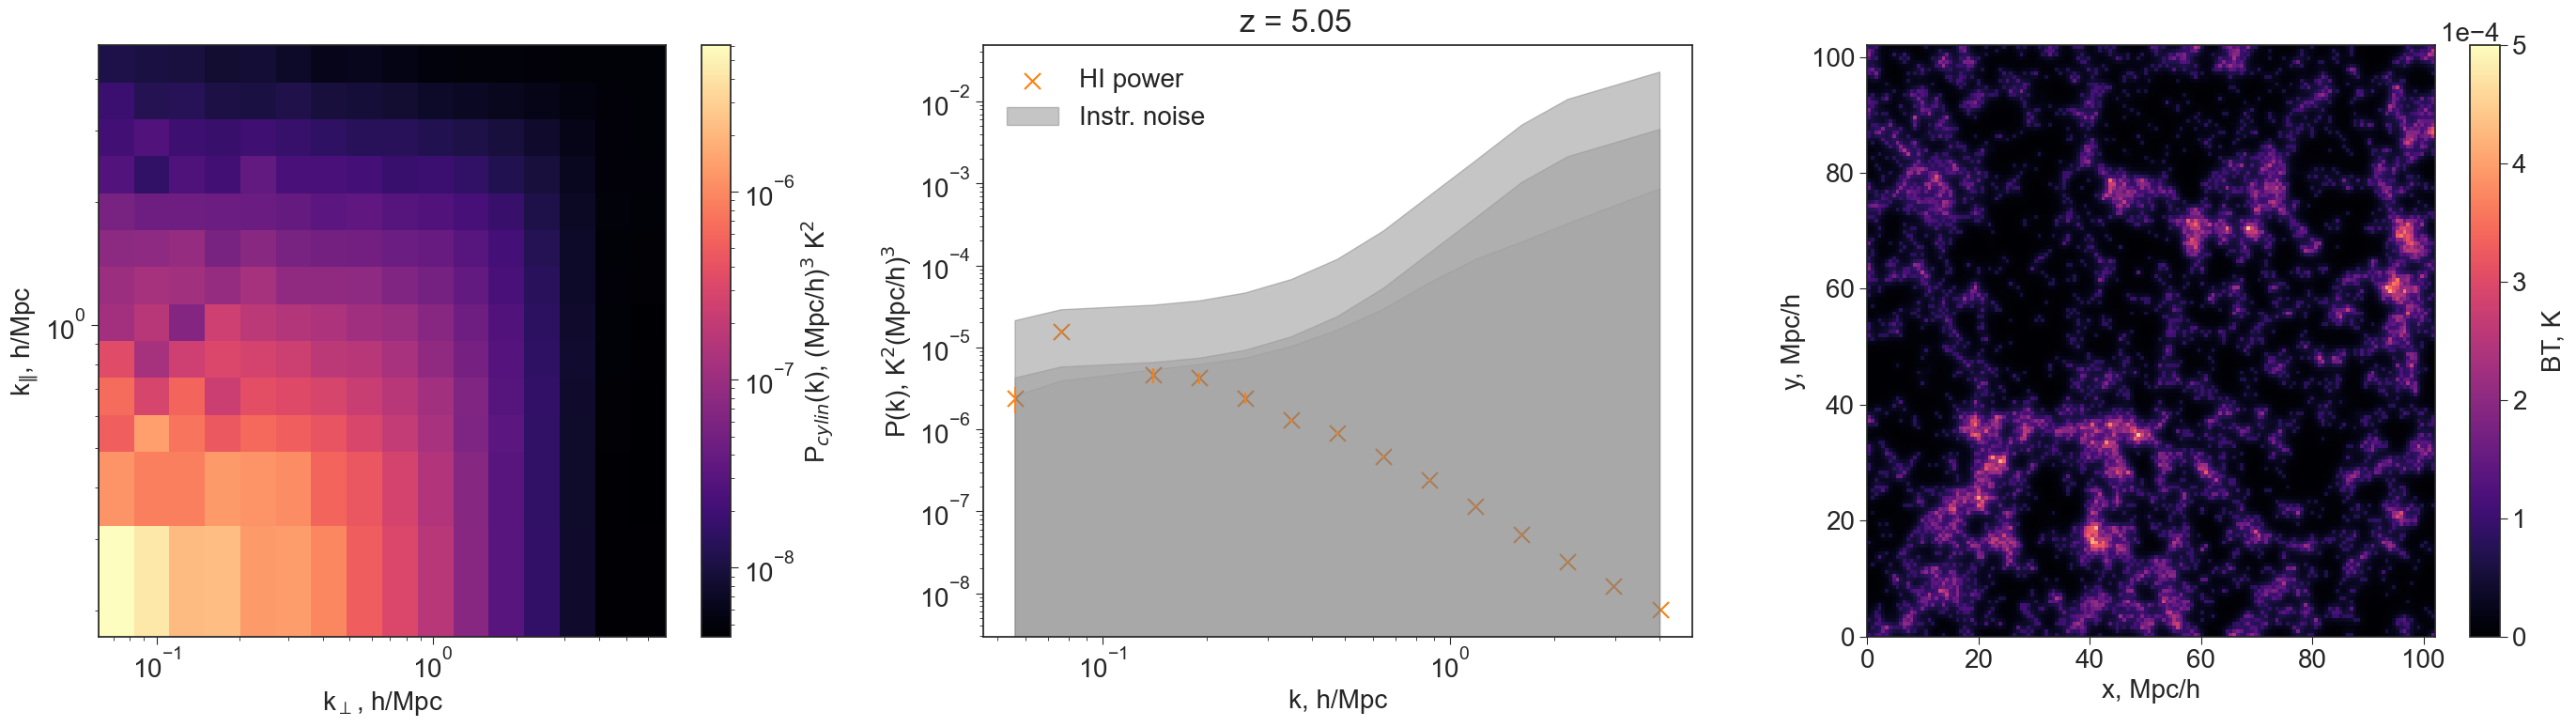

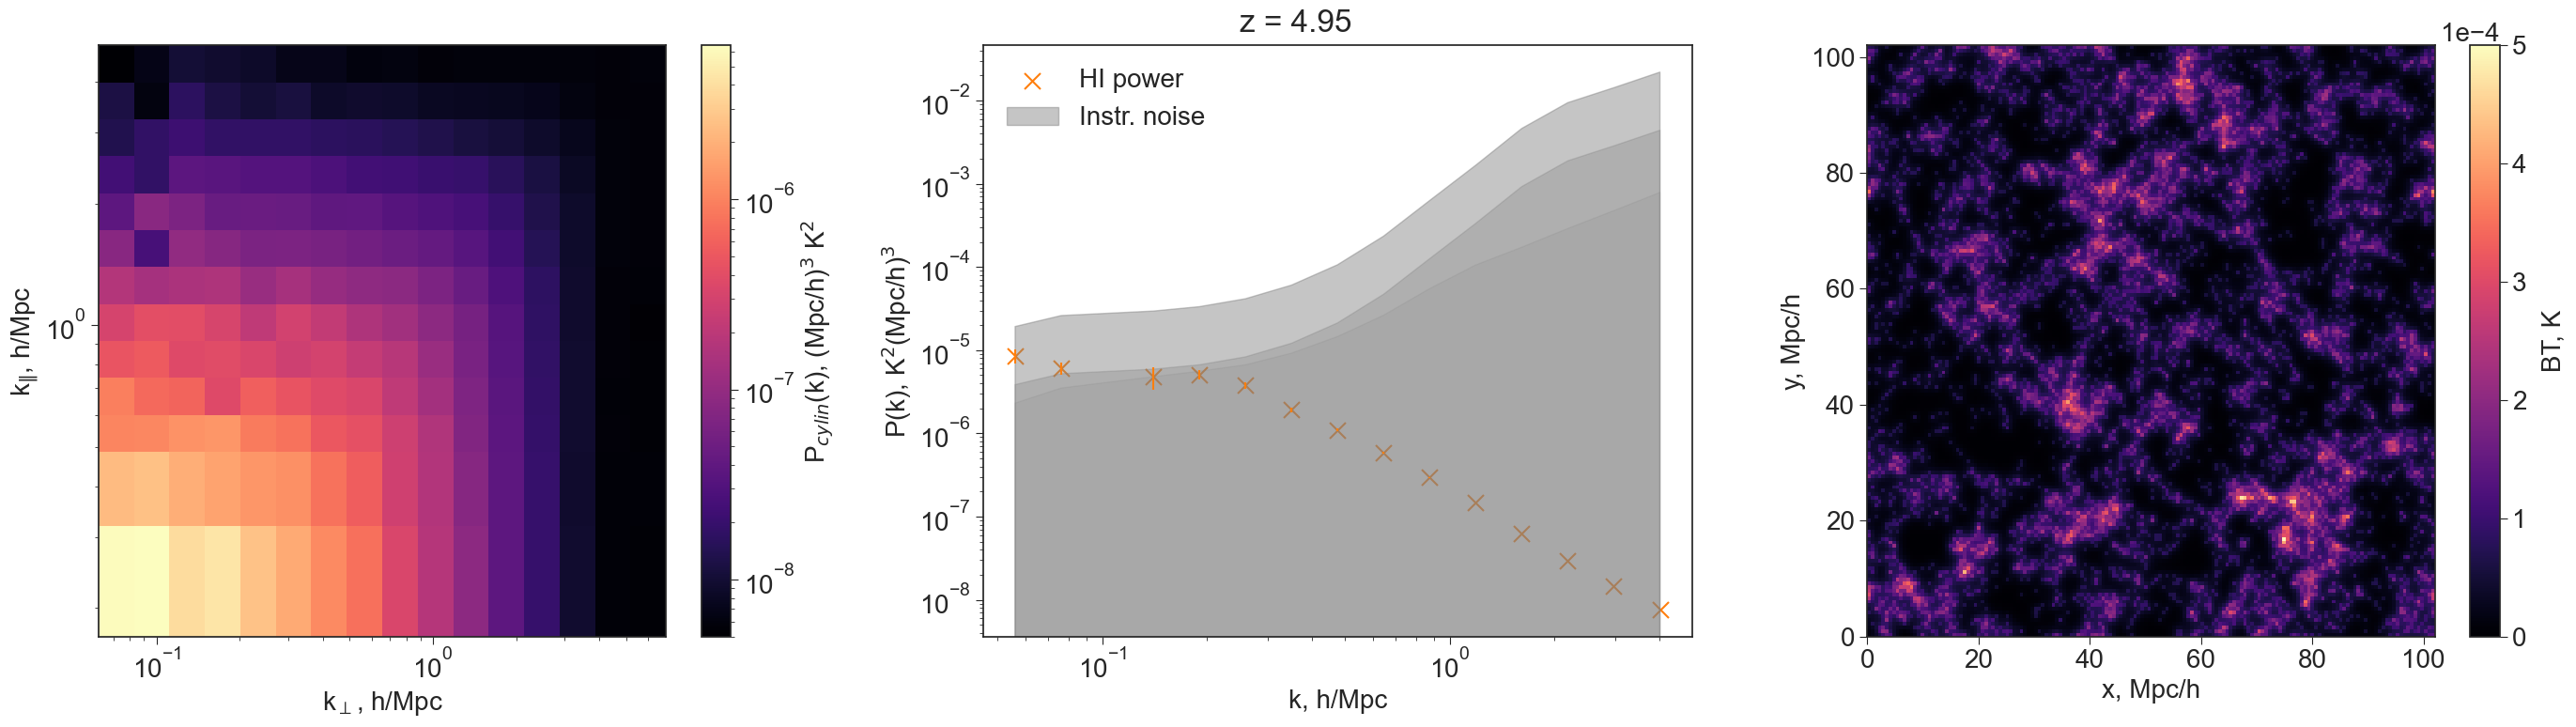

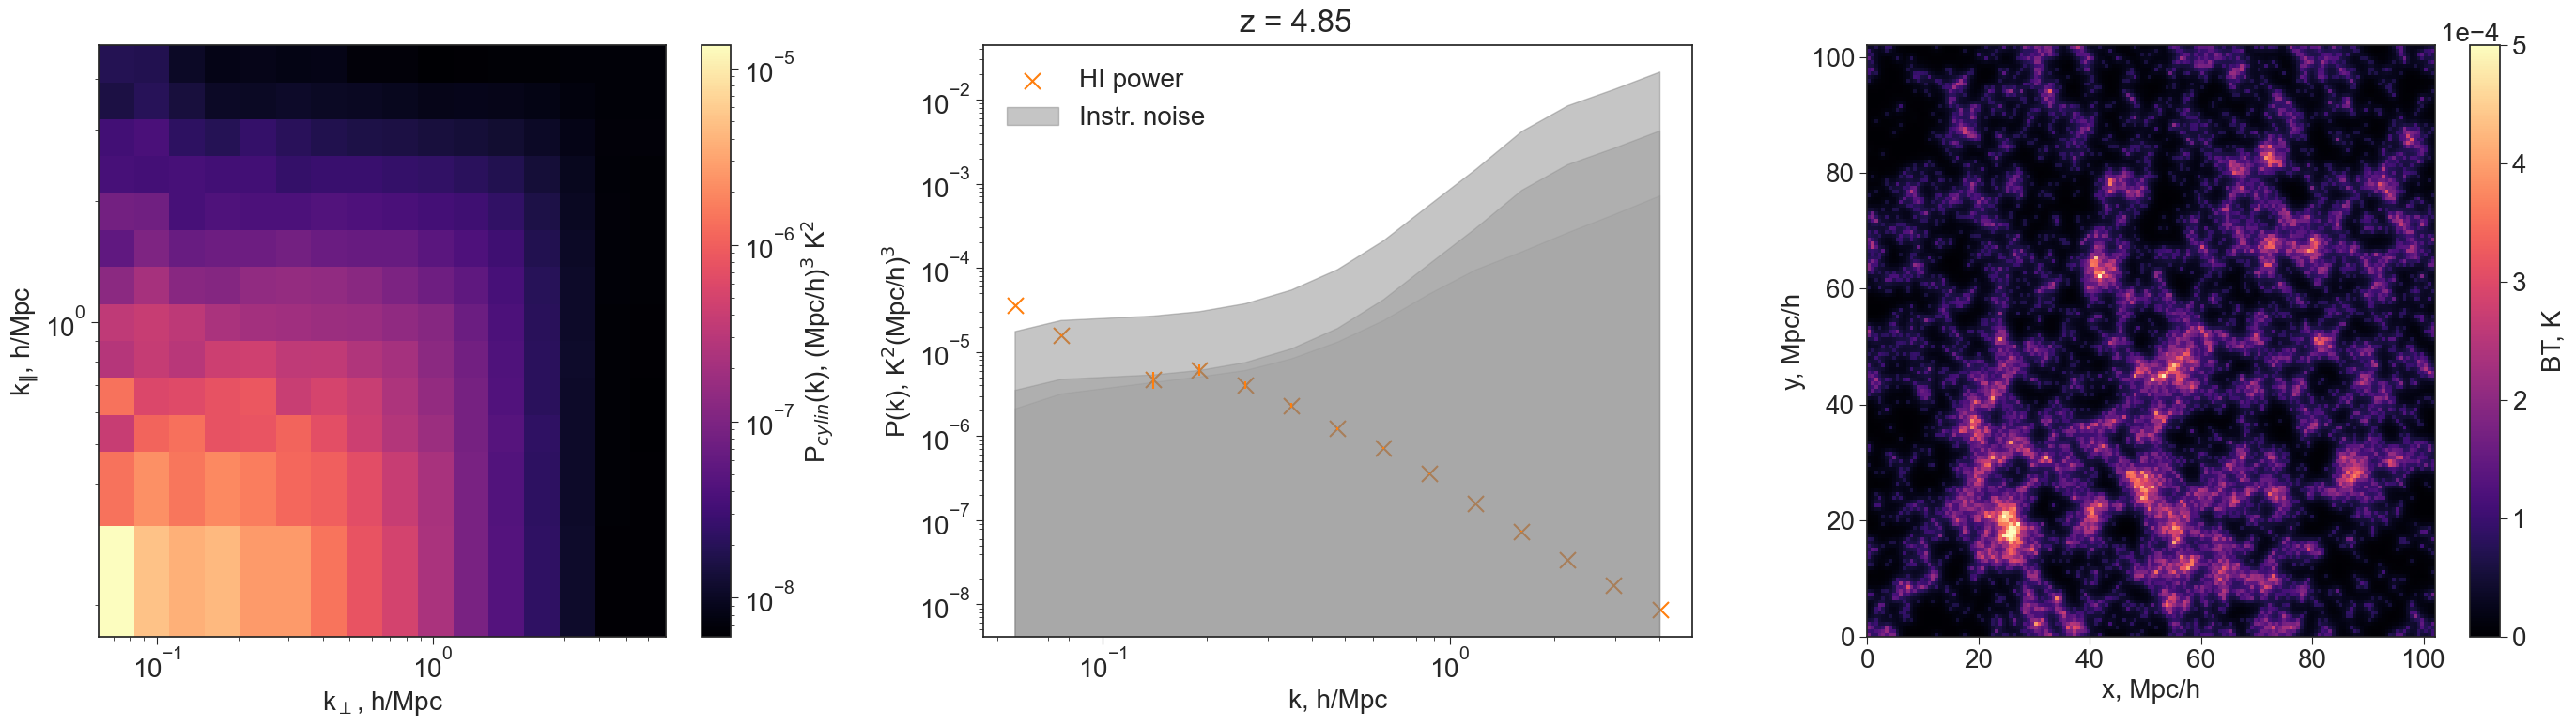

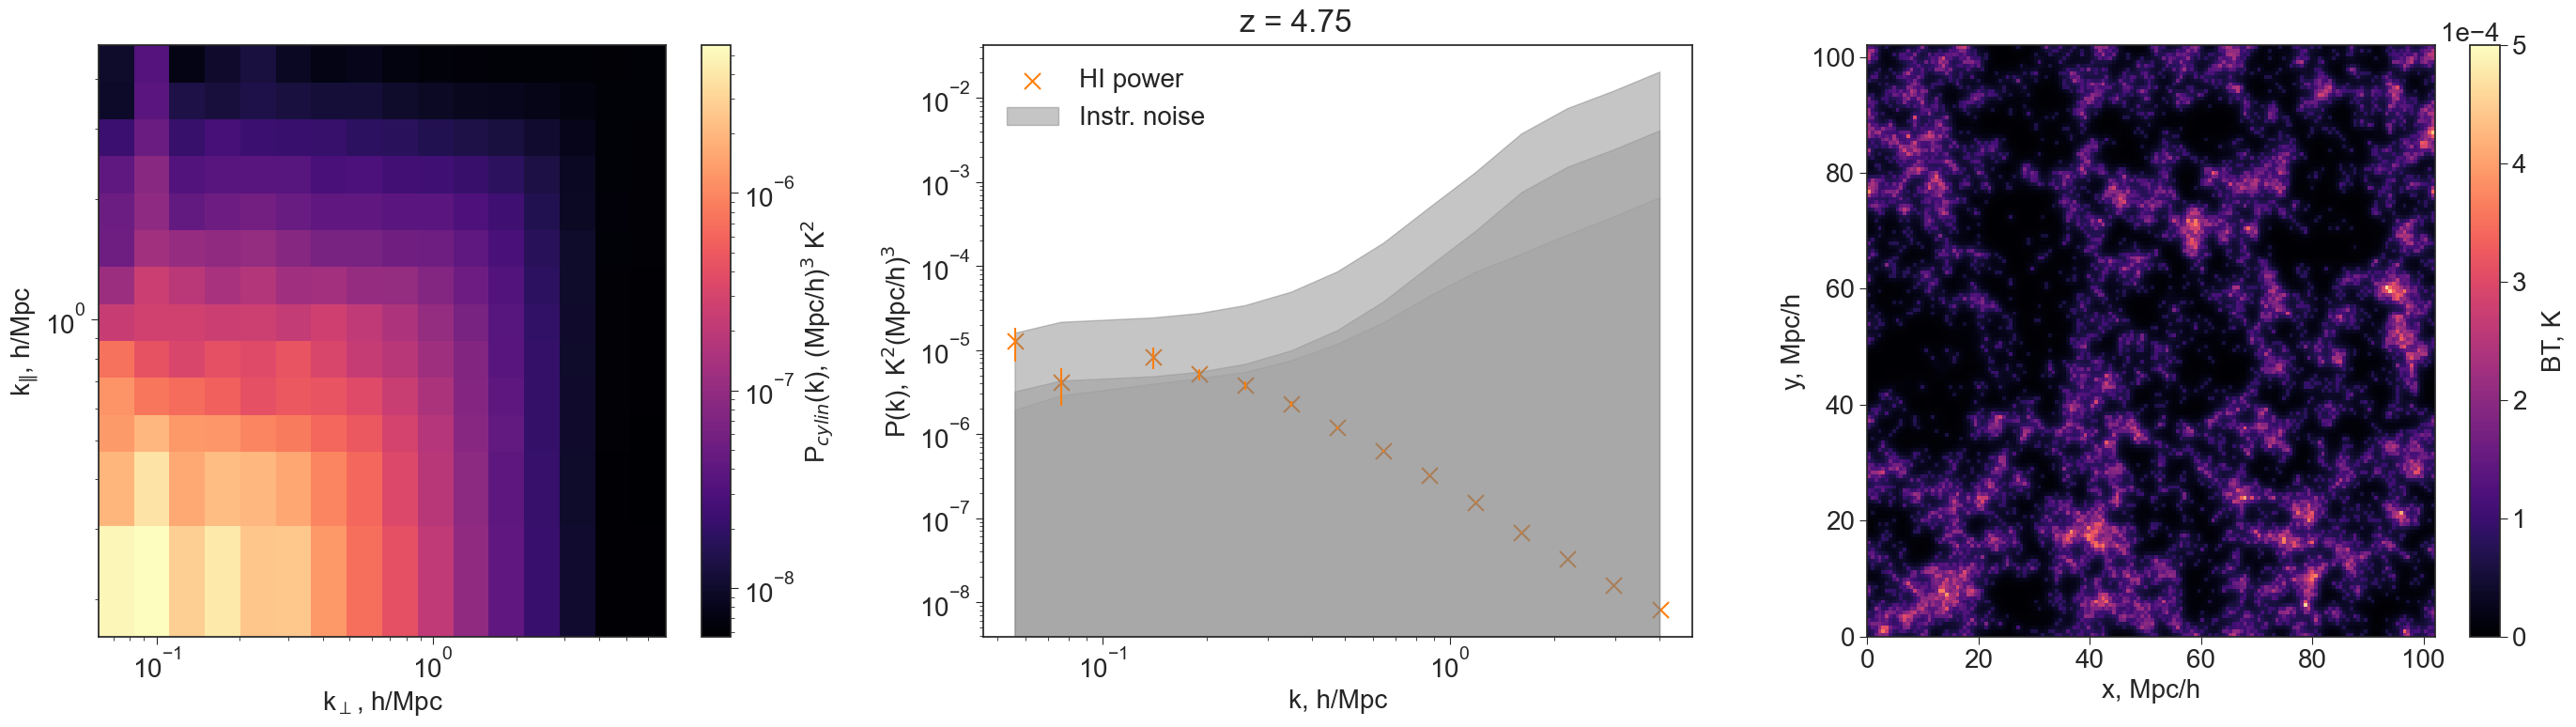

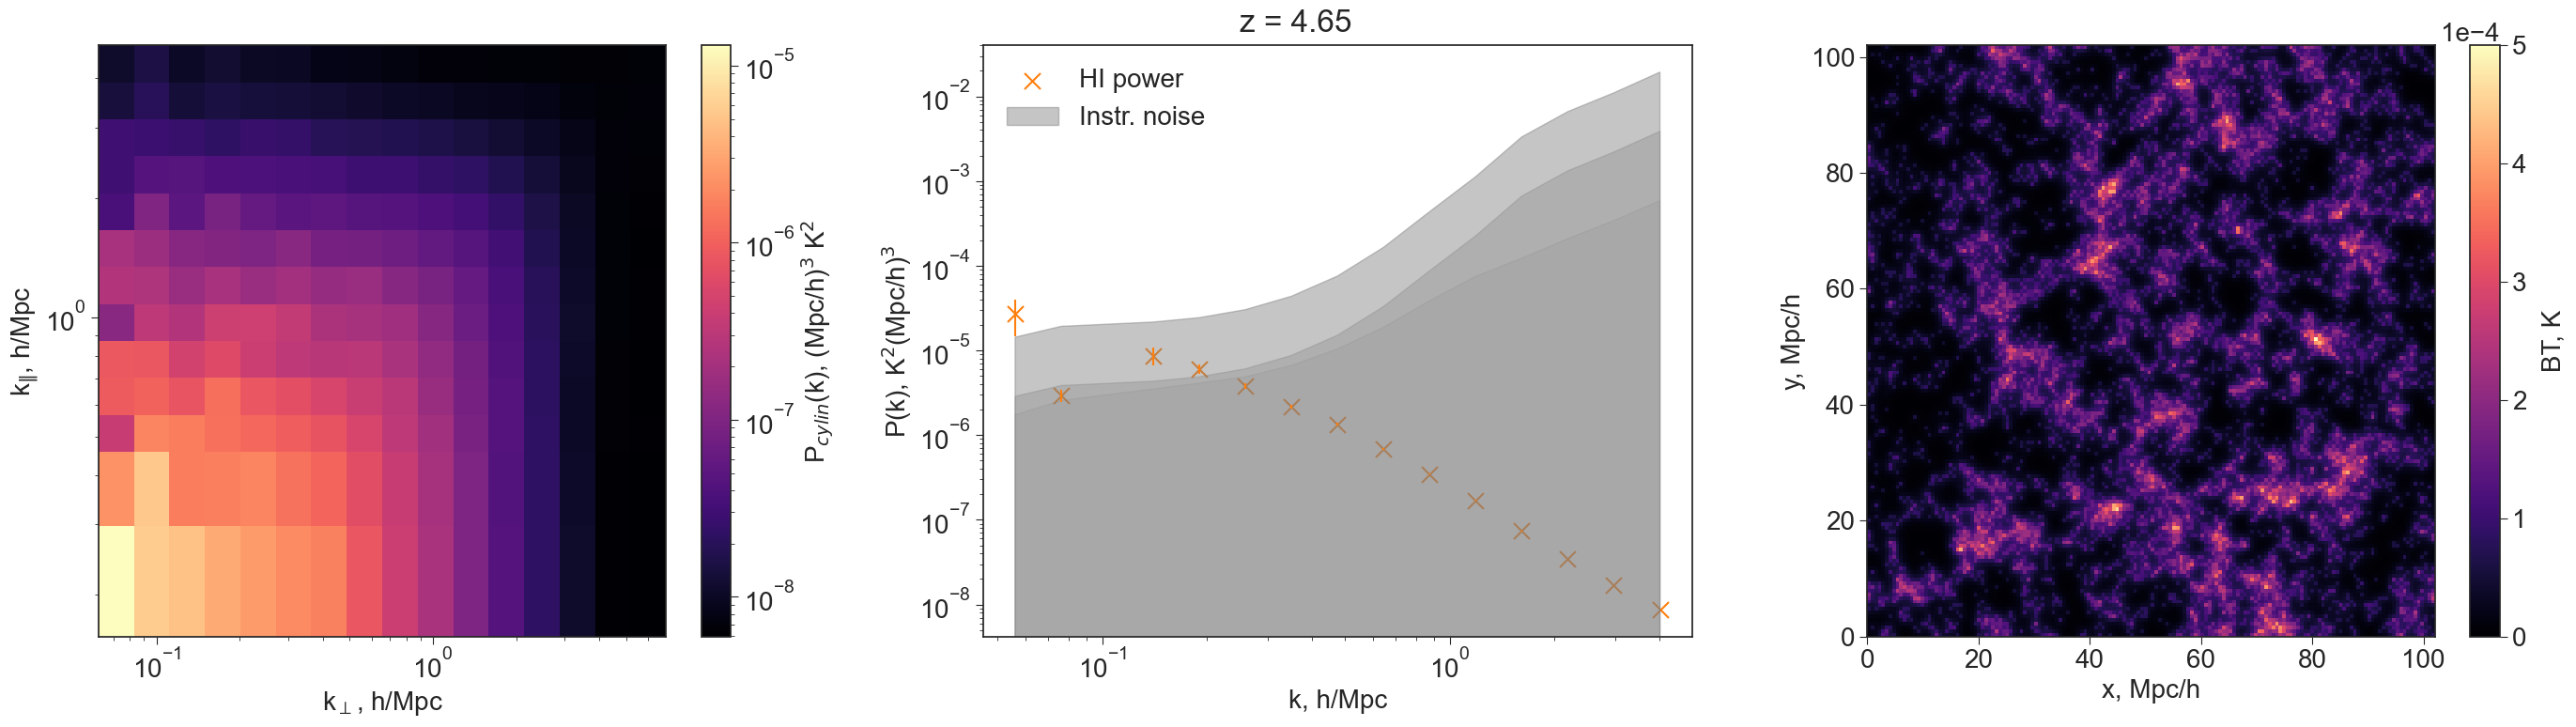

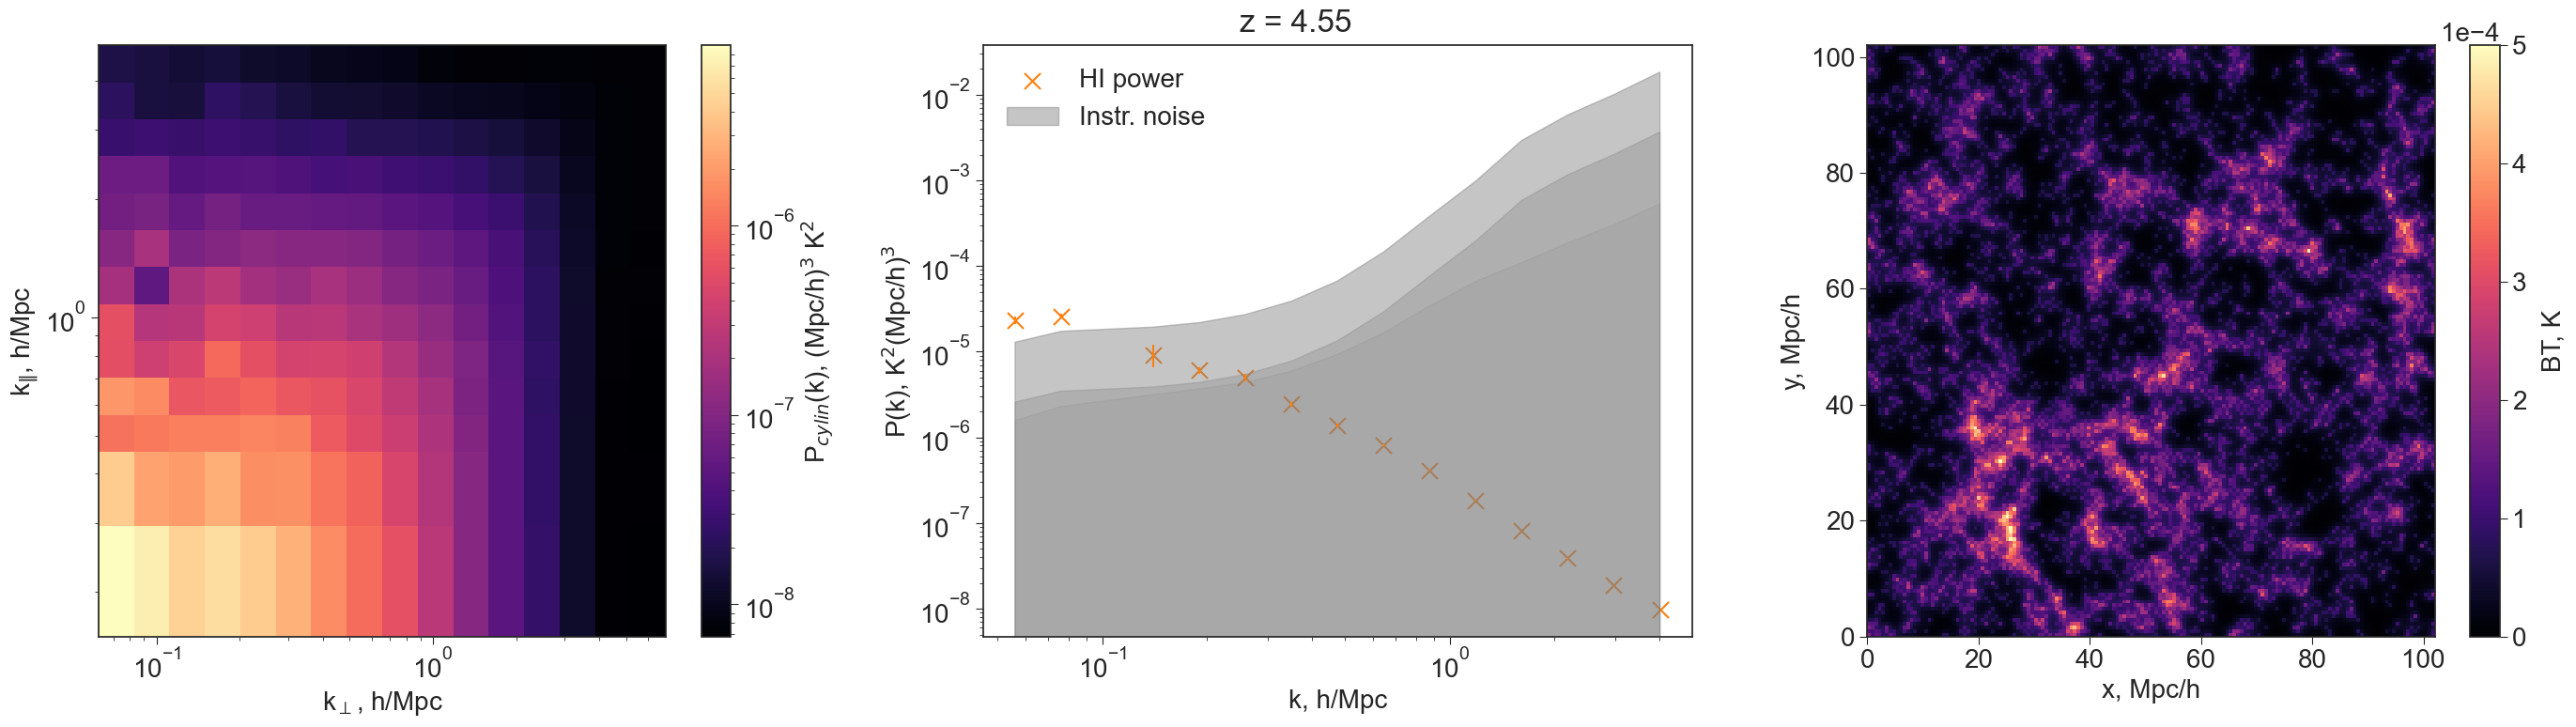

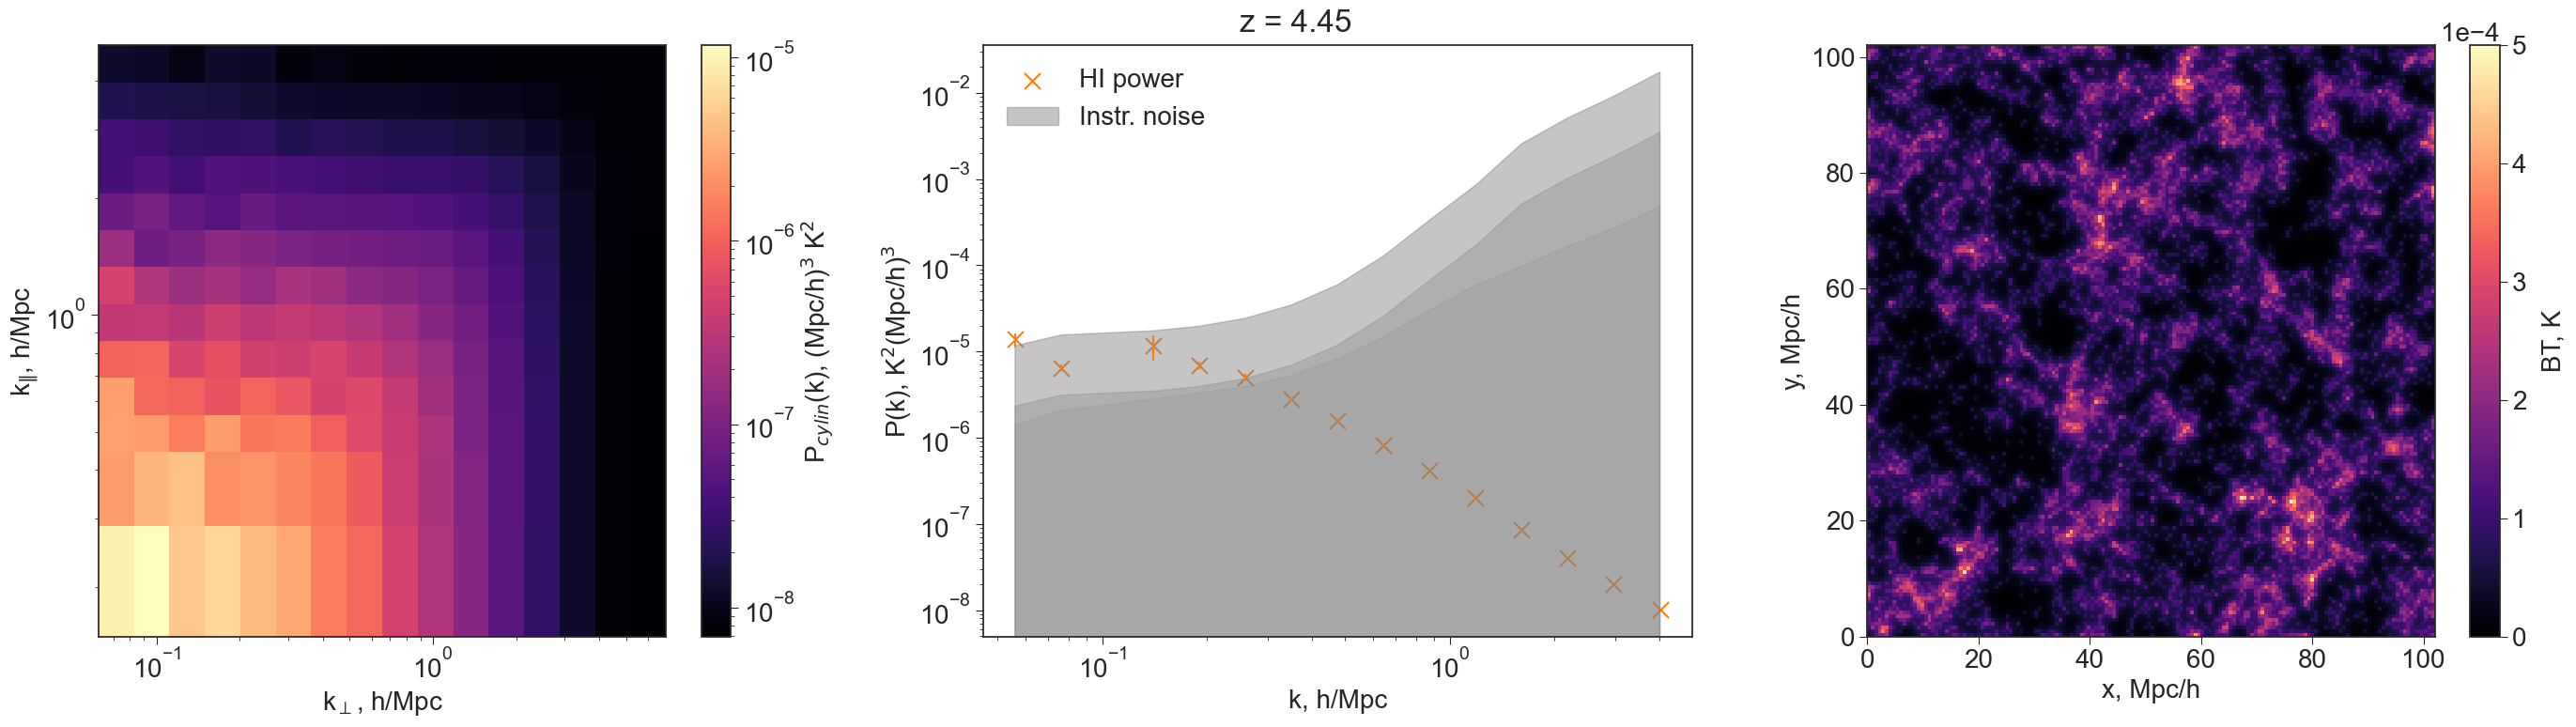

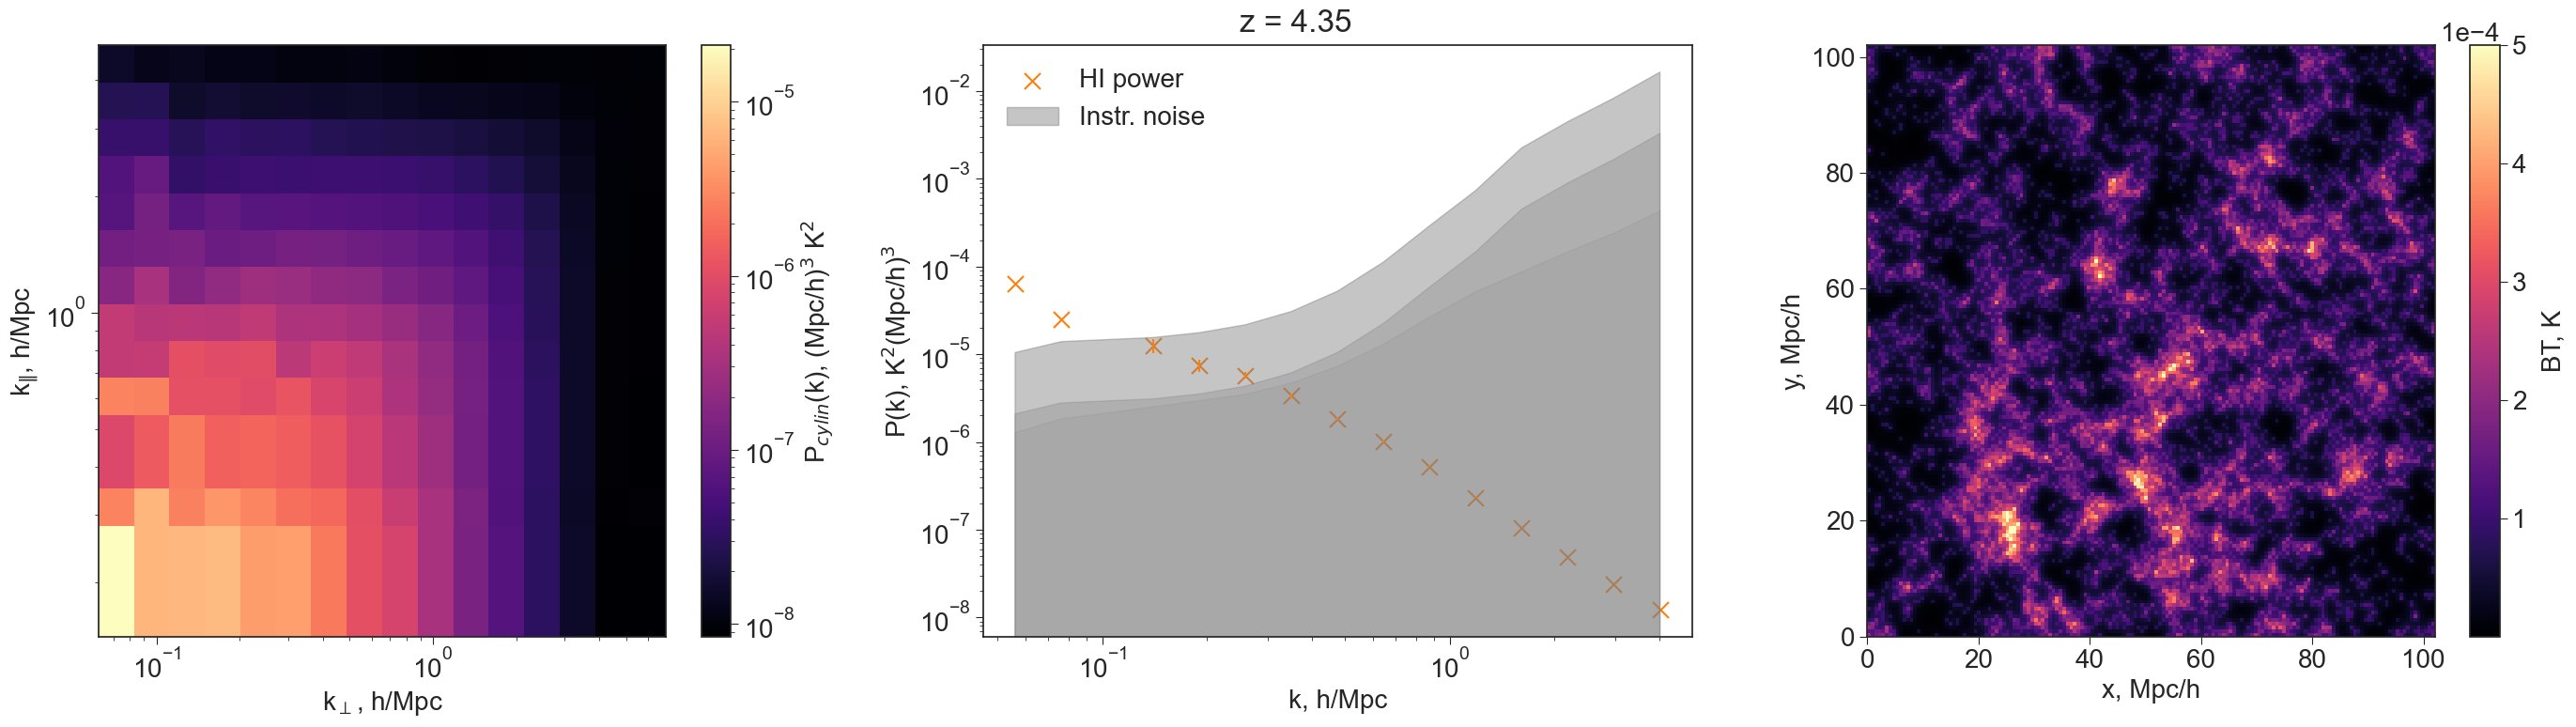

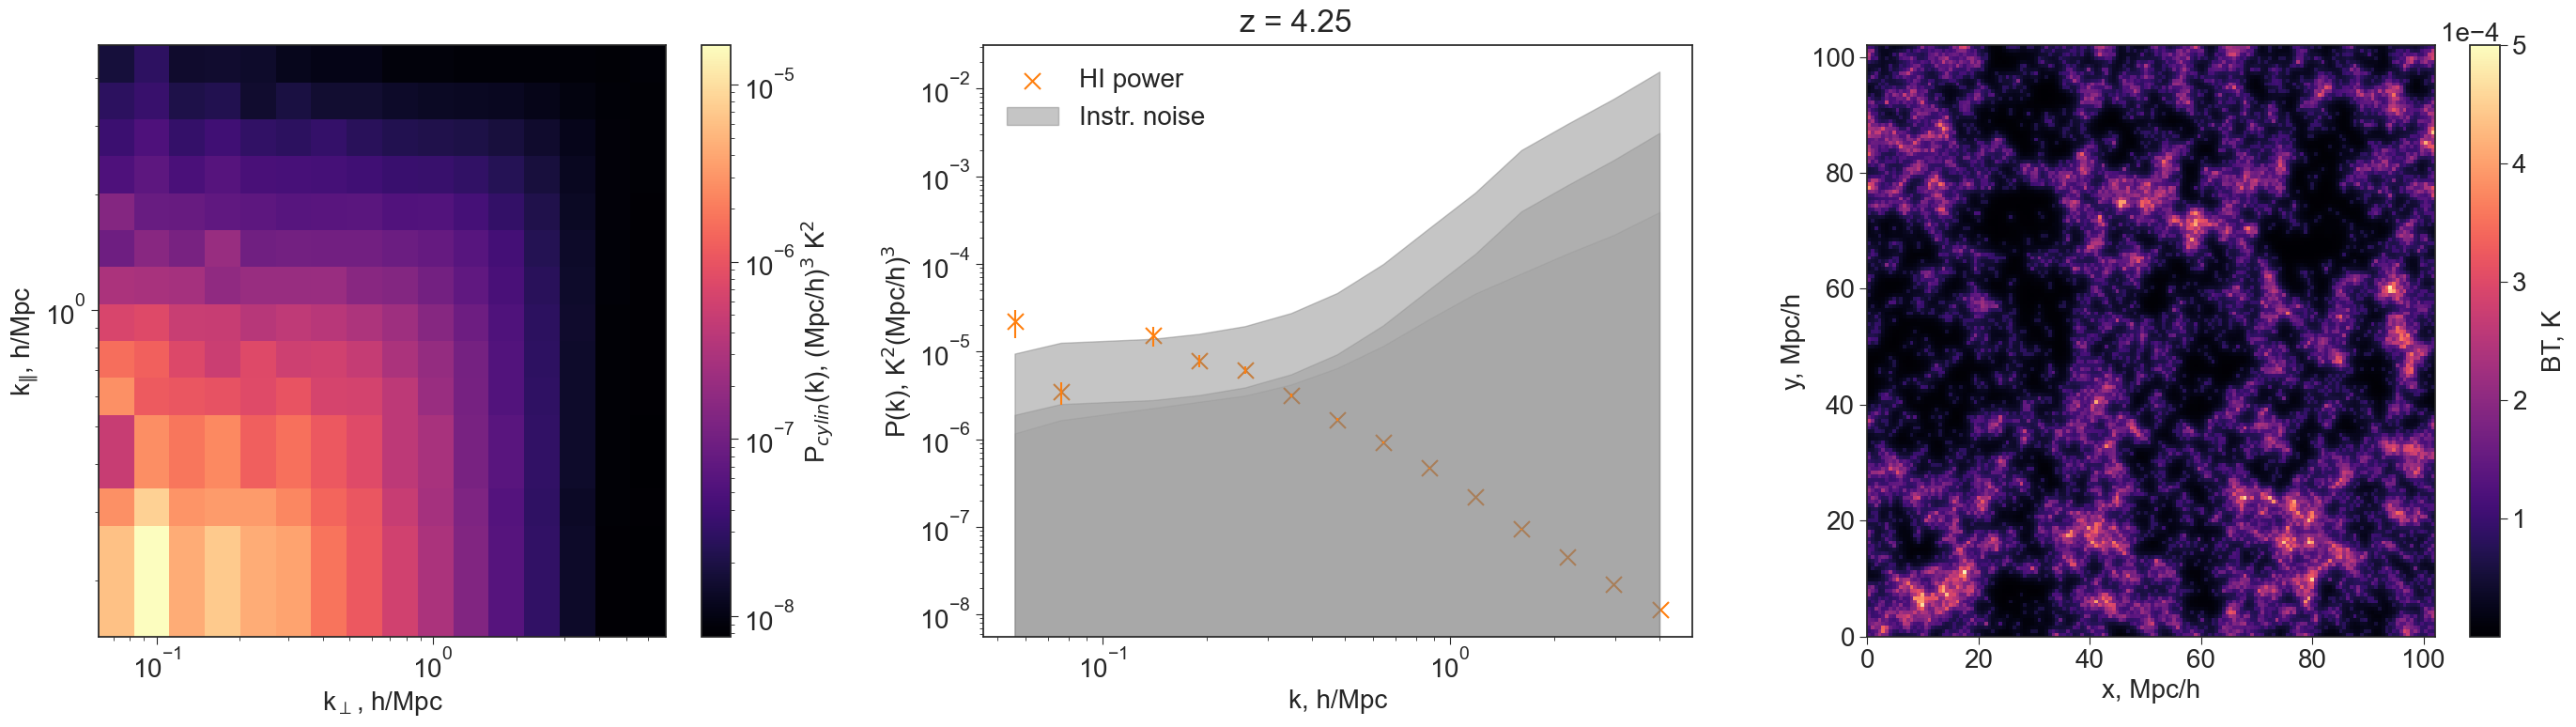

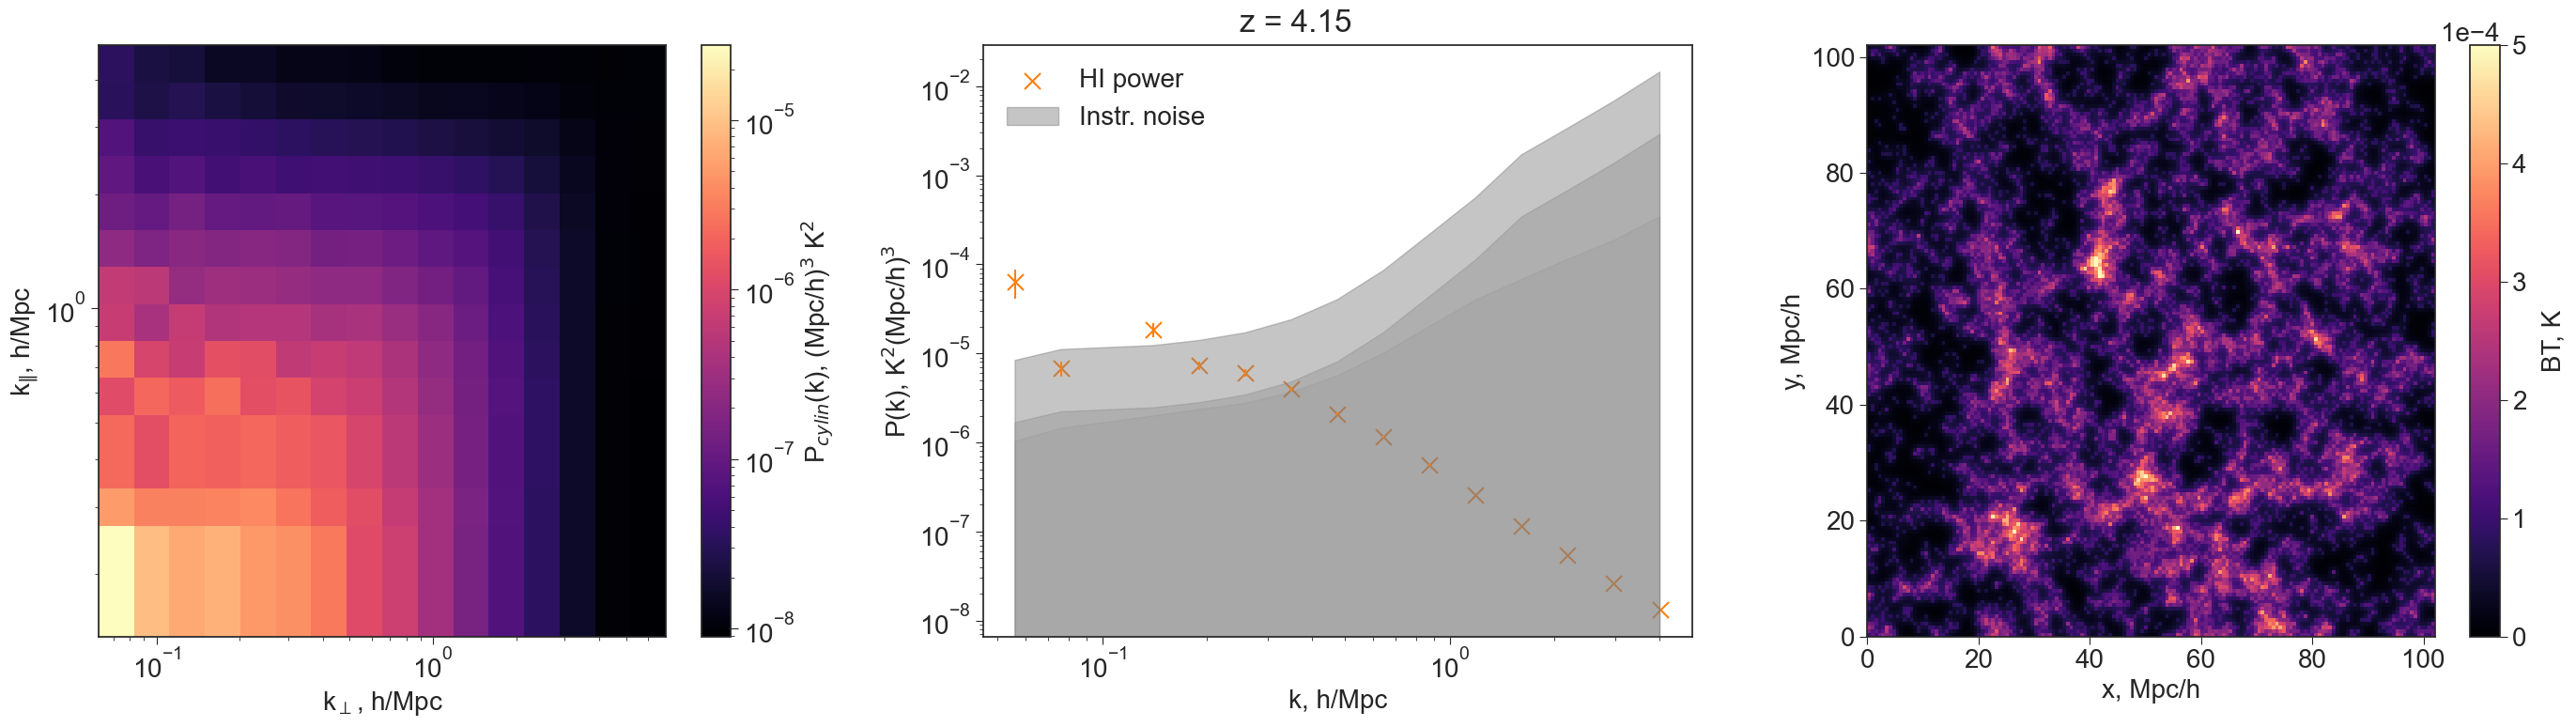

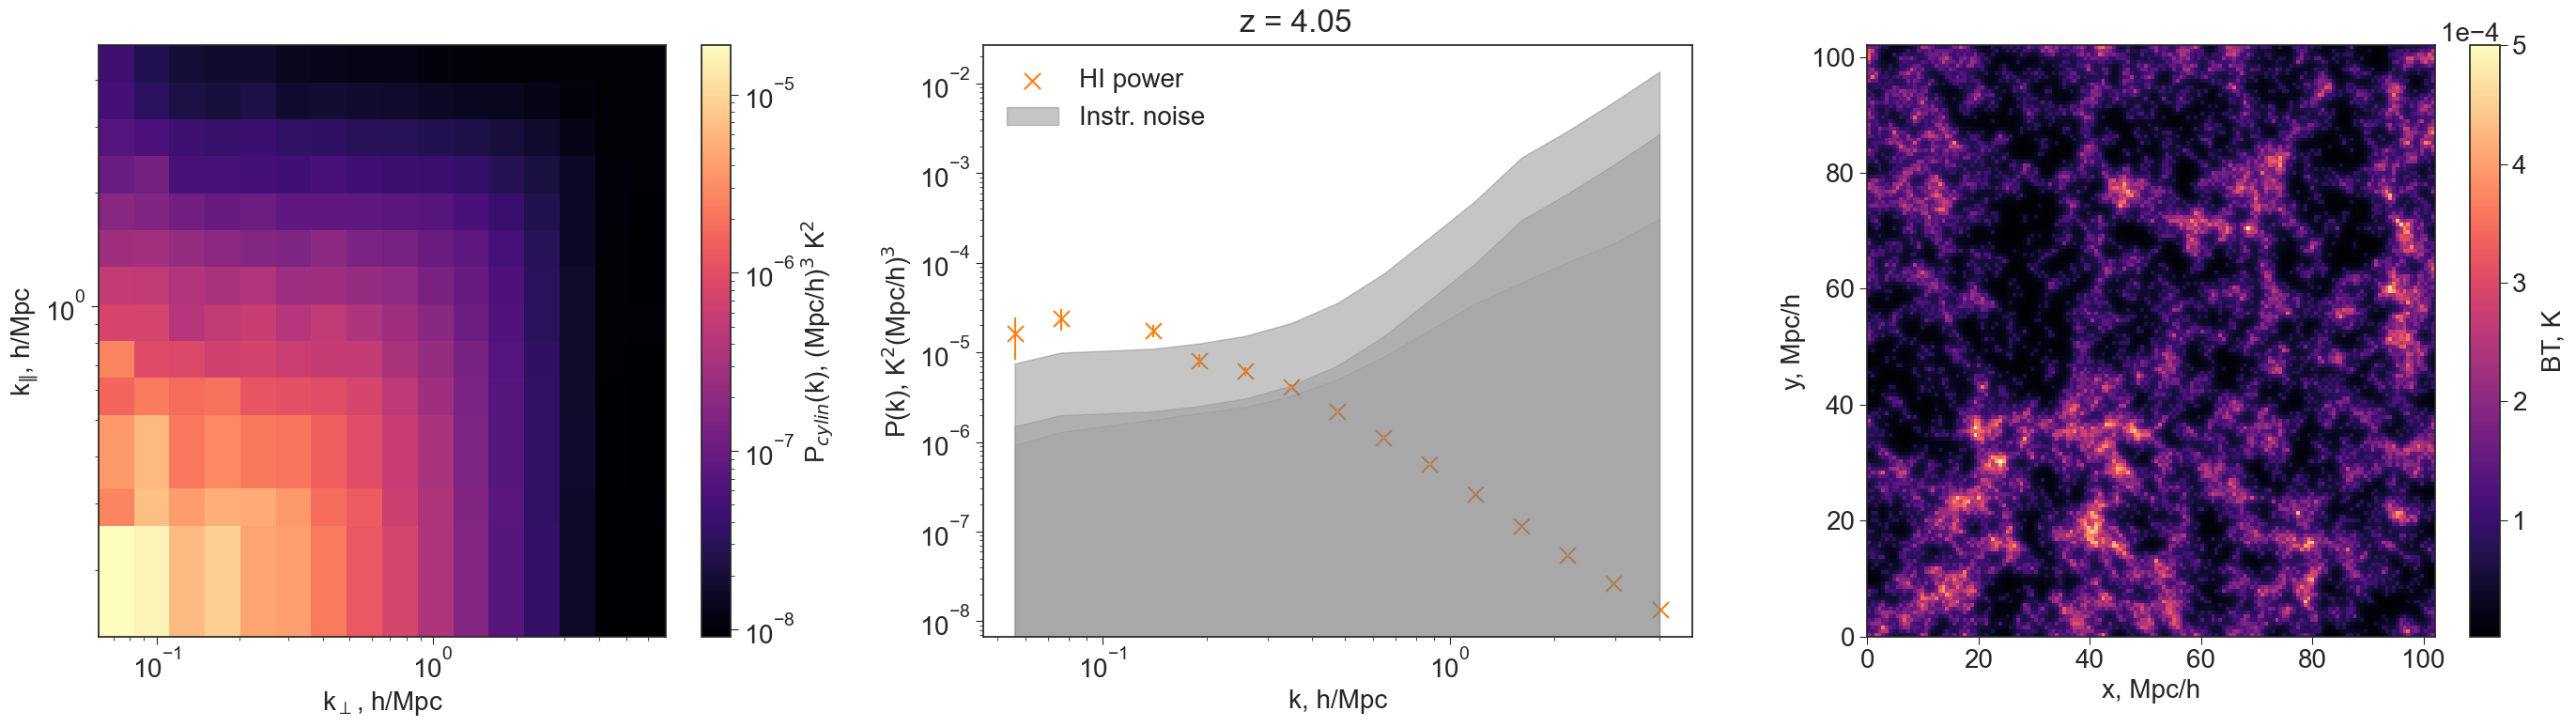

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import postEoR.observations as obs
from postEoR.tools import nu_21
from scipy.interpolate import make_interp_spline
from postEoR.tools import get_distance
from postEoR.analysis import get_PS
import hickle as hkl

plt.rcParams['figure.figsize'] = [28, 8]
plt.style.use('seaborn-v0_8-ticks')
plt.rcParams.update({'font.size': 20})

def z_to_index(cone, bin_width):
    bin_edge=cone.z_end
    z_bins=list([])
    while bin_edge <= cone.z_start:
        z_bins.append(bin_edge)
        bin_edge += bin_width
    dist_bins = list([])
    for i in range(len(z_bins)):
        dist_bins.append(get_distance(z_bins[i]))
    indices = np.round((np.asarray(dist_bins) - dist_bins[0]) / cone.cell_size, 0)

    return indices

redshift_bin = 0.1
asurv=100
tsurv=5000

cone = hkl.load("cone_escape1.hkl")

indices = np.flip(z_to_index(cone, redshift_bin))


for frame in range(len(indices)-1):
    fig, ax = plt.subplots(1, 3)
    plt.rcParams['figure.figsize'] = [28, 8]
    ax[0].set_xlabel("k$_{\perp}$, h/Mpc")
    ax[1].set_xlabel("k, h/Mpc")
    ax[2].set_xlabel("x, Mpc/h")
    ax[0].set_ylabel("k$_\|$, h/Mpc")
    ax[1].set_ylabel("P(k), K$^2$(Mpc/h)$^3$")
    ax[2].set_ylabel("y, Mpc/h")
    ax[1].set_yscale("log")
    ax[1].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xscale("log")
    perp_bins=15
    par_bins=15
    perp_bins+=2
    par_bins+=2
    BT = cone.BT_field
    BT = BT[:, :, int(indices[frame+1]):int(indices[frame])]
    z = cone.z_start - redshift_bin / 2 - redshift_bin*int(frame)

    power_3d = np.abs(np.fft.fftn(BT))**2 / (np.size(BT) * (cone.HII_dim / cone.box_len)**3)

    ks1 = np.abs(np.fft.fftfreq(np.shape(BT)[0], cone.cell_size) * 2 * np.pi)
    ks2 = np.abs(np.fft.fftfreq(np.shape(BT)[2], cone.cell_size) * 2 * np.pi)
    k_x, k_y, k_z = np.meshgrid(ks1, ks1, ks2, indexing="xy")
    k_perp = (k_x**2+k_y**2)**0.5
    k_3d = (k_x**2+k_y**2+k_z**2)**0.5

    perp_k_bins = np.geomspace(np.min(k_perp[np.nonzero(k_perp)]), np.max(k_perp), perp_bins)
    para_k_bins = np.geomspace(np.min(ks2[np.nonzero(ks2)]), np.max(ks2), par_bins)

    power_2d = np.zeros([np.size(para_k_bins)-1, np.size(perp_k_bins)-1])

    for i in range(len(perp_k_bins) - 1):
        above_min = k_perp >= perp_k_bins[i]
        below_max = k_perp < perp_k_bins[i+1]
        check = (above_min & below_max).astype(int)
        unbinned = np.sum(power_3d * check, axis=(0,1)) / (np.sum(check, axis=(0,1)))
        binned, _, _ = stats.binned_statistic(ks2, unbinned, statistic="mean", bins=para_k_bins)
        power_2d[:, i] += binned

    nan_check = np.sum(power_2d, axis=1)
    power_2d = power_2d[~np.isnan(nan_check), :]
    nan_check = np.append(nan_check, 1)
    para_k_bins = para_k_bins[~np.isnan(nan_check)]

    cb1 = ax[0].pcolormesh(perp_k_bins, para_k_bins, power_2d, cmap="magma", norm='log')

    AA4 = obs.SKA1LOW_AA4(0)
    AA_star = obs.SKA1LOW_AAstar(0)
    freq_bin = nu_21 / (z-0.5*redshift_bin) - nu_21 / (z+0.5*redshift_bin)
    some_survey = obs.Interferometer(AA4, 7, 4, asurv, tsurv, 0, freq_bin)
    comp_survey1 = obs.Interferometer(AA_star, 7, 4, asurv, tsurv, 0, freq_bin)
    comp_survey2 = obs.Interferometer(AA_star, 7, 4, asurv, 1000, 0, freq_bin)

    ps, k_perp = some_survey.noise_power_perp(z)
    noise = make_interp_spline(k_perp, ps, k=1)
    ps1, k_perp1 = comp_survey1.noise_power_perp(z)
    noise1 = make_interp_spline(k_perp1, ps1, k=1)
    ps2, k_perp2 = comp_survey2.noise_power_perp(z)
    noise2 = make_interp_spline(k_perp2, ps2, k=1)

    ksx = np.fft.fftfreq(np.shape(cone.BT_field)[0], (cone.box_len / cone.HII_dim)) * 2 * np.pi # max accessible wavenumber corresponds to 2 * pi
    ksy = np.fft.fftfreq(np.shape(cone.BT_field)[1], (cone.box_len / cone.HII_dim)) * 2 * np.pi
    ksz = np.fft.fftfreq(np.shape(cone.BT_field)[2], (cone.box_len / cone.HII_dim)) * 2 * np.pi
    kx, ky, kz = np.meshgrid(ksx, ksy, ksz) # converting to a 3d array
    k = (kx**2+ky**2+kz**2)**0.5 # spherical k-values
    k = k.reshape(np.size(k)) # converting to 1d array for use in binned_statistic
    kbins = np.geomspace(np.min(k[np.nonzero(k)]), np.max(k), 25)

    new_k, plot1, error1 = get_PS(BT, cone.box_len, cone.HII_dim, kbins=kbins)
    new_k = new_k[error1>1e-11]
    plot1 = plot1[error1>1e-11]
    error1 = error1[error1>1e-11]


    ax[1].scatter(new_k, plot1, color="tab:orange", marker="x", s=150, label="HI power")
    ax[1].errorbar(new_k, plot1, yerr=error1, color="tab:orange", linestyle="none")
    ax[1].fill_between(new_k, noise(new_k), color="tab:gray", alpha=0.15)
    ax[1].fill_between(new_k, noise1(new_k), color="tab:gray", alpha=0.3)
    ax[1].fill_between(new_k, noise2(new_k), color="tab:gray", alpha=0.45, label="Instr. noise")
    ax[1].legend()

    fin_size = np.shape(BT)[0] / cone.HII_dim * cone.box_len
    dx, dy = cone.cell_size, cone.cell_size 
    y1, x1 = np.mgrid[slice(dy / 2, fin_size, dy), slice(dx / 2, fin_size, dx)]

    cb2 = ax[2].pcolormesh(x1, y1, np.mean(BT, axis=2), cmap='magma', vmax=0.5e-3)

    cbar1 = plt.colorbar(cb1)
    cbar1.set_label("P$_{cylin}$(k), (Mpc/h)$^3$ K$^2$")

    cbar2 = fig.colorbar(cb2)
    cbar2.set_label("BT, K", rotation=90, labelpad = 12)
    cbar2.formatter.set_powerlimits((0, 0))

    fig.tight_layout()
    fig.suptitle("z = "+ str(format(z, '.2f')))
    plt.savefig("cone_analysis/escape1_w_legend"+str(redshift_bin)+"_"+str(format(z, '.2f'))+".png")